This notebook describes how to run experiments to test different transformations on various features in input and
output data. The dl4seq packae needs to be installed properly.

In [1]:
import site
import os
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')

import matplotlib.pyplot as plt

from dl4seq.experiments import TransformationExperiments
from dl4seq.data import load_30min


**********Pytorch models could not be imported **********



In [2]:
data = load_30min()

data.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,target3,target4,target5,target6,target7,target8,target9,target10,target11,target12
Date_Time2,,,,,,,,,,,,,,,,,,,,,
2018-06-19 00:00:00,36.407149,19.321232,33.956058,19.780000,0.0,0.0,0.0,0.0,159.533333,0.960000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 00:30:00,35.562515,19.320124,33.950508,19.093333,0.0,0.0,0.0,0.0,86.596667,0.163333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 01:00:00,34.808016,19.319666,33.942532,18.733333,0.0,0.0,0.0,0.0,2.260000,0.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 01:30:00,30.645216,19.320406,33.931263,18.760000,0.0,0.0,0.0,0.0,62.710000,0.193333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 02:00:00,26.608980,19.326729,33.917961,18.633333,0.0,0.0,0.0,0.0,63.446667,0.510000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
inputs = [col for col in data.columns if 'input' in col]
inputs

['input1',
 'input2',
 'input3',
 'input4',
 'input5',
 'input6',
 'input7',
 'input8',
 'input9',
 'input10',
 'input11',
 'input12',
 'input13']

In [4]:
outputs = ['target5']
outputs

['target5']

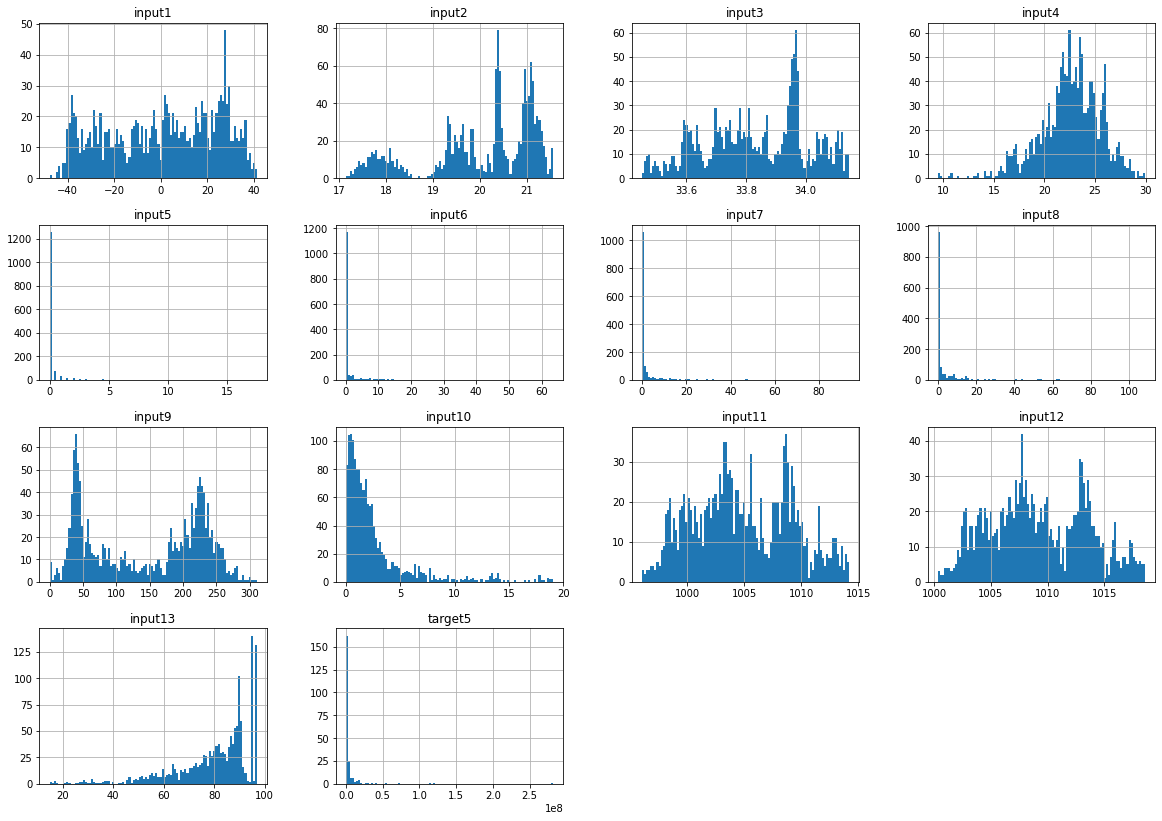

In [5]:
_ = data[inputs+outputs].hist(bins=100, figsize=(20, 14))
plt.show()

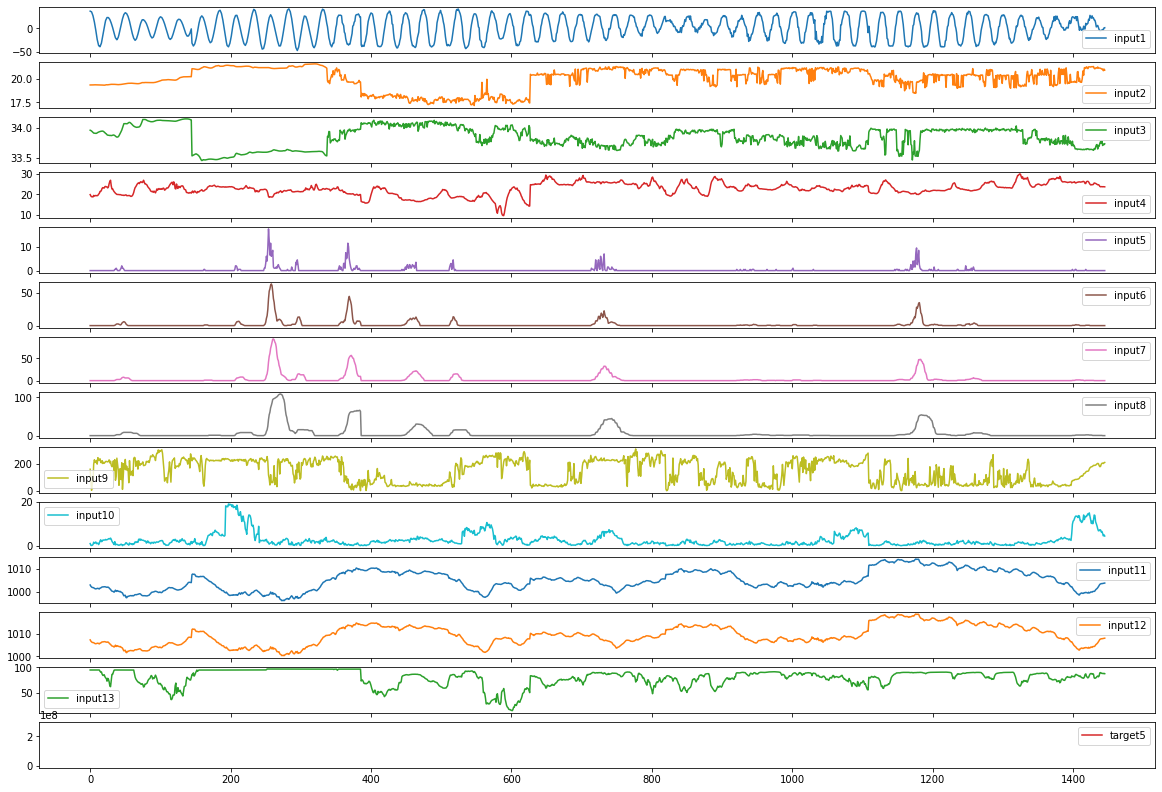

In [6]:
_ = data[inputs+outputs].plot(sharex=True, subplots=True, use_index=False, figsize=(20, 14))
plt.show()

In [7]:
neg_inputs = ['input1']
pos_inputs = [inp for inp in inputs if inp != 'input1']

We can define different cases for our experiemtn. Each case/model differs from the other case in the application of 
transformation. In first few cases we apply one transformation to both input and output data, next we apply separate
transformations to input and output data. Sine some of input data is very skewed, we try to apply a different
transformation on these input data types.

In [8]:
cases = {
    'model_minmax': {'transformation': 'minmax'},
    'model_zscore': {'transformation': 'zscore'},
    'robust': {'transformation': 'robust'},
    'quantile': {'transformation': 'quantile'},
    'power': {'transformation': 'power'},
    'log': {'transformation': [{"method": "log", "replace_nans": True, "replace_zeros": True, "features": pos_inputs},
                               {"method": "zscore", "features": neg_inputs},
                              {"method": "log", "replace_nans": True, "replace_zeros": True, "features": outputs}]},
    'zscore_robust': {'transformation': [{"method": 'zscore', "features": inputs},  {"method": "robust", "features": outputs}]},
    'zscore_log': {'transformation': [{"method": "zscore", "features": inputs}, {"method": "log", "features": outputs, "replace_nans": True}]},
    'minmax_log': {'transformation': [{"method": "minmax", "features": inputs},  {"method": "log", "features": outputs, "replace_nans": True}]},
    'no_log': {'transformation': [{"method": None, "features": inputs},  {"method": "log", "features": outputs, "replace_nans": True}]},
    'no_zscore': {'transformation': [{"method": None, "features": inputs}, {"method": "zscore", "features": outputs}]},
    'no_robust': {'transformation': [{"method": None, "features": inputs},  {"method": "robust", "features": outputs}]},
    'no_power': {'transformation': [{"method": None, "features": inputs}, {"method": "power", "features": outputs}]},
    'no_quantile': {'transformation': [{"method": None, "features": inputs}, {"method": "quantile", "features": outputs}]},
    'minmax_quantile': {'transformation': [{"method": 'minmax', "features": inputs}, {"method": "quantile", "features": outputs}]},
    'minmax_zscore': {'transformation': [{"method": 'minmax', "features": inputs},  {"method": "zscore", "features": outputs}]},

    'quantile_log': {'transformation': [{"method": 'quantile', "features": inputs},  {"method": "log", "features": outputs, "replace_nans": True}]},

    'minmax_robust_robust': {'transformation': [{'method': 'minmax', 'features': ['input1','input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'robust', 'features': ['input5','input6', 'input7', 'input8']},
                                   {'method': 'robust', 'features': outputs}]},
    'minmax_quantile_robust': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'quantile', 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'robust', 'features': outputs}]},
    'minmax_quantile_quantile': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'quantile', 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'quantile', 'features': outputs}]},
    'minmax_quantile_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'quantile', 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_log_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                             'input10', 'input11', 'input12', 'input13']},
                           {'method': 'log', "replace_nans": True, "replace_zeros": True, 'features': ['input5', 'input6', 'input7', 'input8']},
                           {'method': 'log', "replace_nans": True, "replace_zeros": True,  'features': outputs}]},
    'zscore_robust_log': {'transformation': [{'method': 'zscore', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'robust', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_robust_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'robust', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_power_log': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'power', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'log', "replace_nans": True, 'features': outputs}]},
    'minmax_power_robust': {'transformation': [{'method': 'minmax', 'features': ['input1', 'input2', 'input3', 'input4', 'input9',
                                                                     'input10', 'input11', 'input12', 'input13']},
                                   {'method': 'power', 'features': ['input5', 'input6', 'input7', 'input8']},
                                   {'method': 'robust', "replace_nans": True, 'features': outputs}]},
    'minmax_logminmax': {'transformation': [{'method': 'minmax', 'features': inputs},
                               {'method': 'log', "replace_nans": True, 'features': outputs},
                               {'method': 'minmax', "replace_nans": True, 'features': outputs}]},
    'minmax_logrobust': {'transformation': [{'method': 'minmax', 'features': inputs},
                               {'method': 'log', "replace_nans": True, 'features': outputs},
                               {'method': 'robust', "replace_nans": True, 'features': outputs}]},
    'robust_logrobust': {'transformation': [{'method': 'robust', 'features': inputs},
                               {'method': 'log', "replace_nans": True, 'features': outputs},
                               {'method': 'robust', "replace_nans": True, 'features': outputs}]}
}

In [9]:
model_args = {
    'inputs' : inputs,
    'outputs': outputs,
    'epochs': 2000,
    'patience': 50,
}

In [10]:
class MyTransformationExperiment(TransformationExperiments):

    def update_paras(self, **suggested_paras):
        """This method must update all the parameters to build the dl4sq 'Model'."""
        return {
            'model': {
                'layers': {
                    "LSTM": {"config": {"units": 64}, "dropout": 0.2},
                    "Dense": {"config": {"units": 1, "activation": "relu"}},
                    "Reshape": {"config": {"target_shape": (1,1)}}
                }
            },
            'lookback': suggested_paras.get('lookback', 10),
            'batch_size': suggested_paras.get('batch_size', 16),
            'lr': suggested_paras.get('lr', 0.0001),
            'transformation': suggested_paras['transformation']
        }

In [11]:
experiment = MyTransformationExperiment(data=data, cases=cases, **model_args)

building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')

********** Removing Samples with nan labels  *******

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 45ms/step - loss: 0.0022 - nse: -7.9223 - val_loss: 0.0392 - val_nse: -0.3188
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 9.3930e-04 - nse: -0.6234 - val_loss: 0.0389 - val_nse: -0.3060
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.9083e-04 - nse: -0.4810 - val_loss: 0.0389 - val_nse: -0.3049
Epoch 4/2000
9/9 [==============================] - 0s 3ms/step - loss: 8.8321e-04 - nse: -0.4550 - val_loss: 0.0389 - val_nse: -0.3051
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.7777e-04 - nse: -0.4434 - val_loss: 0.0389 - val_nse: -0.3051
Epoch 6/2000
9/9 [==============================] - 0s 3ms/step - loss: 8.7571e-04 - nse: -0.3799 - val_loss: 0.0389 - val_nse: -0.3051
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.7394e-04 - nse: -0.3474 - val_loss: 0.0389 - val_nse: -0.3051
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step 

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 833us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 42ms/step - loss: 0.1894 - nse: -7.4516 - val_loss: 5.5201 - val_nse: -0.2194
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1666 - nse: -6.9705 - val_loss: 5.5048 - val_nse: -0.2141
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1496 - nse: -6.1934 - val_loss: 5.4942 - val_nse: -0.2104
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1391 - nse: -48.8317 - val_loss: 5.4872 - val_nse: -0.2077
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1310 - nse: -5.5413 - val_loss: 5.4829 - val_nse: -0.2059
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1266 - nse: -2.0230 - val_loss: 5.4791 - val_nse: -0.2047
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1239 - nse: -1.5441 - val_loss: 5.4770 - val_nse: -0.2041
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1221 - nse: -

9/9 [==============================] - 0s 4ms/step - loss: 0.1161 - nse: -2.2346 - val_loss: 5.2952 - val_nse: -0.1876
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1161 - nse: -0.3035 - val_loss: 5.2933 - val_nse: -0.1875
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1161 - nse: -2.3558 - val_loss: 5.2950 - val_nse: -0.1877
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1161 - nse: -2.8181 - val_loss: 5.2889 - val_nse: -0.1871
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1160 - nse: -3.7802 - val_loss: 5.2813 - val_nse: -0.1864
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1160 - nse: -1.2268 - val_loss: 5.2781 - val_nse: -0.1861
Epoch 68/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1160 - nse: -0.5068 - val_loss: 5.2799 - val_nse: -0.1863
Epoch 69/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1160 - n

9/9 [==============================] - 0s 4ms/step - loss: 0.1156 - nse: -0.2958 - val_loss: 5.2373 - val_nse: -0.1824
Epoch 124/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1156 - nse: -1.9140 - val_loss: 5.2387 - val_nse: -0.1826
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1156 - nse: -0.4774 - val_loss: 5.2367 - val_nse: -0.1824
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1156 - nse: -1.0372 - val_loss: 5.2360 - val_nse: -0.1823
Epoch 127/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1156 - nse: -2.5830 - val_loss: 5.2366 - val_nse: -0.1824
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -1.5359 - val_loss: 5.2356 - val_nse: -0.1823
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -1.5369 - val_loss: 5.2348 - val_nse: -0.1822
Epoch 130/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1

9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -2.3230 - val_loss: 5.2153 - val_nse: -0.1805
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -0.6352 - val_loss: 5.2159 - val_nse: -0.1805
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -46.1147 - val_loss: 5.2163 - val_nse: -0.1806
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -1.3911 - val_loss: 5.2160 - val_nse: -0.1806
Epoch 188/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -5.1756 - val_loss: 5.2158 - val_nse: -0.1805
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -7.5830 - val_loss: 5.2153 - val_nse: -0.1805
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -0.6387 - val_loss: 5.2155 - val_nse: -0.1805
Epoch 191/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.

9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -1.0666 - val_loss: 5.2112 - val_nse: -0.1801
Epoch 246/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -1.6436 - val_loss: 5.2112 - val_nse: -0.1801
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -3.7544 - val_loss: 5.2111 - val_nse: -0.1801
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -1.5680 - val_loss: 5.2111 - val_nse: -0.1801
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -1.3786 - val_loss: 5.2112 - val_nse: -0.1801
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -1.5566 - val_loss: 5.2111 - val_nse: -0.1801
Epoch 251/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -2.1943 - val_loss: 5.2110 - val_nse: -0.1801
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1

9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -2.5059 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -4.2145 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 308/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -3.0429 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 309/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -1.1087 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -5.8448 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 311/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - nse: -0.9093 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - nse: -3.7347 - val_loss: 5.2106 - val_nse: -0.1801
Epoch 313/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 855us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 7.9217 - nse: -0.2235 - val_loss: 370.5707 - val_nse: -0.2877
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8533 - nse: -0.1341 - val_loss: 370.1457 - val_nse: -0.2839
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7904 - nse: -0.1451 - val_loss: 369.5090 - val_nse: -0.2795
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7090 - nse: -0.3851 - val_loss: 368.8817 - val_nse: -0.2756
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6684 - nse: -0.0994 - val_loss: 368.0526 - val_nse: -0.2706
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5918 - nse: -0.1053 - val_loss: 367.4083 - val_nse: -0.2666
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5295 - nse: -0.0528 - val_loss: 366.6483 - val_nse: -0.2627
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.

9/9 [==============================] - 0s 4ms/step - loss: 6.0917 - nse: -0.0274 - val_loss: 351.3503 - val_nse: -0.2026
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0739 - nse: 0.2493 - val_loss: 351.1661 - val_nse: -0.2021
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0606 - nse: 0.0993 - val_loss: 351.0193 - val_nse: -0.2017
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0386 - nse: -0.2457 - val_loss: 350.7933 - val_nse: -0.2010
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0226 - nse: -0.1924 - val_loss: 350.6985 - val_nse: -0.2006
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0116 - nse: 0.0739 - val_loss: 350.5531 - val_nse: -0.2000
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9925 - nse: 0.1881 - val_loss: 350.5168 - val_nse: -0.2000
Epoch 69/2000
9/9 [==============================] - 0s 4ms/step - loss: 

Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1361 - nse: 0.4300 - val_loss: 339.3559 - val_nse: -0.1578
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1116 - nse: 0.1729 - val_loss: 338.9641 - val_nse: -0.1550
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.0992 - nse: 0.3769 - val_loss: 338.3586 - val_nse: -0.1515
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.0812 - nse: 0.4367 - val_loss: 337.9630 - val_nse: -0.1494
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.0697 - nse: -0.4610 - val_loss: 337.7459 - val_nse: -0.1476
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.0530 - nse: 0.1711 - val_loss: 338.0257 - val_nse: -0.1498
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.0376 - nse: 0.0392 - val_loss: 338.0446 - val_nse: -0.1502
Epoch 130/2000
9/9 [==============================] - 

9/9 [==============================] - 0s 3ms/step - loss: 4.3034 - nse: -0.7358 - val_loss: 333.4525 - val_nse: -0.1017
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2914 - nse: -0.1149 - val_loss: 333.8297 - val_nse: -0.1036
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2836 - nse: 0.4711 - val_loss: 334.5868 - val_nse: -0.1067
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2821 - nse: -6.8294 - val_loss: 335.0971 - val_nse: -0.1101
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2538 - nse: 0.4571 - val_loss: 334.1515 - val_nse: -0.1044
Epoch 188/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2547 - nse: 0.2393 - val_loss: 333.5242 - val_nse: -0.0990
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2467 - nse: 4.9424e-04 - val_loss: 334.1236 - val_nse: -0.1025
Epoch 190/2000
9/9 [==============================] - 0s 3ms/st

Epoch 244/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8475 - nse: 0.4553 - val_loss: 333.3063 - val_nse: -0.0738
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8452 - nse: 0.5398 - val_loss: 333.8300 - val_nse: -0.0767
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8372 - nse: 0.5825 - val_loss: 332.9186 - val_nse: -0.0702
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8309 - nse: 0.2707 - val_loss: 333.2049 - val_nse: -0.0708
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8214 - nse: 0.5763 - val_loss: 333.0250 - val_nse: -0.0691
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8178 - nse: 0.4462 - val_loss: 333.0220 - val_nse: -0.0684
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8180 - nse: 0.4476 - val_loss: 333.4442 - val_nse: -0.0710
Epoch 251/2000
9/9 [==============================] - 0

Epoch 305/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5497 - nse: 0.6892 - val_loss: 332.3381 - val_nse: -0.0386
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5380 - nse: 0.4025 - val_loss: 332.8767 - val_nse: -0.0415
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5375 - nse: 0.4613 - val_loss: 332.5411 - val_nse: -0.0395
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.5439 - nse: 0.6341 - val_loss: 332.0159 - val_nse: -0.0350
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5245 - nse: 0.6663 - val_loss: 332.6405 - val_nse: -0.0387
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5412 - nse: 0.0161 - val_loss: 332.7150 - val_nse: -0.0371
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5162 - nse: 0.5832 - val_loss: 333.0014 - val_nse: -0.0388
Epoch 312/2000
9/9 [==============================] - 0

Epoch 366/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2816 - nse: 0.5866 - val_loss: 332.5708 - val_nse: -0.0196
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2811 - nse: 0.4734 - val_loss: 332.7616 - val_nse: -0.0204
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2792 - nse: 0.7464 - val_loss: 333.3105 - val_nse: -0.0235
Epoch 369/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2691 - nse: 0.6205 - val_loss: 332.3424 - val_nse: -0.0164
Epoch 370/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2677 - nse: 0.6262 - val_loss: 332.8387 - val_nse: -0.0188
Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2602 - nse: 0.5828 - val_loss: 332.6205 - val_nse: -0.0179
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2707 - nse: 0.5232 - val_loss: 333.1928 - val_nse: -0.0217
Epoch 373/2000
9/9 [==============================] - 0

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 909us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 844us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 44ms/step - loss: 0.2732 - nse: -2.9128 - val_loss: 0.3263 - val_nse: -19.6302
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2035 - nse: -1.7636 - val_loss: 0.2452 - val_nse: -15.6582
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1382 - nse: -0.8866 - val_loss: 0.1758 - val_nse: -11.0180
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0934 - nse: -0.3515 - val_loss: 0.1371 - val_nse: -7.5907
Epoch 5/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0822 - nse: -0.1568 - val_loss: 0.1178 - val_nse: -5.4578
Epoch 6/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0781 - nse: -0.0953 - val_loss: 0.1121 - val_nse: -4.7109
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0774 - nse: -0.0073 - val_loss: 0.1105 - val_nse: -4.6226
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0766 - nse:

9/9 [==============================] - 0s 3ms/step - loss: 0.0458 - nse: 0.3534 - val_loss: 0.0735 - val_nse: -3.6227
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0454 - nse: 0.3727 - val_loss: 0.0738 - val_nse: -3.7793
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0448 - nse: 0.3457 - val_loss: 0.0733 - val_nse: -3.5355
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0448 - nse: 0.3549 - val_loss: 0.0727 - val_nse: -3.1988
Epoch 67/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0442 - nse: 0.4126 - val_loss: 0.0727 - val_nse: -3.4232
Epoch 68/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0437 - nse: 0.3575 - val_loss: 0.0729 - val_nse: -3.6809
Epoch 69/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0440 - nse: 0.3920 - val_loss: 0.0722 - val_nse: -3.5694
Epoch 70/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0433 - nse: 0.3

Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0305 - nse: 0.5679 - val_loss: 0.0633 - val_nse: -2.8239
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0301 - nse: 0.5806 - val_loss: 0.0631 - val_nse: -2.5125
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0301 - nse: 0.5859 - val_loss: 0.0624 - val_nse: -2.6558
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - nse: 0.5493 - val_loss: 0.0628 - val_nse: -2.7847
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0297 - nse: 0.5781 - val_loss: 0.0626 - val_nse: -2.3624
Epoch 130/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0294 - nse: 0.5992 - val_loss: 0.0627 - val_nse: -2.5978
Epoch 131/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0302 - nse: 0.5887 - val_loss: 0.0631 - val_nse: -2.8965
Epoch 132/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 0.0219 - nse: 0.6634 - val_loss: 0.0586 - val_nse: -1.9175
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0210 - nse: 0.7001 - val_loss: 0.0584 - val_nse: -1.5625
Epoch 188/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0209 - nse: 0.7005 - val_loss: 0.0583 - val_nse: -1.7356
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0212 - nse: 0.6791 - val_loss: 0.0586 - val_nse: -1.9164
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0210 - nse: 0.7221 - val_loss: 0.0587 - val_nse: -1.3723
Epoch 191/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0209 - nse: 0.7092 - val_loss: 0.0596 - val_nse: -1.9910
Epoch 192/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0214 - nse: 0.6865 - val_loss: 0.0585 - val_nse: -1.5627
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0208 - n

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 821us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 822us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 56ms/step - loss: 0.8694 - nse: -0.0754 - val_loss: 1.2488 - val_nse: -1.8313
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8483 - nse: -0.0159 - val_loss: 1.2333 - val_nse: -1.7258
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8362 - nse: 0.0169 - val_loss: 1.2212 - val_nse: -1.6380
Epoch 4/2000
9/9 [==============================] - 0s 9ms/step - loss: 0.8247 - nse: -0.0814 - val_loss: 1.2122 - val_nse: -1.6017
Epoch 5/2000
9/9 [==============================] - 0s 31ms/step - loss: 0.8172 - nse: -0.0208 - val_loss: 1.2027 - val_nse: -1.5483
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8122 - nse: -7.7954e-04 - val_loss: 1.1957 - val_nse: -1.5092
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8068 - nse: 0.0549 - val_loss: 1.1912 - val_nse: -1.4930
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8032 - nse:

9/9 [==============================] - 0s 3ms/step - loss: 0.6825 - nse: 0.1626 - val_loss: 1.0499 - val_nse: -1.1101
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.6817 - nse: 0.1608 - val_loss: 1.0503 - val_nse: -1.1196
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.6811 - nse: 0.1357 - val_loss: 1.0502 - val_nse: -1.1310
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6807 - nse: 0.1333 - val_loss: 1.0490 - val_nse: -1.1079
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6798 - nse: 0.1951 - val_loss: 1.0488 - val_nse: -1.1089
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6789 - nse: 0.2289 - val_loss: 1.0488 - val_nse: -1.1144
Epoch 69/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6784 - nse: 0.1966 - val_loss: 1.0473 - val_nse: -1.1013
Epoch 70/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.6779 - nse: 0.1

Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6045 - nse: 0.2601 - val_loss: 0.9441 - val_nse: -0.9042
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6038 - nse: 0.2872 - val_loss: 0.9432 - val_nse: -0.9018
Epoch 127/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.6041 - nse: 0.2804 - val_loss: 0.9422 - val_nse: -0.8864
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.6037 - nse: 0.3121 - val_loss: 0.9453 - val_nse: -0.9165
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.6032 - nse: 0.2378 - val_loss: 0.9433 - val_nse: -0.9125
Epoch 130/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.6026 - nse: 0.2603 - val_loss: 0.9424 - val_nse: -0.8954
Epoch 131/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.6018 - nse: 0.2650 - val_loss: 0.9427 - val_nse: -0.8861
Epoch 132/2000
9/9 [==============================] - 0s 3ms/step - 

9/9 [==============================] - 0s 4ms/step - loss: 0.5885 - nse: 0.1755 - val_loss: 0.9194 - val_nse: -0.7266
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5879 - nse: 0.3423 - val_loss: 0.9180 - val_nse: -0.7100
Epoch 188/2000
9/9 [==============================] - 1s 69ms/step - loss: 0.5877 - nse: 0.2732 - val_loss: 0.9176 - val_nse: -0.6966
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5880 - nse: 0.2847 - val_loss: 0.9177 - val_nse: -0.7034
Epoch 190/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5878 - nse: 0.2933 - val_loss: 0.9158 - val_nse: -0.6958
Epoch 191/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5874 - nse: 0.2822 - val_loss: 0.9155 - val_nse: -0.6945
Epoch 192/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5877 - nse: 0.2594 - val_loss: 0.9144 - val_nse: -0.6708
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5874 - 

Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5745 - nse: 0.2934 - val_loss: 0.8808 - val_nse: -0.5637
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5744 - nse: 0.2872 - val_loss: 0.8792 - val_nse: -0.5486
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5739 - nse: 0.2946 - val_loss: 0.8784 - val_nse: -0.5507
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5740 - nse: 0.3229 - val_loss: 0.8791 - val_nse: -0.5544
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5736 - nse: 0.3184 - val_loss: 0.8776 - val_nse: -0.5417
Epoch 253/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5731 - nse: 0.3121 - val_loss: 0.8765 - val_nse: -0.5347
Epoch 254/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5731 - nse: 0.2971 - val_loss: 0.8780 - val_nse: -0.5477
Epoch 255/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 4ms/step - loss: 0.5492 - nse: 0.3256 - val_loss: 0.8337 - val_nse: -0.2877
Epoch 310/2000
9/9 [==============================] - 0s 33ms/step - loss: 0.5487 - nse: 0.2572 - val_loss: 0.8301 - val_nse: -0.2877
Epoch 311/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.5483 - nse: 0.3084 - val_loss: 0.8300 - val_nse: -0.2848
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5480 - nse: 0.2155 - val_loss: 0.8308 - val_nse: -0.2809
Epoch 313/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5483 - nse: 0.3131 - val_loss: 0.8320 - val_nse: -0.2930
Epoch 314/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5478 - nse: 0.3637 - val_loss: 0.8287 - val_nse: -0.2885
Epoch 315/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5474 - nse: 0.3642 - val_loss: 0.8292 - val_nse: -0.2894
Epoch 316/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5476 - 

Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5380 - nse: 0.3959 - val_loss: 0.8208 - val_nse: -0.1951
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5381 - nse: 0.3318 - val_loss: 0.8216 - val_nse: -0.1954
Epoch 373/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5380 - nse: 0.3965 - val_loss: 0.8219 - val_nse: -0.1884
Epoch 374/2000
9/9 [==============================] - 0s 21ms/step - loss: 0.5376 - nse: 0.3219 - val_loss: 0.8218 - val_nse: -0.1941
Epoch 375/2000
9/9 [==============================] - 0s 14ms/step - loss: 0.5378 - nse: 0.3885 - val_loss: 0.8215 - val_nse: -0.2092
Epoch 376/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5379 - nse: 0.3535 - val_loss: 0.8201 - val_nse: -0.1954
Epoch 377/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.5377 - nse: 0.3079 - val_loss: 0.8202 - val_nse: -0.1750
Epoch 378/2000
9/9 [==============================] - 0s 3ms/step -

9/9 [==============================] - 0s 3ms/step - loss: 0.5313 - nse: 0.3388 - val_loss: 0.8218 - val_nse: -0.1327
Epoch 433/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5312 - nse: 0.3897 - val_loss: 0.8214 - val_nse: -0.1392
Epoch 434/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5311 - nse: 0.3684 - val_loss: 0.8192 - val_nse: -0.1345
Epoch 435/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5310 - nse: 0.3455 - val_loss: 0.8190 - val_nse: -0.1247
Epoch 436/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5312 - nse: 0.3576 - val_loss: 0.8181 - val_nse: -0.1226
Epoch 437/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5308 - nse: 0.2702 - val_loss: 0.8204 - val_nse: -0.1302
Epoch 438/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5309 - nse: 0.3355 - val_loss: 0.8223 - val_nse: -0.1381
Epoch 439/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5308 - n

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 844us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 78ms/step - loss: 167.2428 - nse: -25.5903 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 167.2428 - nse: -25.1382 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 3/2000
9/9 [==============================] - 0s 3ms/step - loss: 167.2428 - nse: -25.0066 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 167.2428 - nse: -26.7993 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 5/2000
9/9 [==============================] - 0s 3ms/step - loss: 167.2428 - nse: -29.3651 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 167.2428 - nse: -27.7605 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 7/2000
9/9 [==============================] - 0s 3ms/step - loss: 167.2428 - nse: -25.0072 - val_loss: 195.1630 - val_nse: -50.3862
Epoch 8/2000
9/9 [============================

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 1ms/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1000us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 867us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 55ms/step - loss: 7.9932 - nse: -0.2019 - val_loss: 371.4801 - val_nse: -0.2928
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9306 - nse: -0.1593 - val_loss: 371.2370 - val_nse: -0.2901
Epoch 3/2000
9/9 [==============================] - 0s 5ms/step - loss: 7.8941 - nse: -0.0984 - val_loss: 371.0006 - val_nse: -0.2874
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8338 - nse: -0.6889 - val_loss: 370.8374 - val_nse: -0.2856
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8028 - nse: -0.0902 - val_loss: 370.6321 - val_nse: -0.2833
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7651 - nse: -0.0905 - val_loss: 370.4532 - val_nse: -0.2812
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7275 - nse: -0.0614 - val_loss: 370.3051 - val_nse: -0.2795
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.

Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1125 - nse: -0.1706 - val_loss: 362.0470 - val_nse: -0.2171
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0616 - nse: 0.1993 - val_loss: 361.9126 - val_nse: -0.2161
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0300 - nse: -0.0507 - val_loss: 361.7814 - val_nse: -0.2150
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9740 - nse: -0.1579 - val_loss: 361.7039 - val_nse: -0.2145
Epoch 66/2000
9/9 [==============================] - 0s 9ms/step - loss: 5.9342 - nse: -0.2589 - val_loss: 361.4851 - val_nse: -0.2135
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9032 - nse: 0.0581 - val_loss: 361.0870 - val_nse: -0.2117
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8649 - nse: 0.1337 - val_loss: 360.7364 - val_nse: -0.2103
Epoch 69/2000
9/9 [==============================] - 0s 4m

Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.0109 - nse: 0.4026 - val_loss: 344.8649 - val_nse: -0.1647
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.9775 - nse: 0.1592 - val_loss: 344.4823 - val_nse: -0.1624
Epoch 125/2000
9/9 [==============================] - 0s 13ms/step - loss: 3.9470 - nse: 0.3689 - val_loss: 343.9140 - val_nse: -0.1598
Epoch 126/2000
9/9 [==============================] - 0s 24ms/step - loss: 3.9100 - nse: 0.3230 - val_loss: 343.3181 - val_nse: -0.1579
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8760 - nse: -0.4294 - val_loss: 343.1269 - val_nse: -0.1570
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8449 - nse: 0.1226 - val_loss: 342.8319 - val_nse: -0.1573
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8105 - nse: -0.0911 - val_loss: 342.5911 - val_nse: -0.1578
Epoch 130/2000
9/9 [==============================]

9/9 [==============================] - 0s 4ms/step - loss: 2.5162 - nse: -1.0092 - val_loss: 322.9858 - val_nse: -0.1016
Epoch 184/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.4962 - nse: -0.0860 - val_loss: 322.6306 - val_nse: -0.1021
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4844 - nse: 0.5389 - val_loss: 322.7273 - val_nse: -0.1027
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4681 - nse: -5.1571 - val_loss: 322.9761 - val_nse: -0.1047
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4446 - nse: 0.5318 - val_loss: 322.6534 - val_nse: -0.1029
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.4339 - nse: 0.1636 - val_loss: 322.4314 - val_nse: -0.0998
Epoch 189/2000
9/9 [==============================] - 0s 10ms/step - loss: 2.4201 - nse: 0.0952 - val_loss: 322.2872 - val_nse: -0.1000
Epoch 190/2000
9/9 [==============================] - 0s 14ms/step

Epoch 244/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7895 - nse: 0.4864 - val_loss: 316.3341 - val_nse: -0.0686
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7831 - nse: 0.6164 - val_loss: 316.4463 - val_nse: -0.0710
Epoch 246/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7724 - nse: 0.6443 - val_loss: 316.2713 - val_nse: -0.0687
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7611 - nse: 0.2652 - val_loss: 316.3547 - val_nse: -0.0700
Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7521 - nse: 0.6179 - val_loss: 316.0646 - val_nse: -0.0668
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7493 - nse: 0.4366 - val_loss: 315.7941 - val_nse: -0.0659
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7426 - nse: 0.4555 - val_loss: 316.0583 - val_nse: -0.0691
Epoch 251/2000
9/9 [==============================] - 0

9/9 [==============================] - 0s 4ms/step - loss: 1.2634 - nse: 0.7018 - val_loss: 313.1336 - val_nse: -0.0466
Epoch 305/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.2558 - nse: 0.7380 - val_loss: 313.0550 - val_nse: -0.0463
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.2450 - nse: 0.5424 - val_loss: 313.1487 - val_nse: -0.0491
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.2368 - nse: 0.7015 - val_loss: 313.2166 - val_nse: -0.0485
Epoch 308/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.2359 - nse: 0.6644 - val_loss: 313.2158 - val_nse: -0.0455
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.2150 - nse: 0.7466 - val_loss: 313.0728 - val_nse: -0.0454
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.2160 - nse: -0.1224 - val_loss: 313.0599 - val_nse: -0.0458
Epoch 311/2000
9/9 [==============================] - 0s 4ms/step - l

Epoch 365/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7958 - nse: 0.6817 - val_loss: 310.9109 - val_nse: -0.0282
Epoch 366/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7916 - nse: 0.6415 - val_loss: 310.8495 - val_nse: -0.0266
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7842 - nse: 0.4622 - val_loss: 310.7451 - val_nse: -0.0265
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7778 - nse: 0.8548 - val_loss: 311.0433 - val_nse: -0.0313
Epoch 369/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7757 - nse: 0.6812 - val_loss: 310.8106 - val_nse: -0.0281
Epoch 370/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7661 - nse: 0.7247 - val_loss: 310.8905 - val_nse: -0.0271
Epoch 371/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7584 - nse: 0.6676 - val_loss: 310.5568 - val_nse: -0.0255
Epoch 372/2000
9/9 [==============================] - 0

Epoch 426/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.4831 - nse: 0.8425 - val_loss: 309.3718 - val_nse: -0.0202
Epoch 427/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4722 - nse: 0.7175 - val_loss: 309.2583 - val_nse: -0.0176
Epoch 428/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.4902 - nse: 0.7317 - val_loss: 308.4810 - val_nse: -0.0061
Epoch 429/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4653 - nse: 0.7809 - val_loss: 309.2363 - val_nse: -0.0172
Epoch 430/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4727 - nse: 0.8279 - val_loss: 309.3322 - val_nse: -0.0201
Epoch 431/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4548 - nse: 0.8769 - val_loss: 309.0803 - val_nse: -0.0132
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4513 - nse: 0.7901 - val_loss: 308.6664 - val_nse: -0.0075
Epoch 433/2000
9/9 [==============================] - 0

Epoch 487/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2879 - nse: 0.8351 - val_loss: 307.9694 - val_nse: -0.0052
Epoch 488/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2875 - nse: 0.9433 - val_loss: 307.9355 - val_nse: -0.0048
Epoch 489/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.2868 - nse: 0.8858 - val_loss: 308.1250 - val_nse: -0.0094
Epoch 490/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2904 - nse: 0.8980 - val_loss: 307.8605 - val_nse: -0.0041
Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.2829 - nse: 0.8922 - val_loss: 308.3180 - val_nse: -0.0102
Epoch 492/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.2783 - nse: 0.9191 - val_loss: 308.1798 - val_nse: -0.0059
Epoch 493/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.2767 - nse: 0.8735 - val_loss: 308.0916 - val_nse: -0.0063
Epoch 494/2000
9/9 [==============================] - 0

Epoch 548/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1908 - nse: 0.9502 - val_loss: 307.5236 - val_nse: -0.0072
Epoch 549/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1904 - nse: 0.8248 - val_loss: 307.3864 - val_nse: -0.0050
Epoch 550/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1871 - nse: 0.9327 - val_loss: 307.6497 - val_nse: -0.0096
Epoch 551/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1867 - nse: 0.9122 - val_loss: 307.5654 - val_nse: -0.0078
Epoch 552/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1868 - nse: 0.8663 - val_loss: 307.6016 - val_nse: -0.0086
Epoch 553/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1855 - nse: 0.9014 - val_loss: 307.7761 - val_nse: -0.0103
Epoch 554/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1812 - nse: 0.8693 - val_loss: 307.6954 - val_nse: -0.0100
Epoch 555/2000
9/9 [==============================] - 0

Epoch 609/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1311 - nse: 0.9694 - val_loss: 307.2806 - val_nse: -0.0142
Epoch 610/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1297 - nse: 0.9152 - val_loss: 307.5945 - val_nse: -0.0124
Epoch 611/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1283 - nse: 0.9486 - val_loss: 307.3361 - val_nse: -0.0157
Epoch 612/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1256 - nse: 0.8879 - val_loss: 307.0548 - val_nse: -0.0141
Epoch 613/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1279 - nse: 0.8620 - val_loss: 307.5812 - val_nse: -0.0152
Epoch 614/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1261 - nse: 0.9361 - val_loss: 307.2826 - val_nse: -0.0139
Epoch 615/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1246 - nse: 0.9078 - val_loss: 307.3327 - val_nse: -0.0179
Epoch 616/2000
9/9 [==============================] - 0

Epoch 670/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0868 - nse: 0.9389 - val_loss: 307.3070 - val_nse: -0.0223
Epoch 671/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0870 - nse: 0.9010 - val_loss: 307.4385 - val_nse: -0.0260
Epoch 672/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0861 - nse: 0.9138 - val_loss: 307.2961 - val_nse: -0.0255
Epoch 673/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0866 - nse: 0.9476 - val_loss: 307.2121 - val_nse: -0.0238
Epoch 674/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0850 - nse: 0.9644 - val_loss: 307.6651 - val_nse: -0.0281
Epoch 675/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0865 - nse: 0.9569 - val_loss: 307.2006 - val_nse: -0.0244
Epoch 676/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0882 - nse: 0.8860 - val_loss: 307.2936 - val_nse: -0.0271
Epoch 677/2000
9/9 [==============================] - 0

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 800us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 44ms/step - loss: 163.3012 - nse: -24.9662 - val_loss: 190.3336 - val_nse: -49.5414
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 161.9701 - nse: -24.3262 - val_loss: 189.0434 - val_nse: -49.1733
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 160.6873 - nse: -23.9894 - val_loss: 187.6285 - val_nse: -48.7765
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 159.1579 - nse: -25.4629 - val_loss: 186.1857 - val_nse: -48.3873
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 157.6698 - nse: -27.5604 - val_loss: 184.6397 - val_nse: -47.9644
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 156.0945 - nse: -25.8427 - val_loss: 182.9919 - val_nse: -47.5190
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 154.3728 - nse: -22.9800 - val_loss: 181.2835 - val_nse: -47.0507
Epoch 8/2000
9/9 [============================

Epoch 61/2000
9/9 [==============================] - 0s 4ms/step - loss: 29.6058 - nse: -4.2705 - val_loss: 45.5351 - val_nse: -15.7750
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 29.3499 - nse: -3.9305 - val_loss: 45.1073 - val_nse: -15.7086
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 29.1390 - nse: -3.8915 - val_loss: 44.7255 - val_nse: -15.6438
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 28.9168 - nse: -4.2406 - val_loss: 44.3940 - val_nse: -15.5875
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 28.7394 - nse: -3.9934 - val_loss: 44.0840 - val_nse: -15.5345
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 28.5967 - nse: -4.3699 - val_loss: 43.6791 - val_nse: -15.4724
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 28.4067 - nse: -3.5542 - val_loss: 43.4015 - val_nse: -15.4233
Epoch 68/2000
9/9 [=============================

9/9 [==============================] - 0s 4ms/step - loss: 5.9430 - nse: 0.1085 - val_loss: 16.6479 - val_nse: -10.8183
Epoch 122/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9314 - nse: 0.0481 - val_loss: 16.5531 - val_nse: -10.7513
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9217 - nse: 0.0649 - val_loss: 16.5307 - val_nse: -10.7028
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9107 - nse: 0.1285 - val_loss: 16.3081 - val_nse: -10.6124
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8779 - nse: 0.0427 - val_loss: 16.2567 - val_nse: -10.5602
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8684 - nse: 0.1010 - val_loss: 16.1366 - val_nse: -10.4708
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8498 - nse: 0.1289 - val_loss: 16.1000 - val_nse: -10.4174
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - lo

9/9 [==============================] - 0s 4ms/step - loss: 4.4616 - nse: 0.3150 - val_loss: 10.5475 - val_nse: -5.1003
Epoch 183/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.4300 - nse: 0.2472 - val_loss: 10.4641 - val_nse: -4.9765
Epoch 184/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3968 - nse: 0.3315 - val_loss: 10.3348 - val_nse: -4.8418
Epoch 185/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3739 - nse: 0.3173 - val_loss: 10.2672 - val_nse: -4.7617
Epoch 186/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3284 - nse: 0.2120 - val_loss: 10.1433 - val_nse: -4.6454
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.2959 - nse: 0.3292 - val_loss: 9.9510 - val_nse: -4.4682
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.2638 - nse: 0.3355 - val_loss: 9.8066 - val_nse: -4.3303
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.224

9/9 [==============================] - 0s 4ms/step - loss: 3.1156 - nse: 0.5093 - val_loss: 7.2025 - val_nse: -1.5844
Epoch 244/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.1010 - nse: 0.4837 - val_loss: 7.1537 - val_nse: -1.5628
Epoch 245/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.0916 - nse: 0.4995 - val_loss: 7.1459 - val_nse: -1.5511
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0787 - nse: 0.5264 - val_loss: 7.2018 - val_nse: -1.5563
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0615 - nse: 0.5084 - val_loss: 7.1994 - val_nse: -1.5525
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0527 - nse: 0.5274 - val_loss: 7.1219 - val_nse: -1.5157
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0489 - nse: 0.4804 - val_loss: 7.2422 - val_nse: -1.5287
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.0433 - n

Epoch 305/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4369 - nse: 0.6090 - val_loss: 7.7019 - val_nse: -1.2321
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4340 - nse: 0.5769 - val_loss: 7.7541 - val_nse: -1.2442
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4340 - nse: 0.5854 - val_loss: 7.7797 - val_nse: -1.2458
Epoch 308/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4184 - nse: 0.5850 - val_loss: 7.6992 - val_nse: -1.2168
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.4087 - nse: 0.5708 - val_loss: 7.7173 - val_nse: -1.2191
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.3978 - nse: 0.5983 - val_loss: 7.9668 - val_nse: -1.2766

********** Removing Samples with nan labels  **********

input_x shape:  (174, 10, 13)
input_y shape:  (174, 9, 1)
label shape:  (174, 1, 1)


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 744us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 64ms/step - loss: 165.2175 - nse: -25.2594 - val_loss: 191.4384 - val_nse: -49.6406
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 162.4888 - nse: -24.3928 - val_loss: 188.4575 - val_nse: -48.8751
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 159.5296 - nse: -23.8166 - val_loss: 185.3226 - val_nse: -48.0859
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 156.4237 - nse: -25.0154 - val_loss: 182.1444 - val_nse: -47.2841
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 153.3338 - nse: -26.8410 - val_loss: 178.7924 - val_nse: -46.4369
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 150.0065 - nse: -24.7553 - val_loss: 175.2522 - val_nse: -45.5420
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 146.4487 - nse: -21.7592 - val_loss: 171.3942 - val_nse: -44.5649
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 8.1760 - nse: -0.2641 - val_loss: 13.4234 - val_nse: -3.4821
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0933 - nse: -0.2842 - val_loss: 13.2739 - val_nse: -3.4260
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0242 - nse: -0.3039 - val_loss: 13.1202 - val_nse: -3.3678
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9426 - nse: -0.3093 - val_loss: 12.9851 - val_nse: -3.3162
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8761 - nse: -0.3026 - val_loss: 12.8534 - val_nse: -3.2656
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8168 - nse: -0.2833 - val_loss: 12.7184 - val_nse: -3.2132
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7564 - nse: -0.1501 - val_loss: 12.5922 - val_nse: -3.1638
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6

9/9 [==============================] - 0s 4ms/step - loss: 6.9219 - nse: -0.1163 - val_loss: 10.2022 - val_nse: -2.1077
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9198 - nse: -0.0801 - val_loss: 10.1893 - val_nse: -2.1009
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9191 - nse: -0.0090 - val_loss: 10.1733 - val_nse: -2.0925
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9191 - nse: -0.0610 - val_loss: 10.1580 - val_nse: -2.0844
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9167 - nse: -0.0498 - val_loss: 10.1542 - val_nse: -2.0824
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9163 - nse: -0.0212 - val_loss: 10.1521 - val_nse: -2.0813
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9159 - nse: -0.0413 - val_loss: 10.1428 - val_nse: -2.0764
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - lo

Epoch 183/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9023 - nse: -0.1081 - val_loss: 9.9667 - val_nse: -1.9821
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9019 - nse: -0.0348 - val_loss: 9.9677 - val_nse: -1.9827
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9016 - nse: -0.0276 - val_loss: 9.9703 - val_nse: -1.9842
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9029 - nse: -0.1415 - val_loss: 9.9783 - val_nse: -1.9888
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9014 - nse: -0.0236 - val_loss: 9.9724 - val_nse: -1.9855
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9026 - nse: -0.0776 - val_loss: 9.9629 - val_nse: -1.9802
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9018 - nse: -0.1168 - val_loss: 9.9722 - val_nse: -1.9855
Epoch 190/2000
9/9 [==============================] - 0s 3ms/s

9/9 [==============================] - 0s 3ms/step - loss: 6.8888 - nse: -0.0539 - val_loss: 9.9712 - val_nse: -1.9876
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8882 - nse: -0.0502 - val_loss: 9.9720 - val_nse: -1.9882
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8879 - nse: -0.0509 - val_loss: 9.9696 - val_nse: -1.9869
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8891 - nse: -0.1099 - val_loss: 9.9787 - val_nse: -1.9920
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8895 - nse: -0.0407 - val_loss: 9.9637 - val_nse: -1.9837
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8876 - nse: -0.0705 - val_loss: 9.9753 - val_nse: -1.9903
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8872 - nse: -0.0417 - val_loss: 9.9678 - val_nse: -1.9861
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1000us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 800us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 44ms/step - loss: 167.0181 - nse: -25.5548 - val_loss: 194.4771 - val_nse: -50.3264
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 166.5095 - nse: -25.0273 - val_loss: 193.7213 - val_nse: -50.1439
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 165.3135 - nse: -24.7148 - val_loss: 191.4232 - val_nse: -49.5377
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 162.8743 - nse: -26.0908 - val_loss: 188.8927 - val_nse: -48.6533
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 160.0728 - nse: -28.0848 - val_loss: 186.1679 - val_nse: -47.7082
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 157.2471 - nse: -25.9706 - val_loss: 182.8976 - val_nse: -47.1200
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 154.5697 - nse: -23.0354 - val_loss: 179.8169 - val_nse: -46.5129
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 124.6973 - nse: -17.5226 - val_loss: 148.8406 - val_nse: -39.2415
Epoch 61/2000
9/9 [==============================] - 0s 4ms/step - loss: 124.3532 - nse: -19.8278 - val_loss: 148.4706 - val_nse: -39.1516
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 124.0138 - nse: -20.1760 - val_loss: 148.1022 - val_nse: -39.0622
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 123.6789 - nse: -19.4389 - val_loss: 147.7317 - val_nse: -38.9722
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 123.3373 - nse: -20.0445 - val_loss: 147.3651 - val_nse: -38.8832
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 123.0012 - nse: -20.3205 - val_loss: 146.9986 - val_nse: -38.7942
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 122.6674 - nse: -19.8428 - val_loss: 146.6306 - val_nse: -38.7048
Epoch 67/2000
9/9 [======================

Epoch 119/2000
9/9 [==============================] - 0s 4ms/step - loss: 105.9861 - nse: -15.5791 - val_loss: 128.3894 - val_nse: -34.2531
Epoch 120/2000
9/9 [==============================] - 0s 4ms/step - loss: 105.6886 - nse: -16.9179 - val_loss: 128.0642 - val_nse: -34.1733
Epoch 121/2000
9/9 [==============================] - 0s 4ms/step - loss: 105.3935 - nse: -15.0514 - val_loss: 127.7398 - val_nse: -34.0938
Epoch 122/2000
9/9 [==============================] - 0s 4ms/step - loss: 105.0957 - nse: -17.8071 - val_loss: 127.4195 - val_nse: -34.0152
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 104.8049 - nse: -15.9163 - val_loss: 127.0961 - val_nse: -33.9358
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 104.5133 - nse: -14.6243 - val_loss: 126.7722 - val_nse: -33.8563
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 104.2215 - nse: -16.1774 - val_loss: 126.4490 - val_nse: -33.7770
Epoch 126/2000
9/9 [

Epoch 178/2000
9/9 [==============================] - 0s 4ms/step - loss: 89.5829 - nse: -15.9787 - val_loss: 110.3181 - val_nse: -29.7979
Epoch 179/2000
9/9 [==============================] - 0s 4ms/step - loss: 89.3229 - nse: -14.2133 - val_loss: 110.0304 - val_nse: -29.7266
Epoch 180/2000
9/9 [==============================] - 0s 4ms/step - loss: 89.0665 - nse: -13.5980 - val_loss: 109.7397 - val_nse: -29.6544
Epoch 181/2000
9/9 [==============================] - 0s 4ms/step - loss: 88.8062 - nse: -14.1974 - val_loss: 109.4514 - val_nse: -29.5829
Epoch 182/2000
9/9 [==============================] - 0s 4ms/step - loss: 88.5451 - nse: -12.8412 - val_loss: 109.1664 - val_nse: -29.5122
Epoch 183/2000
9/9 [==============================] - 0s 3ms/step - loss: 88.2896 - nse: -16.1040 - val_loss: 108.8797 - val_nse: -29.4410
Epoch 184/2000
9/9 [==============================] - 0s 4ms/step - loss: 88.0311 - nse: -13.2412 - val_loss: 108.5946 - val_nse: -29.3703
Epoch 185/2000
9/9 [=======

9/9 [==============================] - 0s 4ms/step - loss: 75.1511 - nse: -12.2034 - val_loss: 94.2663 - val_nse: -25.7930
Epoch 238/2000
9/9 [==============================] - 0s 4ms/step - loss: 74.9223 - nse: -12.1129 - val_loss: 94.0097 - val_nse: -25.7286
Epoch 239/2000
9/9 [==============================] - 0s 4ms/step - loss: 74.6948 - nse: -11.6345 - val_loss: 93.7522 - val_nse: -25.6639
Epoch 240/2000
9/9 [==============================] - 0s 4ms/step - loss: 74.4666 - nse: -11.7172 - val_loss: 93.4967 - val_nse: -25.5997
Epoch 241/2000
9/9 [==============================] - 0s 4ms/step - loss: 74.2388 - nse: -11.7783 - val_loss: 93.2425 - val_nse: -25.5358
Epoch 242/2000
9/9 [==============================] - 0s 4ms/step - loss: 74.0106 - nse: -10.7677 - val_loss: 92.9903 - val_nse: -25.4724
Epoch 243/2000
9/9 [==============================] - 0s 4ms/step - loss: 73.7867 - nse: -10.8547 - val_loss: 92.7357 - val_nse: -25.4084
Epoch 244/2000
9/9 [=============================

9/9 [==============================] - 0s 4ms/step - loss: 62.4745 - nse: -9.7111 - val_loss: 80.0186 - val_nse: -22.1897
Epoch 297/2000
9/9 [==============================] - 0s 4ms/step - loss: 62.2758 - nse: -9.7941 - val_loss: 79.7900 - val_nse: -22.1314
Epoch 298/2000
9/9 [==============================] - 0s 4ms/step - loss: 62.0723 - nse: -10.3621 - val_loss: 79.5653 - val_nse: -22.0741
Epoch 299/2000
9/9 [==============================] - 0s 4ms/step - loss: 61.8765 - nse: -9.7115 - val_loss: 79.3371 - val_nse: -22.0159
Epoch 300/2000
9/9 [==============================] - 0s 4ms/step - loss: 61.6752 - nse: -8.9423 - val_loss: 79.1125 - val_nse: -21.9586
Epoch 301/2000
9/9 [==============================] - 0s 4ms/step - loss: 61.4785 - nse: -9.4116 - val_loss: 78.8867 - val_nse: -21.9010
Epoch 302/2000
9/9 [==============================] - 0s 4ms/step - loss: 61.2763 - nse: -11.4380 - val_loss: 78.6654 - val_nse: -21.8445
Epoch 303/2000
9/9 [==============================] - 

Epoch 356/2000
9/9 [==============================] - 0s 6ms/step - loss: 51.2363 - nse: -7.7539 - val_loss: 67.2289 - val_nse: -18.9037
Epoch 357/2000
9/9 [==============================] - 0s 4ms/step - loss: 51.0632 - nse: -7.3159 - val_loss: 67.0280 - val_nse: -18.8516
Epoch 358/2000
9/9 [==============================] - 0s 4ms/step - loss: 50.8887 - nse: -7.5599 - val_loss: 66.8294 - val_nse: -18.8001
Epoch 359/2000
9/9 [==============================] - 0s 4ms/step - loss: 50.7138 - nse: -7.5196 - val_loss: 66.6329 - val_nse: -18.7491
Epoch 360/2000
9/9 [==============================] - 0s 4ms/step - loss: 50.5442 - nse: -7.4119 - val_loss: 66.4333 - val_nse: -18.6973
Epoch 361/2000
9/9 [==============================] - 0s 4ms/step - loss: 50.3731 - nse: -7.3366 - val_loss: 66.2337 - val_nse: -18.6455
Epoch 362/2000
9/9 [==============================] - 0s 4ms/step - loss: 50.1994 - nse: -7.4991 - val_loss: 66.0359 - val_nse: -18.5942
Epoch 363/2000
9/9 [=====================

9/9 [==============================] - 0s 4ms/step - loss: 41.6943 - nse: -5.8545 - val_loss: 56.2075 - val_nse: -16.0198
Epoch 416/2000
9/9 [==============================] - 0s 4ms/step - loss: 41.5474 - nse: -5.7855 - val_loss: 56.0330 - val_nse: -15.9737
Epoch 417/2000
9/9 [==============================] - 0s 4ms/step - loss: 41.3989 - nse: -6.1502 - val_loss: 55.8582 - val_nse: -15.9274
Epoch 418/2000
9/9 [==============================] - 0s 4ms/step - loss: 41.2476 - nse: -5.9231 - val_loss: 55.6873 - val_nse: -15.8822
Epoch 419/2000
9/9 [==============================] - 0s 4ms/step - loss: 41.1025 - nse: -5.8414 - val_loss: 55.5128 - val_nse: -15.8360
Epoch 420/2000
9/9 [==============================] - 0s 4ms/step - loss: 40.9527 - nse: -6.6685 - val_loss: 55.3410 - val_nse: -15.7905
Epoch 421/2000
9/9 [==============================] - 0s 4ms/step - loss: 40.8036 - nse: -7.0313 - val_loss: 55.1712 - val_nse: -15.7456
Epoch 422/2000
9/9 [==============================] - 0s

Epoch 475/2000
9/9 [==============================] - 0s 4ms/step - loss: 33.4262 - nse: -5.1953 - val_loss: 46.4771 - val_nse: -13.4184
Epoch 476/2000
9/9 [==============================] - 0s 4ms/step - loss: 33.3007 - nse: -4.5866 - val_loss: 46.3261 - val_nse: -13.3776
Epoch 477/2000
9/9 [==============================] - 0s 4ms/step - loss: 33.1751 - nse: -4.1495 - val_loss: 46.1751 - val_nse: -13.3367
Epoch 478/2000
9/9 [==============================] - 0s 4ms/step - loss: 33.0477 - nse: -5.2750 - val_loss: 46.0267 - val_nse: -13.2965
Epoch 479/2000
9/9 [==============================] - 0s 4ms/step - loss: 32.9233 - nse: -5.2531 - val_loss: 45.8772 - val_nse: -13.2559
Epoch 480/2000
9/9 [==============================] - 0s 4ms/step - loss: 32.8007 - nse: -4.3458 - val_loss: 45.7257 - val_nse: -13.2148
Epoch 481/2000
9/9 [==============================] - 0s 4ms/step - loss: 32.6738 - nse: -4.4979 - val_loss: 45.5786 - val_nse: -13.1749
Epoch 482/2000
9/9 [=====================

Epoch 535/2000
9/9 [==============================] - 0s 4ms/step - loss: 26.5059 - nse: -3.1558 - val_loss: 38.1454 - val_nse: -11.1329
Epoch 536/2000
9/9 [==============================] - 0s 4ms/step - loss: 26.3998 - nse: -3.1399 - val_loss: 38.0193 - val_nse: -11.0978
Epoch 537/2000
9/9 [==============================] - 0s 4ms/step - loss: 26.2953 - nse: -3.6841 - val_loss: 37.8939 - val_nse: -11.0628
Epoch 538/2000
9/9 [==============================] - 0s 4ms/step - loss: 26.1941 - nse: -3.2404 - val_loss: 37.7655 - val_nse: -11.0270
Epoch 539/2000
9/9 [==============================] - 0s 4ms/step - loss: 26.0909 - nse: -3.1858 - val_loss: 37.6385 - val_nse: -10.9916
Epoch 540/2000
9/9 [==============================] - 0s 4ms/step - loss: 25.9884 - nse: -3.0546 - val_loss: 37.5122 - val_nse: -10.9563
Epoch 541/2000
9/9 [==============================] - 0s 4ms/step - loss: 25.8868 - nse: -3.6180 - val_loss: 37.3855 - val_nse: -10.9209
Epoch 542/2000
9/9 [=====================

Epoch 595/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.8495 - nse: -2.1775 - val_loss: 31.1393 - val_nse: -9.1505
Epoch 596/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.7677 - nse: -2.3970 - val_loss: 31.0319 - val_nse: -9.1195
Epoch 597/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.6827 - nse: -2.2678 - val_loss: 30.9277 - val_nse: -9.0895
Epoch 598/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.5996 - nse: -2.4442 - val_loss: 30.8236 - val_nse: -9.0594
Epoch 599/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.5185 - nse: -2.4683 - val_loss: 30.7177 - val_nse: -9.0288
Epoch 600/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.4346 - nse: -2.3359 - val_loss: 30.6137 - val_nse: -8.9988
Epoch 601/2000
9/9 [==============================] - 0s 4ms/step - loss: 20.3536 - nse: -2.2293 - val_loss: 30.5086 - val_nse: -8.9684
Epoch 602/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 16.3711 - nse: -1.7378 - val_loss: 25.3726 - val_nse: -7.4563
Epoch 656/2000
9/9 [==============================] - 0s 4ms/step - loss: 16.3037 - nse: -1.7302 - val_loss: 25.2880 - val_nse: -7.4308
Epoch 657/2000
9/9 [==============================] - 0s 4ms/step - loss: 16.2374 - nse: -1.6065 - val_loss: 25.2053 - val_nse: -7.4060
Epoch 658/2000
9/9 [==============================] - 0s 3ms/step - loss: 16.1775 - nse: -1.5749 - val_loss: 25.1167 - val_nse: -7.3793
Epoch 659/2000
9/9 [==============================] - 0s 4ms/step - loss: 16.1097 - nse: -1.5384 - val_loss: 25.0325 - val_nse: -7.3539
Epoch 660/2000
9/9 [==============================] - 0s 4ms/step - loss: 16.0481 - nse: -1.4902 - val_loss: 24.9464 - val_nse: -7.3280
Epoch 661/2000
9/9 [==============================] - 0s 4ms/step - loss: 15.9813 - nse: -1.5470 - val_loss: 24.8644 - val_nse: -7.3033
Epoch 662/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 12.9549 - nse: -1.0846 - val_loss: 20.7542 - val_nse: -6.0356
Epoch 716/2000
9/9 [==============================] - 0s 4ms/step - loss: 12.9058 - nse: -1.1378 - val_loss: 20.6872 - val_nse: -6.0144
Epoch 717/2000
9/9 [==============================] - 0s 4ms/step - loss: 12.8570 - nse: -1.6516 - val_loss: 20.6216 - val_nse: -5.9936
Epoch 718/2000
9/9 [==============================] - 0s 4ms/step - loss: 12.8122 - nse: -0.9842 - val_loss: 20.5513 - val_nse: -5.9713
Epoch 719/2000
9/9 [==============================] - 0s 4ms/step - loss: 12.7620 - nse: -0.9393 - val_loss: 20.4854 - val_nse: -5.9504
Epoch 720/2000
9/9 [==============================] - 0s 4ms/step - loss: 12.7169 - nse: -1.0286 - val_loss: 20.4170 - val_nse: -5.9287
Epoch 721/2000
9/9 [==============================] - 0s 4ms/step - loss: 12.6687 - nse: -1.1233 - val_loss: 20.3507 - val_nse: -5.9076
Epoch 722/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 10.4995 - nse: -0.6707 - val_loss: 17.1933 - val_nse: -4.8767
Epoch 776/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.4653 - nse: -0.6437 - val_loss: 17.1426 - val_nse: -4.8596
Epoch 777/2000
9/9 [==============================] - 0s 5ms/step - loss: 10.4319 - nse: -0.7258 - val_loss: 17.0932 - val_nse: -4.8430
Epoch 778/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.3979 - nse: -0.7338 - val_loss: 17.0455 - val_nse: -4.8268
Epoch 779/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.3675 - nse: -0.6195 - val_loss: 16.9939 - val_nse: -4.8094
Epoch 780/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.3333 - nse: -0.8184 - val_loss: 16.9444 - val_nse: -4.7927
Epoch 781/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.3013 - nse: -0.6087 - val_loss: 16.8937 - val_nse: -4.7755
Epoch 782/2000
9/9 [==============================] - 0s 5ms/st

9/9 [==============================] - 0s 6ms/step - loss: 8.1992 - nse: -0.3084 - val_loss: 13.4010 - val_nse: -3.5283
Epoch 836/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1801 - nse: -0.3647 - val_loss: 13.3686 - val_nse: -3.5159
Epoch 837/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1627 - nse: -0.3034 - val_loss: 13.3364 - val_nse: -3.5036
Epoch 838/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1471 - nse: -0.2216 - val_loss: 13.3022 - val_nse: -3.4905
Epoch 839/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1287 - nse: -0.2363 - val_loss: 13.2714 - val_nse: -3.4786
Epoch 840/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1116 - nse: -0.2484 - val_loss: 13.2415 - val_nse: -3.4672
Epoch 841/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0950 - nse: -0.4385 - val_loss: 13.2120 - val_nse: -3.4558
Epoch 842/2000
9/9 [==============================] - 0s 4ms/step - lo

Epoch 896/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2454 - nse: -0.1200 - val_loss: 11.6801 - val_nse: -2.9092
Epoch 897/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2368 - nse: -0.1379 - val_loss: 11.6568 - val_nse: -2.9056
Epoch 898/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2284 - nse: -0.2591 - val_loss: 11.6355 - val_nse: -2.9058
Epoch 899/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2136 - nse: -0.1326 - val_loss: 11.6119 - val_nse: -2.8783
Epoch 900/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2107 - nse: -0.1278 - val_loss: 11.5890 - val_nse: -2.8666
Epoch 901/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2239 - nse: -0.1878 - val_loss: 11.5677 - val_nse: -2.8851
Epoch 902/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2123 - nse: -0.1714 - val_loss: 11.5412 - val_nse: -2.8512
Epoch 903/2000
9/9 [==============================] - 0

9/9 [==============================] - 0s 4ms/step - loss: 6.7839 - nse: -0.0133 - val_loss: 10.5725 - val_nse: -2.4883
Epoch 957/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7825 - nse: -0.0142 - val_loss: 10.5598 - val_nse: -2.4701
Epoch 958/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7739 - nse: -0.0755 - val_loss: 10.5449 - val_nse: -2.4693
Epoch 959/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7668 - nse: 0.0166 - val_loss: 10.5317 - val_nse: -2.4649
Epoch 960/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7657 - nse: -0.0509 - val_loss: 10.5176 - val_nse: -2.4673
Epoch 961/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7594 - nse: 0.0070 - val_loss: 10.5052 - val_nse: -2.4635
Epoch 962/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7554 - nse: -0.0709 - val_loss: 10.4889 - val_nse: -2.4495
Epoch 963/2000
9/9 [==============================] - 0s 4ms/step - loss

Epoch 1017/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5662 - nse: -0.0142 - val_loss: 9.9036 - val_nse: -2.2289
Epoch 1018/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5818 - nse: -4.9999e-04 - val_loss: 9.8830 - val_nse: -2.2039
Epoch 1019/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5475 - nse: -0.0090 - val_loss: 9.9129 - val_nse: -2.2250
Epoch 1020/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5515 - nse: -0.0569 - val_loss: 9.8884 - val_nse: -2.2153
Epoch 1021/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5347 - nse: -0.0244 - val_loss: 9.8749 - val_nse: -2.2122
Epoch 1022/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5352 - nse: 0.0340 - val_loss: 9.8475 - val_nse: -2.1979
Epoch 1023/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5353 - nse: -0.0345 - val_loss: 9.8334 - val_nse: -2.1896
Epoch 1024/2000
9/9 [==============================]

Epoch 1078/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1380 - nse: 0.1023 - val_loss: 9.3270 - val_nse: -2.0682
Epoch 1079/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1557 - nse: 0.0244 - val_loss: 9.3044 - val_nse: -2.0421
Epoch 1080/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.1298 - nse: 0.0998 - val_loss: 9.3179 - val_nse: -2.0768
Epoch 1081/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.1440 - nse: -0.0122 - val_loss: 9.3096 - val_nse: -2.0778
Epoch 1082/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1321 - nse: 0.0503 - val_loss: 9.2884 - val_nse: -2.0677
Epoch 1083/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1236 - nse: 0.0525 - val_loss: 9.2606 - val_nse: -2.0331
Epoch 1084/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1151 - nse: 0.1018 - val_loss: 9.2506 - val_nse: -2.0296
Epoch 1085/2000
9/9 [==============================] - 0s 4ms

9/9 [==============================] - 0s 3ms/step - loss: 5.9507 - nse: 0.0945 - val_loss: 8.7676 - val_nse: -1.8650
Epoch 1140/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9512 - nse: 0.0397 - val_loss: 8.7513 - val_nse: -1.8429
Epoch 1141/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9422 - nse: 0.1004 - val_loss: 8.7443 - val_nse: -1.8445
Epoch 1142/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.9453 - nse: 0.0583 - val_loss: 8.7522 - val_nse: -1.8574
Epoch 1143/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9405 - nse: 0.0946 - val_loss: 8.7397 - val_nse: -1.8512
Epoch 1144/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9362 - nse: 0.1045 - val_loss: 8.7314 - val_nse: -1.8498
Epoch 1145/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9439 - nse: -0.0113 - val_loss: 8.7115 - val_nse: -1.8283
Epoch 1146/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.

Epoch 1200/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8625 - nse: 0.1162 - val_loss: 8.4817 - val_nse: -1.7657
Epoch 1201/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8641 - nse: 0.1025 - val_loss: 8.4863 - val_nse: -1.7705
Epoch 1202/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8715 - nse: 0.0874 - val_loss: 8.5015 - val_nse: -1.7874
Epoch 1203/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8638 - nse: 0.0704 - val_loss: 8.4902 - val_nse: -1.7814
Epoch 1204/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8599 - nse: 0.1152 - val_loss: 8.4852 - val_nse: -1.7801
Epoch 1205/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8606 - nse: 0.0997 - val_loss: 8.4836 - val_nse: -1.7801
Epoch 1206/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8773 - nse: -0.0019 - val_loss: 8.4359 - val_nse: -1.7215
Epoch 1207/2000
9/9 [==============================] - 0s 3ms

9/9 [==============================] - 0s 3ms/step - loss: 5.8158 - nse: 0.0762 - val_loss: 8.3663 - val_nse: -1.7580
Epoch 1262/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8114 - nse: 0.1192 - val_loss: 8.3706 - val_nse: -1.7669
Epoch 1263/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8076 - nse: 0.0867 - val_loss: 8.3597 - val_nse: -1.7552
Epoch 1264/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8084 - nse: 0.1394 - val_loss: 8.3516 - val_nse: -1.7482
Epoch 1265/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8051 - nse: 0.1090 - val_loss: 8.3409 - val_nse: -1.7399
Epoch 1266/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8167 - nse: 0.0134 - val_loss: 8.3667 - val_nse: -1.7710
Epoch 1267/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8072 - nse: 0.0802 - val_loss: 8.3485 - val_nse: -1.7511
Epoch 1268/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8

9/9 [==============================] - 0s 3ms/step - loss: 5.7516 - nse: 0.0634 - val_loss: 8.3215 - val_nse: -1.8249
Epoch 1323/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7449 - nse: 0.1528 - val_loss: 8.3444 - val_nse: -1.8264
Epoch 1324/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7467 - nse: 0.1202 - val_loss: 8.2962 - val_nse: -1.7860
Epoch 1325/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7381 - nse: -0.0030 - val_loss: 8.2909 - val_nse: -1.7968
Epoch 1326/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7413 - nse: 0.1577 - val_loss: 8.2917 - val_nse: -1.7989
Epoch 1327/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7341 - nse: 0.1250 - val_loss: 8.2857 - val_nse: -1.7911
Epoch 1328/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7472 - nse: 0.0866 - val_loss: 8.3342 - val_nse: -1.8270
Epoch 1329/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.

9/9 [==============================] - 0s 4ms/step - loss: 5.6892 - nse: 0.1104 - val_loss: 8.2092 - val_nse: -1.7971
Epoch 1384/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6957 - nse: 0.1151 - val_loss: 8.2538 - val_nse: -1.8380
Epoch 1385/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6814 - nse: 0.1764 - val_loss: 8.2330 - val_nse: -1.8161
Epoch 1386/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6813 - nse: 0.1304 - val_loss: 8.2269 - val_nse: -1.8088
Epoch 1387/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6823 - nse: 0.0758 - val_loss: 8.2080 - val_nse: -1.8026
Epoch 1388/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6792 - nse: 0.1181 - val_loss: 8.2359 - val_nse: -1.8202
Epoch 1389/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6766 - nse: 0.1379 - val_loss: 8.2351 - val_nse: -1.8246
Epoch 1390/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6

9/9 [==============================] - 0s 4ms/step - loss: 5.3925 - nse: 0.1805 - val_loss: 8.0838 - val_nse: -1.8411
Epoch 1445/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3867 - nse: 0.1236 - val_loss: 8.1061 - val_nse: -1.8608
Epoch 1446/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3851 - nse: 0.1305 - val_loss: 8.0949 - val_nse: -1.8527
Epoch 1447/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3882 - nse: 0.1550 - val_loss: 8.1125 - val_nse: -1.8706
Epoch 1448/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3810 - nse: 0.1830 - val_loss: 8.1058 - val_nse: -1.8634
Epoch 1449/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3845 - nse: 0.1635 - val_loss: 8.0745 - val_nse: -1.8413
Epoch 1450/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3837 - nse: 0.1419 - val_loss: 8.0968 - val_nse: -1.8522
Epoch 1451/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3

9/9 [==============================] - 0s 4ms/step - loss: 5.3743 - nse: 0.1044 - val_loss: 7.9280 - val_nse: -1.7693
Epoch 1506/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3444 - nse: 0.1608 - val_loss: 7.9863 - val_nse: -1.8198
Epoch 1507/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3330 - nse: 0.1706 - val_loss: 8.0026 - val_nse: -1.8360
Epoch 1508/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3383 - nse: 0.1532 - val_loss: 8.0099 - val_nse: -1.8412
Epoch 1509/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3439 - nse: 0.1157 - val_loss: 8.0058 - val_nse: -1.8387
Epoch 1510/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3521 - nse: 0.1251 - val_loss: 7.9455 - val_nse: -1.7796
Epoch 1511/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3371 - nse: 0.1609 - val_loss: 7.9613 - val_nse: -1.7995
Epoch 1512/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3

9/9 [==============================] - 0s 3ms/step - loss: 5.3034 - nse: 0.2056 - val_loss: 7.9476 - val_nse: -1.8184
Epoch 1567/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2921 - nse: 0.1645 - val_loss: 7.9378 - val_nse: -1.8162
Epoch 1568/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2973 - nse: 0.1437 - val_loss: 7.9048 - val_nse: -1.7928
Epoch 1569/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3038 - nse: 0.1904 - val_loss: 7.9484 - val_nse: -1.8242
Epoch 1570/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3033 - nse: 0.1571 - val_loss: 7.9163 - val_nse: -1.7947
Epoch 1571/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2984 - nse: 0.1449 - val_loss: 7.9419 - val_nse: -1.8188
Epoch 1572/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.2916 - nse: 0.1612 - val_loss: 7.9398 - val_nse: -1.8186
Epoch 1573/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2

9/9 [==============================] - 0s 3ms/step - loss: 5.2778 - nse: 0.1206 - val_loss: 7.8945 - val_nse: -1.8114
Epoch 1628/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2568 - nse: 0.2163 - val_loss: 7.9036 - val_nse: -1.8187
Epoch 1629/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2607 - nse: 0.1942 - val_loss: 7.8828 - val_nse: -1.7920
Epoch 1630/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2525 - nse: 0.1690 - val_loss: 7.8801 - val_nse: -1.7943
Epoch 1631/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2531 - nse: 0.1672 - val_loss: 7.8970 - val_nse: -1.8093
Epoch 1632/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2534 - nse: 0.1283 - val_loss: 7.8947 - val_nse: -1.8101
Epoch 1633/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2650 - nse: 0.1466 - val_loss: 7.9459 - val_nse: -1.8505
Epoch 1634/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2

9/9 [==============================] - 0s 3ms/step - loss: 5.2211 - nse: 0.1985 - val_loss: 7.8458 - val_nse: -1.7982
Epoch 1689/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2239 - nse: 0.2125 - val_loss: 7.8612 - val_nse: -1.8033
Epoch 1690/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2201 - nse: 0.2214 - val_loss: 7.8584 - val_nse: -1.8040
Epoch 1691/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2166 - nse: 0.1969 - val_loss: 7.8617 - val_nse: -1.8059
Epoch 1692/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2286 - nse: 0.0551 - val_loss: 7.9087 - val_nse: -1.8399
Epoch 1693/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2211 - nse: 0.1088 - val_loss: 7.8732 - val_nse: -1.8127
Epoch 1694/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.2213 - nse: 0.1481 - val_loss: 7.8154 - val_nse: -1.7698
Epoch 1695/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2

9/9 [==============================] - 0s 3ms/step - loss: 5.1933 - nse: 0.2051 - val_loss: 7.8044 - val_nse: -1.7784
Epoch 1750/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1984 - nse: 0.1991 - val_loss: 7.8663 - val_nse: -1.8342
Epoch 1751/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1836 - nse: 0.2196 - val_loss: 7.8441 - val_nse: -1.8161
Epoch 1752/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1877 - nse: 0.1690 - val_loss: 7.8797 - val_nse: -1.8373
Epoch 1753/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1858 - nse: 0.2189 - val_loss: 7.8323 - val_nse: -1.8070
Epoch 1754/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1769 - nse: 0.2429 - val_loss: 7.8492 - val_nse: -1.8179
Epoch 1755/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1767 - nse: 0.1964 - val_loss: 7.8497 - val_nse: -1.8184
Epoch 1756/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1

9/9 [==============================] - 0s 3ms/step - loss: 5.1643 - nse: 0.2095 - val_loss: 7.8227 - val_nse: -1.8626
Epoch 1811/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1378 - nse: 0.2309 - val_loss: 7.8925 - val_nse: -1.9407
Epoch 1812/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1404 - nse: 0.1625 - val_loss: 7.9413 - val_nse: -1.9756
Epoch 1813/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1461 - nse: 0.2133 - val_loss: 7.8724 - val_nse: -1.9275
Epoch 1814/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1403 - nse: 0.1685 - val_loss: 7.8915 - val_nse: -1.9327
Epoch 1815/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1382 - nse: 0.2209 - val_loss: 7.8943 - val_nse: -1.9253
Epoch 1816/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1400 - nse: 0.1874 - val_loss: 7.8912 - val_nse: -1.9430
Epoch 1817/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 907us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 889us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 63ms/step - loss: 0.1208 - nse: -2.4174 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 2/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1197 - nse: -3.7592 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 3/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -3.3016 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 4/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -25.8788 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1196 - nse: -4.6246 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1196 - nse: -1.6834 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 7/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -1.2898 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1196 - nse: -

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 922us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 8.1224 - nse: -0.2981 - val_loss: 372.0052 - val_nse: -0.2979
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1156 - nse: -0.2635 - val_loss: 371.9876 - val_nse: -0.2979
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0756 - nse: -0.2454 - val_loss: 371.2890 - val_nse: -0.2968
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0181 - nse: -0.3010 - val_loss: 370.2963 - val_nse: -0.2950
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9652 - nse: -0.1621 - val_loss: 368.4532 - val_nse: -0.2884
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8661 - nse: -0.1493 - val_loss: 367.9406 - val_nse: -0.2849
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7987 - nse: -0.1180 - val_loss: 367.5468 - val_nse: -0.2815
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.

Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0191 - nse: -0.2335 - val_loss: 360.8768 - val_nse: -0.2499
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0174 - nse: 0.0036 - val_loss: 360.8828 - val_nse: -0.2498
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0178 - nse: -0.2815 - val_loss: 360.8958 - val_nse: -0.2496
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0135 - nse: -0.4469 - val_loss: 360.8281 - val_nse: -0.2494
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0132 - nse: -0.5680 - val_loss: 360.7699 - val_nse: -0.2493
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0118 - nse: -0.1039 - val_loss: 360.7121 - val_nse: -0.2490
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0105 - nse: -0.0381 - val_loss: 360.6815 - val_nse: -0.2487
Epoch 69/2000
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 4ms/step - loss: 6.9481 - nse: -0.8092 - val_loss: 359.2681 - val_nse: -0.2423
Epoch 123/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9458 - nse: -0.0334 - val_loss: 359.4058 - val_nse: -0.2425
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9430 - nse: -0.3070 - val_loss: 359.2530 - val_nse: -0.2421
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9430 - nse: -0.0475 - val_loss: 359.2029 - val_nse: -0.2419
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9420 - nse: -0.1597 - val_loss: 359.2710 - val_nse: -0.2420
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9430 - nse: -0.4605 - val_loss: 359.2451 - val_nse: -0.2421
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9409 - nse: -0.2702 - val_loss: 359.1563 - val_nse: -0.2418
Epoch 129/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.9077 - nse: -0.1728 - val_loss: 358.4881 - val_nse: -0.2385
Epoch 183/2000
9/9 [==============================] - 0s 5ms/step - loss: 6.9074 - nse: -1.3835 - val_loss: 358.6207 - val_nse: -0.2386
Epoch 184/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9094 - nse: -0.5603 - val_loss: 358.4409 - val_nse: -0.2385
Epoch 185/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9076 - nse: -0.1035 - val_loss: 358.4827 - val_nse: -0.2386
Epoch 186/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9072 - nse: -13.8312 - val_loss: 358.5427 - val_nse: -0.2388
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9069 - nse: -0.3056 - val_loss: 358.3969 - val_nse: -0.2384
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9065 - nse: -1.2292 - val_loss: 358.3912 - val_nse: -0.2382
Epoch 189/2000
9/9 [==============================] - 0s 4ms/s

9/9 [==============================] - 0s 4ms/step - loss: 6.8730 - nse: -0.1179 - val_loss: 358.1145 - val_nse: -0.2371
Epoch 243/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8705 - nse: -0.0934 - val_loss: 358.0540 - val_nse: -0.2373
Epoch 244/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8706 - nse: -3.3969 - val_loss: 357.9281 - val_nse: -0.2369
Epoch 245/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8699 - nse: -0.2014 - val_loss: 358.3527 - val_nse: -0.2385
Epoch 246/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8607 - nse: -0.3610 - val_loss: 358.3217 - val_nse: -0.2384
Epoch 247/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8574 - nse: -0.9871 - val_loss: 358.3685 - val_nse: -0.2386
Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8587 - nse: -0.2248 - val_loss: 358.2051 - val_nse: -0.2381
Epoch 249/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.8056 - nse: -0.0281 - val_loss: 357.5568 - val_nse: -0.2351
Epoch 303/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7985 - nse: -0.0350 - val_loss: 357.7136 - val_nse: -0.2348
Epoch 304/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8051 - nse: -0.3079 - val_loss: 357.7674 - val_nse: -0.2344
Epoch 305/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8001 - nse: -0.4471 - val_loss: 357.8116 - val_nse: -0.2343
Epoch 306/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8000 - nse: -0.4983 - val_loss: 357.7166 - val_nse: -0.2346
Epoch 307/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7991 - nse: -1.0115 - val_loss: 357.3957 - val_nse: -0.2344
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8000 - nse: -0.7243 - val_loss: 357.2619 - val_nse: -0.2339
Epoch 309/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 3ms/step - loss: 6.7488 - nse: -0.5606 - val_loss: 356.7971 - val_nse: -0.2319
Epoch 363/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.7459 - nse: -0.1782 - val_loss: 357.0053 - val_nse: -0.2321
Epoch 364/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7452 - nse: -0.7663 - val_loss: 357.0855 - val_nse: -0.2322
Epoch 365/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7449 - nse: -0.1230 - val_loss: 356.7950 - val_nse: -0.2317
Epoch 366/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7422 - nse: -0.8522 - val_loss: 356.9030 - val_nse: -0.2321
Epoch 367/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7432 - nse: -0.8047 - val_loss: 357.0694 - val_nse: -0.2325
Epoch 368/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7466 - nse: -0.0331 - val_loss: 356.9931 - val_nse: -0.2325
Epoch 369/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.6964 - nse: 0.0027 - val_loss: 356.4955 - val_nse: -0.2306
Epoch 423/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6959 - nse: -0.3339 - val_loss: 356.1719 - val_nse: -0.2300
Epoch 424/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6981 - nse: -0.7212 - val_loss: 356.0687 - val_nse: -0.2292
Epoch 425/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7002 - nse: -0.6977 - val_loss: 356.6906 - val_nse: -0.2297
Epoch 426/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6902 - nse: -0.2714 - val_loss: 356.4948 - val_nse: -0.2300
Epoch 427/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6890 - nse: -0.4197 - val_loss: 356.8072 - val_nse: -0.2308
Epoch 428/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6883 - nse: -0.7018 - val_loss: 356.1956 - val_nse: -0.2298
Epoch 429/2000
9/9 [==============================] - 0s 4ms/ste

9/9 [==============================] - 0s 4ms/step - loss: 6.6463 - nse: -0.1342 - val_loss: 355.7536 - val_nse: -0.2284
Epoch 483/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6384 - nse: -0.6955 - val_loss: 355.8490 - val_nse: -0.2283
Epoch 484/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6360 - nse: -1.9780 - val_loss: 355.7414 - val_nse: -0.2281
Epoch 485/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6477 - nse: -0.0420 - val_loss: 355.6216 - val_nse: -0.2272
Epoch 486/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6372 - nse: -0.3742 - val_loss: 355.6467 - val_nse: -0.2274
Epoch 487/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6413 - nse: -0.8576 - val_loss: 355.5388 - val_nse: -0.2271
Epoch 488/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6319 - nse: 0.0583 - val_loss: 356.3446 - val_nse: -0.2286
Epoch 489/2000
9/9 [==============================] - 0s 3ms/ste

9/9 [==============================] - 0s 3ms/step - loss: 6.5822 - nse: -0.1994 - val_loss: 355.1835 - val_nse: -0.2260
Epoch 543/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5876 - nse: 2.7376e-04 - val_loss: 355.1124 - val_nse: -0.2258
Epoch 544/2000
9/9 [==============================] - 0s 20ms/step - loss: 6.5823 - nse: -0.2952 - val_loss: 355.1602 - val_nse: -0.2259
Epoch 545/2000
9/9 [==============================] - 0s 17ms/step - loss: 6.5845 - nse: -0.4281 - val_loss: 355.1577 - val_nse: -0.2261
Epoch 546/2000
9/9 [==============================] - 0s 32ms/step - loss: 6.5829 - nse: -0.9807 - val_loss: 355.1122 - val_nse: -0.2258
Epoch 547/2000
9/9 [==============================] - 0s 27ms/step - loss: 6.5805 - nse: -0.8115 - val_loss: 355.1017 - val_nse: -0.2260
Epoch 548/2000
9/9 [==============================] - 0s 5ms/step - loss: 6.5856 - nse: -0.0038 - val_loss: 355.2780 - val_nse: -0.2263
Epoch 549/2000
9/9 [==============================] - 0s

9/9 [==============================] - 0s 3ms/step - loss: 6.5359 - nse: -0.3636 - val_loss: 354.7237 - val_nse: -0.2249
Epoch 603/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5337 - nse: -0.7480 - val_loss: 354.6859 - val_nse: -0.2248
Epoch 604/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5361 - nse: -1.2502 - val_loss: 354.6316 - val_nse: -0.2241
Epoch 605/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5317 - nse: -0.5409 - val_loss: 354.6182 - val_nse: -0.2242
Epoch 606/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5303 - nse: -0.4090 - val_loss: 354.5711 - val_nse: -0.2240
Epoch 607/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5302 - nse: -0.2047 - val_loss: 354.6201 - val_nse: -0.2241
Epoch 608/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5354 - nse: -4.0780 - val_loss: 354.8397 - val_nse: -0.2248
Epoch 609/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.4863 - nse: -1.4111 - val_loss: 354.0934 - val_nse: -0.2224
Epoch 663/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4830 - nse: -0.6262 - val_loss: 354.4418 - val_nse: -0.2227
Epoch 664/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4827 - nse: -0.5914 - val_loss: 354.0606 - val_nse: -0.2224
Epoch 665/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4784 - nse: -0.1671 - val_loss: 354.1658 - val_nse: -0.2224
Epoch 666/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4785 - nse: -0.0985 - val_loss: 354.1835 - val_nse: -0.2223
Epoch 667/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4809 - nse: -0.0947 - val_loss: 353.9462 - val_nse: -0.2216
Epoch 668/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4745 - nse: -0.0181 - val_loss: 354.0006 - val_nse: -0.2220
Epoch 669/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.4298 - nse: -0.1199 - val_loss: 353.5776 - val_nse: -0.2209
Epoch 723/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4253 - nse: -0.0843 - val_loss: 353.6224 - val_nse: -0.2206
Epoch 724/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4290 - nse: -0.1439 - val_loss: 353.6528 - val_nse: -0.2207
Epoch 725/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4338 - nse: -0.2707 - val_loss: 353.4137 - val_nse: -0.2199
Epoch 726/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4269 - nse: -0.3474 - val_loss: 353.5172 - val_nse: -0.2204
Epoch 727/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4272 - nse: -0.5123 - val_loss: 353.6807 - val_nse: -0.2207
Epoch 728/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4271 - nse: -0.0300 - val_loss: 353.5327 - val_nse: -0.2205
Epoch 729/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.3755 - nse: -0.2315 - val_loss: 353.0092 - val_nse: -0.2187
Epoch 783/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.3761 - nse: -0.0773 - val_loss: 353.0997 - val_nse: -0.2190
Epoch 784/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3750 - nse: -0.4854 - val_loss: 353.1029 - val_nse: -0.2192
Epoch 785/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3757 - nse: -0.3391 - val_loss: 353.0599 - val_nse: -0.2190
Epoch 786/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3750 - nse: -0.3845 - val_loss: 353.0240 - val_nse: -0.2187
Epoch 787/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3722 - nse: -0.6000 - val_loss: 353.0476 - val_nse: -0.2189
Epoch 788/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3765 - nse: -0.3040 - val_loss: 353.0512 - val_nse: -0.2191
Epoch 789/2000
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 6.3268 - nse: 0.0074 - val_loss: 352.4583 - val_nse: -0.2167
Epoch 843/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3265 - nse: -0.8129 - val_loss: 352.5207 - val_nse: -0.2171
Epoch 844/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3261 - nse: -1.0777 - val_loss: 352.5583 - val_nse: -0.2174
Epoch 845/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3331 - nse: -0.8720 - val_loss: 352.3666 - val_nse: -0.2161
Epoch 846/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3262 - nse: -0.7254 - val_loss: 352.4395 - val_nse: -0.2163
Epoch 847/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3314 - nse: -0.4165 - val_loss: 352.5163 - val_nse: -0.2172
Epoch 848/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3276 - nse: -0.4108 - val_loss: 352.3943 - val_nse: -0.2163
Epoch 849/2000
9/9 [==============================] - 0s 4ms/ste

9/9 [==============================] - 0s 4ms/step - loss: 6.2722 - nse: -0.2934 - val_loss: 351.9468 - val_nse: -0.2150
Epoch 903/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2692 - nse: -0.0955 - val_loss: 352.0043 - val_nse: -0.2154
Epoch 904/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2711 - nse: -0.2800 - val_loss: 351.9897 - val_nse: -0.2154
Epoch 905/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2694 - nse: -0.6573 - val_loss: 352.0278 - val_nse: -0.2156
Epoch 906/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2664 - nse: -0.1335 - val_loss: 351.9742 - val_nse: -0.2152
Epoch 907/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2685 - nse: 0.0952 - val_loss: 351.9734 - val_nse: -0.2153
Epoch 908/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2717 - nse: -0.8509 - val_loss: 352.0345 - val_nse: -0.2154
Epoch 909/2000
9/9 [==============================] - 0s 4ms/ste

9/9 [==============================] - 0s 3ms/step - loss: 6.2217 - nse: -2.0388 - val_loss: 351.5329 - val_nse: -0.2136
Epoch 963/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2192 - nse: -0.4153 - val_loss: 351.4661 - val_nse: -0.2135
Epoch 964/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2176 - nse: -1.2362 - val_loss: 351.5598 - val_nse: -0.2142
Epoch 965/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2219 - nse: -2.2247 - val_loss: 351.6015 - val_nse: -0.2144
Epoch 966/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2114 - nse: -0.1071 - val_loss: 351.4659 - val_nse: -0.2138
Epoch 967/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2080 - nse: 0.0396 - val_loss: 351.4262 - val_nse: -0.2134
Epoch 968/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2158 - nse: -0.0772 - val_loss: 351.4261 - val_nse: -0.2131
Epoch 969/2000
9/9 [==============================] - 0s 4ms/ste

9/9 [==============================] - 0s 4ms/step - loss: 6.1647 - nse: -0.1751 - val_loss: 351.0795 - val_nse: -0.2125
Epoch 1023/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1676 - nse: -0.0915 - val_loss: 350.9833 - val_nse: -0.2121
Epoch 1024/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1618 - nse: -0.1172 - val_loss: 350.9949 - val_nse: -0.2120
Epoch 1025/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1696 - nse: 0.0049 - val_loss: 351.0382 - val_nse: -0.2125
Epoch 1026/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1675 - nse: -0.2743 - val_loss: 351.0362 - val_nse: -0.2124
Epoch 1027/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1630 - nse: -0.0432 - val_loss: 351.0394 - val_nse: -0.2121
Epoch 1028/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1645 - nse: -0.1689 - val_loss: 350.9848 - val_nse: -0.2121
Epoch 1029/2000
9/9 [==============================] - 0s 

Epoch 1082/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1112 - nse: 0.0354 - val_loss: 350.5392 - val_nse: -0.2105
Epoch 1083/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1173 - nse: -0.4902 - val_loss: 350.6247 - val_nse: -0.2113
Epoch 1084/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1135 - nse: -1.3929 - val_loss: 350.4304 - val_nse: -0.2099
Epoch 1085/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1084 - nse: 0.1237 - val_loss: 350.5177 - val_nse: -0.2104
Epoch 1086/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1067 - nse: -0.0895 - val_loss: 350.4987 - val_nse: -0.2106
Epoch 1087/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1100 - nse: -0.0166 - val_loss: 350.5120 - val_nse: -0.2107
Epoch 1088/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1171 - nse: -0.1866 - val_loss: 350.4580 - val_nse: -0.2102
Epoch 1089/2000
9/9 [======================

Epoch 1142/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0627 - nse: -0.4473 - val_loss: 350.0921 - val_nse: -0.2092
Epoch 1143/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0619 - nse: -0.0094 - val_loss: 350.1316 - val_nse: -0.2094
Epoch 1144/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0587 - nse: -0.0382 - val_loss: 350.0337 - val_nse: -0.2090
Epoch 1145/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0578 - nse: -0.1588 - val_loss: 350.0480 - val_nse: -0.2091
Epoch 1146/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.0562 - nse: -0.8482 - val_loss: 349.9487 - val_nse: -0.2085
Epoch 1147/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0554 - nse: -0.8742 - val_loss: 349.9704 - val_nse: -0.2086
Epoch 1148/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0538 - nse: -0.4459 - val_loss: 350.0357 - val_nse: -0.2089
Epoch 1149/2000
9/9 [====================

Epoch 1202/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0093 - nse: 0.0153 - val_loss: 349.6158 - val_nse: -0.2076
Epoch 1203/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0073 - nse: -0.1618 - val_loss: 349.5256 - val_nse: -0.2071
Epoch 1204/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0074 - nse: -0.8101 - val_loss: 349.4879 - val_nse: -0.2069
Epoch 1205/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0097 - nse: -0.3349 - val_loss: 349.5662 - val_nse: -0.2072
Epoch 1206/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0046 - nse: -0.5744 - val_loss: 349.4608 - val_nse: -0.2068
Epoch 1207/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0066 - nse: 0.0343 - val_loss: 349.4688 - val_nse: -0.2069
Epoch 1208/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9994 - nse: -0.2729 - val_loss: 349.5146 - val_nse: -0.2073
Epoch 1209/2000
9/9 [======================

Epoch 1262/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9529 - nse: -1.0006 - val_loss: 349.0907 - val_nse: -0.2057
Epoch 1263/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.9628 - nse: -0.1904 - val_loss: 349.1594 - val_nse: -0.2063
Epoch 1264/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9508 - nse: 0.1583 - val_loss: 349.0488 - val_nse: -0.2058
Epoch 1265/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9430 - nse: -0.8334 - val_loss: 348.9171 - val_nse: -0.2048
Epoch 1266/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.9499 - nse: -0.6021 - val_loss: 349.0200 - val_nse: -0.2046
Epoch 1267/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9540 - nse: -0.3083 - val_loss: 348.8879 - val_nse: -0.2045
Epoch 1268/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9517 - nse: -0.1718 - val_loss: 349.1587 - val_nse: -0.2062
Epoch 1269/2000
9/9 [=====================

Epoch 1322/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8777 - nse: -1.0439 - val_loss: 348.4175 - val_nse: -0.2034
Epoch 1323/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8784 - nse: 0.0287 - val_loss: 348.4597 - val_nse: -0.2035
Epoch 1324/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8727 - nse: -0.5007 - val_loss: 348.3247 - val_nse: -0.2026
Epoch 1325/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8751 - nse: -0.8938 - val_loss: 348.2391 - val_nse: -0.2021
Epoch 1326/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8751 - nse: -0.7435 - val_loss: 348.3064 - val_nse: -0.2026
Epoch 1327/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8688 - nse: 0.0066 - val_loss: 348.4977 - val_nse: -0.2036
Epoch 1328/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8701 - nse: -0.7610 - val_loss: 348.4877 - val_nse: -0.2039
Epoch 1329/2000
9/9 [======================

Epoch 1382/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8194 - nse: -0.6538 - val_loss: 347.7315 - val_nse: -0.2007
Epoch 1383/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8147 - nse: -0.5928 - val_loss: 347.7119 - val_nse: -0.2007
Epoch 1384/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8215 - nse: -0.2090 - val_loss: 347.8772 - val_nse: -0.2017
Epoch 1385/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8110 - nse: -1.2123 - val_loss: 347.6670 - val_nse: -0.2000
Epoch 1386/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8154 - nse: -0.3396 - val_loss: 347.5096 - val_nse: -0.1993
Epoch 1387/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8132 - nse: 0.0024 - val_loss: 347.5946 - val_nse: -0.1999
Epoch 1388/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8127 - nse: 0.0481 - val_loss: 347.7349 - val_nse: -0.2009
Epoch 1389/2000
9/9 [======================

Epoch 1442/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7718 - nse: -0.4417 - val_loss: 347.1100 - val_nse: -0.1983
Epoch 1443/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7657 - nse: -1.4686 - val_loss: 347.1534 - val_nse: -0.1985
Epoch 1444/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7625 - nse: -0.1974 - val_loss: 347.1942 - val_nse: -0.1990
Epoch 1445/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7767 - nse: -0.2453 - val_loss: 347.0765 - val_nse: -0.1981
Epoch 1446/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7570 - nse: -0.0554 - val_loss: 347.3014 - val_nse: -0.1996
Epoch 1447/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7580 - nse: -0.9577 - val_loss: 347.3338 - val_nse: -0.1999
Epoch 1448/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7600 - nse: -1.0662 - val_loss: 347.1349 - val_nse: -0.1986
Epoch 1449/2000
9/9 [====================

Epoch 1502/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7128 - nse: 0.1476 - val_loss: 346.6118 - val_nse: -0.1965
Epoch 1503/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7090 - nse: -0.1390 - val_loss: 346.5963 - val_nse: -0.1965
Epoch 1504/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7116 - nse: -0.1975 - val_loss: 346.7291 - val_nse: -0.1974
Epoch 1505/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7073 - nse: 0.0152 - val_loss: 346.7629 - val_nse: -0.1975
Epoch 1506/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7490 - nse: -0.1661 - val_loss: 346.5722 - val_nse: -0.1963
Epoch 1507/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7022 - nse: -0.5369 - val_loss: 346.8239 - val_nse: -0.1980
Epoch 1508/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7285 - nse: -0.0820 - val_loss: 347.1209 - val_nse: -0.2004
Epoch 1509/2000
9/9 [======================

Epoch 1562/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6556 - nse: -0.0309 - val_loss: 346.2701 - val_nse: -0.1961
Epoch 1563/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6868 - nse: -0.1294 - val_loss: 345.9931 - val_nse: -0.1941
Epoch 1564/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6619 - nse: -0.0480 - val_loss: 346.1621 - val_nse: -0.1953
Epoch 1565/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6638 - nse: -0.4442 - val_loss: 346.2995 - val_nse: -0.1965
Epoch 1566/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6642 - nse: 0.1787 - val_loss: 346.4578 - val_nse: -0.1975
Epoch 1567/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6567 - nse: -0.0749 - val_loss: 346.2155 - val_nse: -0.1959
Epoch 1568/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6524 - nse: 0.1401 - val_loss: 346.1245 - val_nse: -0.1952
Epoch 1569/2000
9/9 [======================

Epoch 1622/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6112 - nse: -0.7793 - val_loss: 345.8647 - val_nse: -0.1950
Epoch 1623/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6102 - nse: 0.1268 - val_loss: 345.8931 - val_nse: -0.1953
Epoch 1624/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6124 - nse: -0.3476 - val_loss: 345.8813 - val_nse: -0.1953
Epoch 1625/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6164 - nse: -0.2395 - val_loss: 345.7592 - val_nse: -0.1944
Epoch 1626/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6103 - nse: -0.1071 - val_loss: 345.9806 - val_nse: -0.1959
Epoch 1627/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.6154 - nse: -0.0778 - val_loss: 346.0185 - val_nse: -0.1964
Epoch 1628/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.6063 - nse: -0.2378 - val_loss: 345.8904 - val_nse: -0.1955
Epoch 1629/2000
9/9 [=====================

Epoch 1682/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5619 - nse: -0.5234 - val_loss: 345.5775 - val_nse: -0.1948
Epoch 1683/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5663 - nse: 0.1465 - val_loss: 345.7426 - val_nse: -0.1961
Epoch 1684/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5493 - nse: 0.2079 - val_loss: 345.4775 - val_nse: -0.1941
Epoch 1685/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5567 - nse: -0.3040 - val_loss: 345.2433 - val_nse: -0.1927
Epoch 1686/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5798 - nse: -0.1259 - val_loss: 345.0631 - val_nse: -0.1914
Epoch 1687/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5616 - nse: 0.0940 - val_loss: 345.3011 - val_nse: -0.1931
Epoch 1688/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5547 - nse: 0.0152 - val_loss: 345.4043 - val_nse: -0.1939
Epoch 1689/2000
9/9 [========================

Epoch 1742/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5096 - nse: -0.1011 - val_loss: 345.0676 - val_nse: -0.1933
Epoch 1743/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5088 - nse: -1.0369 - val_loss: 345.0658 - val_nse: -0.1931
Epoch 1744/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5081 - nse: -0.2772 - val_loss: 345.0351 - val_nse: -0.1931
Epoch 1745/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5119 - nse: -0.1447 - val_loss: 345.1705 - val_nse: -0.1938
Epoch 1746/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5319 - nse: -0.9602 - val_loss: 345.3427 - val_nse: -0.1952
Epoch 1747/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5372 - nse: 0.0838 - val_loss: 344.5607 - val_nse: -0.1892
Epoch 1748/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5206 - nse: -0.8079 - val_loss: 344.6827 - val_nse: -0.1903
Epoch 1749/2000
9/9 [=====================

Epoch 1802/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4534 - nse: -1.4604 - val_loss: 344.7496 - val_nse: -0.1927
Epoch 1803/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4698 - nse: -0.3063 - val_loss: 344.9426 - val_nse: -0.1943
Epoch 1804/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4623 - nse: -0.1732 - val_loss: 344.6907 - val_nse: -0.1924
Epoch 1805/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.4565 - nse: -0.4311 - val_loss: 344.6244 - val_nse: -0.1920
Epoch 1806/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4672 - nse: -0.0275 - val_loss: 344.5265 - val_nse: -0.1911
Epoch 1807/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4602 - nse: -0.1226 - val_loss: 344.8015 - val_nse: -0.1933
Epoch 1808/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4637 - nse: -0.5511 - val_loss: 344.9710 - val_nse: -0.1947
Epoch 1809/2000
9/9 [====================

Epoch 1862/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4079 - nse: 0.1784 - val_loss: 344.1902 - val_nse: -0.1908
Epoch 1863/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4070 - nse: -3.2297 - val_loss: 344.0565 - val_nse: -0.1898
Epoch 1864/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4075 - nse: -0.1556 - val_loss: 344.1698 - val_nse: -0.1905
Epoch 1865/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4025 - nse: -0.7844 - val_loss: 344.2321 - val_nse: -0.1913
Epoch 1866/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4026 - nse: 0.0741 - val_loss: 344.2864 - val_nse: -0.1917
Epoch 1867/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4282 - nse: 0.1079 - val_loss: 344.6452 - val_nse: -0.1942
Epoch 1868/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4277 - nse: -0.0395 - val_loss: 343.8606 - val_nse: -0.1886
Epoch 1869/2000
9/9 [=======================

Epoch 1922/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3703 - nse: 0.2544 - val_loss: 343.5485 - val_nse: -0.1881
Epoch 1923/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3679 - nse: 0.1296 - val_loss: 343.4377 - val_nse: -0.1873
Epoch 1924/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3742 - nse: -0.5256 - val_loss: 343.9072 - val_nse: -0.1907
Epoch 1925/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3518 - nse: 0.1197 - val_loss: 343.7491 - val_nse: -0.1896
Epoch 1926/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3599 - nse: 0.0161 - val_loss: 343.8265 - val_nse: -0.1902
Epoch 1927/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3506 - nse: -0.0819 - val_loss: 343.7560 - val_nse: -0.1896
Epoch 1928/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3502 - nse: 0.0806 - val_loss: 343.7269 - val_nse: -0.1896
Epoch 1929/2000
9/9 [=========================

Epoch 1982/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3332 - nse: -0.3936 - val_loss: 343.6143 - val_nse: -0.1902
Epoch 1983/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3153 - nse: -3.3449 - val_loss: 343.1708 - val_nse: -0.1871
Epoch 1984/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3214 - nse: -0.2362 - val_loss: 343.4966 - val_nse: -0.1895
Epoch 1985/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3104 - nse: -0.1907 - val_loss: 343.2463 - val_nse: -0.1879
Epoch 1986/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3054 - nse: -0.2479 - val_loss: 343.4307 - val_nse: -0.1892
Epoch 1987/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3156 - nse: 0.2111 - val_loss: 343.4697 - val_nse: -0.1894
Epoch 1988/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3119 - nse: -0.7957 - val_loss: 343.6504 - val_nse: -0.1909
Epoch 1989/2000
9/9 [=====================

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 998us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 933us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 54ms/step - loss: 0.8747 - nse: -0.0897 - val_loss: 1.3138 - val_nse: -1.8758
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8719 - nse: -0.0388 - val_loss: 1.3115 - val_nse: -1.8735
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8669 - nse: -0.0294 - val_loss: 1.3050 - val_nse: -1.8691
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8589 - nse: -0.1143 - val_loss: 1.2752 - val_nse: -1.8035
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8593 - nse: -0.1027 - val_loss: 1.2578 - val_nse: -1.7389
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8466 - nse: -0.0554 - val_loss: 1.2539 - val_nse: -1.6843
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8441 - nse: 0.0120 - val_loss: 1.2469 - val_nse: -1.5994
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8390 - nse: -0.

Epoch 63/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.8145 - nse: -0.0186 - val_loss: 1.1897 - val_nse: -1.5088
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.8148 - nse: 0.0049 - val_loss: 1.1999 - val_nse: -1.5480
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8142 - nse: -0.0359 - val_loss: 1.1911 - val_nse: -1.5078
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8139 - nse: -0.0171 - val_loss: 1.1778 - val_nse: -1.4453
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8137 - nse: 0.0359 - val_loss: 1.1856 - val_nse: -1.4812
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8148 - nse: 0.0354 - val_loss: 1.1896 - val_nse: -1.5022
Epoch 69/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8145 - nse: 0.0213 - val_loss: 1.1812 - val_nse: -1.4709
Epoch 70/2000
9/9 [==============================] - 0s 4ms/step - loss: 

Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8006 - nse: 0.0416 - val_loss: 1.1502 - val_nse: -1.4318
Epoch 126/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7998 - nse: 0.0461 - val_loss: 1.1504 - val_nse: -1.4232
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8003 - nse: 0.0454 - val_loss: 1.1474 - val_nse: -1.4166
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8000 - nse: 0.0517 - val_loss: 1.1456 - val_nse: -1.4083
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.8013 - nse: 0.0122 - val_loss: 1.1493 - val_nse: -1.4253
Epoch 130/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7994 - nse: 0.0366 - val_loss: 1.1443 - val_nse: -1.3959
Epoch 131/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7981 - nse: 0.0233 - val_loss: 1.1468 - val_nse: -1.4170
Epoch 132/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 4ms/step - loss: 0.7856 - nse: -0.0758 - val_loss: 1.1194 - val_nse: -1.3537
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7874 - nse: 0.0637 - val_loss: 1.1157 - val_nse: -1.3456
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7836 - nse: 0.0277 - val_loss: 1.1286 - val_nse: -1.3942
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7859 - nse: 0.0105 - val_loss: 1.1254 - val_nse: -1.3873
Epoch 190/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7844 - nse: 0.0826 - val_loss: 1.1137 - val_nse: -1.3568
Epoch 191/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7861 - nse: 0.0302 - val_loss: 1.1119 - val_nse: -1.3412
Epoch 192/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7859 - nse: 0.0360 - val_loss: 1.1415 - val_nse: -1.3871
Epoch 193/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7862 - 

9/9 [==============================] - 0s 4ms/step - loss: 0.7740 - nse: 0.0115 - val_loss: 1.0927 - val_nse: -1.3499
Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7738 - nse: 0.0795 - val_loss: 1.0850 - val_nse: -1.3173
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7742 - nse: 0.0597 - val_loss: 1.0936 - val_nse: -1.3447
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7752 - nse: 0.0666 - val_loss: 1.0801 - val_nse: -1.2911
Epoch 251/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7733 - nse: 0.0972 - val_loss: 1.0889 - val_nse: -1.3386
Epoch 252/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7767 - nse: 0.0667 - val_loss: 1.1096 - val_nse: -1.4268
Epoch 253/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7741 - nse: 0.0202 - val_loss: 1.0828 - val_nse: -1.3234
Epoch 254/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7743 - n

Epoch 309/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.7631 - nse: 0.0293 - val_loss: 1.0762 - val_nse: -1.2951
Epoch 310/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7634 - nse: -0.0069 - val_loss: 1.0767 - val_nse: -1.3003
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7629 - nse: 0.0495 - val_loss: 1.0730 - val_nse: -1.2815
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7646 - nse: -0.0830 - val_loss: 1.0802 - val_nse: -1.3086
Epoch 313/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7628 - nse: 0.0503 - val_loss: 1.0720 - val_nse: -1.2562
Epoch 314/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7628 - nse: 0.0399 - val_loss: 1.0720 - val_nse: -1.2833
Epoch 315/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7630 - nse: 0.0807 - val_loss: 1.0734 - val_nse: -1.2930
Epoch 316/2000
9/9 [==============================] - 0s 3ms/step -

9/9 [==============================] - 0s 5ms/step - loss: 0.7561 - nse: 0.0733 - val_loss: 1.0739 - val_nse: -1.2714
Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7573 - nse: 0.0874 - val_loss: 1.0802 - val_nse: -1.3136
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7558 - nse: 0.0729 - val_loss: 1.0783 - val_nse: -1.2923
Epoch 373/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7549 - nse: 0.0994 - val_loss: 1.0748 - val_nse: -1.2727
Epoch 374/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7560 - nse: 0.0406 - val_loss: 1.0803 - val_nse: -1.2881
Epoch 375/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7551 - nse: 0.1130 - val_loss: 1.0738 - val_nse: -1.2767
Epoch 376/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.7555 - nse: 0.0887 - val_loss: 1.0740 - val_nse: -1.2667
Epoch 377/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.7552 - n

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 821us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 944us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 42ms/step - loss: 0.3276 - nse: -3.6993 - val_loss: 0.4249 - val_nse: -23.6105
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.3097 - nse: -3.2415 - val_loss: 0.3940 - val_nse: -22.5546
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2759 - nse: -2.8180 - val_loss: 0.3185 - val_nse: -18.2679
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2124 - nse: -2.0648 - val_loss: 0.2465 - val_nse: -12.5886
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1603 - nse: -1.4738 - val_loss: 0.1916 - val_nse: -6.4690
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1243 - nse: -0.7546 - val_loss: 0.1573 - val_nse: -4.5730
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1049 - nse: -0.3892 - val_loss: 0.1306 - val_nse: -3.4142
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0970 - nse

Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0648 - nse: 0.0893 - val_loss: 0.0825 - val_nse: -3.9078
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0646 - nse: 0.0953 - val_loss: 0.0837 - val_nse: -4.0564
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0643 - nse: 0.0933 - val_loss: 0.0830 - val_nse: -4.0277
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0645 - nse: 0.0831 - val_loss: 0.0817 - val_nse: -3.8957
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0645 - nse: 0.1371 - val_loss: 0.0817 - val_nse: -3.8950
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0645 - nse: 0.1091 - val_loss: 0.0815 - val_nse: -3.9107
Epoch 69/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0641 - nse: 0.1299 - val_loss: 0.0824 - val_nse: -4.0260
Epoch 70/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0

Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0603 - nse: 0.1637 - val_loss: 0.0761 - val_nse: -4.0203
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0602 - nse: 0.1924 - val_loss: 0.0765 - val_nse: -4.0865
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0602 - nse: 0.1844 - val_loss: 0.0772 - val_nse: -4.1466
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0601 - nse: 0.1603 - val_loss: 0.0760 - val_nse: -4.0355
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0601 - nse: 0.1378 - val_loss: 0.0760 - val_nse: -4.0402
Epoch 130/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0601 - nse: 0.1852 - val_loss: 0.0754 - val_nse: -3.9789
Epoch 131/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0603 - nse: 0.1665 - val_loss: 0.0776 - val_nse: -4.2152
Epoch 132/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - nse: 0.0876 - val_loss: 0.0757 - val_nse: -4.2649
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - nse: 0.2075 - val_loss: 0.0737 - val_nse: -4.1040
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0578 - nse: 0.2007 - val_loss: 0.0730 - val_nse: -4.0283
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - nse: 0.1811 - val_loss: 0.0767 - val_nse: -4.3203
Epoch 190/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - nse: 0.2436 - val_loss: 0.0769 - val_nse: -4.3050
Epoch 191/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - nse: 0.2044 - val_loss: 0.0750 - val_nse: -4.1695
Epoch 192/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - nse: 0.1866 - val_loss: 0.0732 - val_nse: -4.0531
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0573 - n

Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0555 - nse: 0.2421 - val_loss: 0.0732 - val_nse: -4.1499
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0556 - nse: 0.2092 - val_loss: 0.0749 - val_nse: -4.3254
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0558 - nse: 0.2072 - val_loss: 0.0737 - val_nse: -4.1612
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0553 - nse: 0.2411 - val_loss: 0.0754 - val_nse: -4.3182
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0556 - nse: 0.2191 - val_loss: 0.0755 - val_nse: -4.4065
Epoch 253/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0555 - nse: 0.2239 - val_loss: 0.0752 - val_nse: -4.3312
Epoch 254/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0555 - nse: 0.2510 - val_loss: 0.0741 - val_nse: -4.2709
Epoch 255/2000
9/9 [==============================] - 0s 3ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 909us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 933us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 62ms/step - loss: 0.2612 - nse: -2.7239 - val_loss: 0.3177 - val_nse: -18.5420
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1863 - nse: -1.5130 - val_loss: 0.2350 - val_nse: -13.3167
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1290 - nse: -0.7457 - val_loss: 0.1759 - val_nse: -9.3159
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0929 - nse: -0.3400 - val_loss: 0.1439 - val_nse: -6.7576
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0838 - nse: -0.1754 - val_loss: 0.1264 - val_nse: -5.0445
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0794 - nse: -0.1219 - val_loss: 0.1209 - val_nse: -4.4229
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0785 - nse: -0.0234 - val_loss: 0.1189 - val_nse: -4.2645
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0778 - nse: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0555 - nse: 0.2333 - val_loss: 0.0843 - val_nse: -3.0243
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0554 - nse: 0.2211 - val_loss: 0.0855 - val_nse: -3.2950
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0550 - nse: 0.2412 - val_loss: 0.0846 - val_nse: -3.1319
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0554 - nse: 0.1992 - val_loss: 0.0830 - val_nse: -2.7871
Epoch 67/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0549 - nse: 0.2758 - val_loss: 0.0836 - val_nse: -2.9928
Epoch 68/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0548 - nse: 0.2206 - val_loss: 0.0844 - val_nse: -3.1628
Epoch 69/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0548 - nse: 0.2383 - val_loss: 0.0847 - val_nse: -3.2469
Epoch 70/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0547 - nse: 0.1

Epoch 125/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0500 - nse: 0.2822 - val_loss: 0.0785 - val_nse: -2.8676
Epoch 126/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0496 - nse: 0.3420 - val_loss: 0.0776 - val_nse: -2.7039
Epoch 127/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0496 - nse: 0.3312 - val_loss: 0.0781 - val_nse: -2.8333
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0494 - nse: 0.3107 - val_loss: 0.0776 - val_nse: -2.7096
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0494 - nse: 0.2891 - val_loss: 0.0777 - val_nse: -2.7727
Epoch 130/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0498 - nse: 0.3171 - val_loss: 0.0763 - val_nse: -2.3865
Epoch 131/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0499 - nse: 0.2812 - val_loss: 0.0786 - val_nse: -3.0030
Epoch 132/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 0.0390 - nse: 0.3523 - val_loss: 0.0689 - val_nse: -1.8923
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0389 - nse: 0.4629 - val_loss: 0.0682 - val_nse: -1.7966
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0387 - nse: 0.4638 - val_loss: 0.0686 - val_nse: -1.9011
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0390 - nse: 0.4383 - val_loss: 0.0712 - val_nse: -2.4674
Epoch 190/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0386 - nse: 0.4867 - val_loss: 0.0680 - val_nse: -1.6200
Epoch 191/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0382 - nse: 0.4653 - val_loss: 0.0684 - val_nse: -1.9434
Epoch 192/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0378 - nse: 0.4467 - val_loss: 0.0686 - val_nse: -1.9979
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0377 - n

Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0277 - nse: 0.6200 - val_loss: 0.0606 - val_nse: -0.8546
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0269 - nse: 0.6047 - val_loss: 0.0628 - val_nse: -1.4983
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0271 - nse: 0.6057 - val_loss: 0.0608 - val_nse: -1.0790
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0267 - nse: 0.6266 - val_loss: 0.0620 - val_nse: -1.3894
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0265 - nse: 0.6323 - val_loss: 0.0602 - val_nse: -0.8187
Epoch 253/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0265 - nse: 0.6183 - val_loss: 0.0619 - val_nse: -1.4445
Epoch 254/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0257 - nse: 0.6170 - val_loss: 0.0599 - val_nse: -0.9250
Epoch 255/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 0.0204 - nse: 0.6846 - val_loss: 0.0575 - val_nse: -0.8172
Epoch 310/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0207 - nse: 0.6950 - val_loss: 0.0577 - val_nse: -0.8824
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0204 - nse: 0.6672 - val_loss: 0.0572 - val_nse: -0.6817
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0204 - nse: 0.6816 - val_loss: 0.0589 - val_nse: -1.0640
Epoch 313/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0198 - nse: 0.7140 - val_loss: 0.0580 - val_nse: -0.5897
Epoch 314/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0200 - nse: 0.6984 - val_loss: 0.0577 - val_nse: -0.9162
Epoch 315/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0197 - nse: 0.7137 - val_loss: 0.0572 - val_nse: -0.7709
Epoch 316/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0217 - n

Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0178 - nse: 0.7645 - val_loss: 0.0556 - val_nse: -0.6172
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0175 - nse: 0.7471 - val_loss: 0.0553 - val_nse: -0.6214
Epoch 373/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0173 - nse: 0.7749 - val_loss: 0.0548 - val_nse: -0.5800
Epoch 374/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0167 - nse: 0.7564 - val_loss: 0.0551 - val_nse: -0.6475
Epoch 375/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0165 - nse: 0.7741 - val_loss: 0.0550 - val_nse: -0.5657
Epoch 376/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0168 - nse: 0.7618 - val_loss: 0.0548 - val_nse: -0.4308
Epoch 377/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0161 - nse: 0.7701 - val_loss: 0.0558 - val_nse: -0.7950
Epoch 378/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 0.0145 - nse: 0.7936 - val_loss: 0.0511 - val_nse: -0.4045
Epoch 433/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0151 - nse: 0.7658 - val_loss: 0.0512 - val_nse: -0.3836
Epoch 434/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0160 - nse: 0.7846 - val_loss: 0.0510 - val_nse: -0.3326
Epoch 435/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0148 - nse: 0.7803 - val_loss: 0.0506 - val_nse: -0.3821
Epoch 436/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0142 - nse: 0.7909 - val_loss: 0.0504 - val_nse: -0.3497
Epoch 437/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0142 - nse: 0.7824 - val_loss: 0.0511 - val_nse: -0.3245
Epoch 438/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0140 - nse: 0.8106 - val_loss: 0.0504 - val_nse: -0.3864
Epoch 439/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0142 - n

Epoch 494/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0123 - nse: 0.8381 - val_loss: 0.0451 - val_nse: -0.2420
Epoch 495/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0123 - nse: 0.8101 - val_loss: 0.0455 - val_nse: -0.1716
Epoch 496/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0121 - nse: 0.8214 - val_loss: 0.0457 - val_nse: -0.0386
Epoch 497/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0122 - nse: 0.8201 - val_loss: 0.0450 - val_nse: -0.0870
Epoch 498/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0119 - nse: 0.8405 - val_loss: 0.0454 - val_nse: -0.2153
Epoch 499/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0119 - nse: 0.8298 - val_loss: 0.0448 - val_nse: -0.0684
Epoch 500/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0121 - nse: 0.8194 - val_loss: 0.0455 - val_nse: -0.2776
Epoch 501/2000
9/9 [==============================] - 0s 3ms/step - l

Epoch 556/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0106 - nse: 0.8446 - val_loss: 0.0407 - val_nse: 0.0597
Epoch 557/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0106 - nse: 0.8475 - val_loss: 0.0419 - val_nse: -0.1260
Epoch 558/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0109 - nse: 0.8448 - val_loss: 0.0414 - val_nse: 0.1668
Epoch 559/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0105 - nse: 0.8371 - val_loss: 0.0420 - val_nse: -0.0892
Epoch 560/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0111 - nse: 0.8373 - val_loss: 0.0406 - val_nse: 0.1115
Epoch 561/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0107 - nse: 0.8335 - val_loss: 0.0407 - val_nse: 0.0542
Epoch 562/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0104 - nse: 0.8357 - val_loss: 0.0408 - val_nse: -0.0029
Epoch 563/2000
9/9 [==============================] - 0s 3ms/step - loss:

Epoch 618/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0090 - nse: 0.8744 - val_loss: 0.0383 - val_nse: 0.1126
Epoch 619/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0091 - nse: 0.8634 - val_loss: 0.0379 - val_nse: 0.2071
Epoch 620/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0090 - nse: 0.8678 - val_loss: 0.0383 - val_nse: 0.0791
Epoch 621/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0094 - nse: 0.8625 - val_loss: 0.0382 - val_nse: 0.0540
Epoch 622/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0096 - nse: 0.8576 - val_loss: 0.0388 - val_nse: -0.0210
Epoch 623/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0110 - nse: 0.8223 - val_loss: 0.0374 - val_nse: 0.2382
Epoch 624/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0087 - nse: 0.8509 - val_loss: 0.0393 - val_nse: -0.1279
Epoch 625/2000
9/9 [==============================] - 0s 4ms/step - loss: 

Epoch 680/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0083 - nse: 0.8698 - val_loss: 0.0383 - val_nse: 0.0426
Epoch 681/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0092 - nse: 0.8537 - val_loss: 0.0385 - val_nse: -0.0424
Epoch 682/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0087 - nse: 0.8816 - val_loss: 0.0360 - val_nse: 0.2525
Epoch 683/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0086 - nse: 0.8843 - val_loss: 0.0362 - val_nse: 0.2808
Epoch 684/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0085 - nse: 0.8780 - val_loss: 0.0385 - val_nse: -0.0878
Epoch 685/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0092 - nse: 0.8630 - val_loss: 0.0364 - val_nse: 0.3311
Epoch 686/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0088 - nse: 0.8723 - val_loss: 0.0417 - val_nse: -0.4051
Epoch 687/2000
9/9 [==============================] - 0s 4ms/step - loss:

9/9 [==============================] - 0s 3ms/step - loss: 0.0084 - nse: 0.8656 - val_loss: 0.0363 - val_nse: 0.3529
Epoch 743/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0080 - nse: 0.8894 - val_loss: 0.0357 - val_nse: 0.2470
Epoch 744/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0079 - nse: 0.8834 - val_loss: 0.0381 - val_nse: 0.0485
Epoch 745/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0085 - nse: 0.8860 - val_loss: 0.0370 - val_nse: 0.1624
Epoch 746/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0075 - nse: 0.8882 - val_loss: 0.0359 - val_nse: 0.2231
Epoch 747/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0074 - nse: 0.8963 - val_loss: 0.0359 - val_nse: 0.2955
Epoch 748/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0075 - nse: 0.8974 - val_loss: 0.0373 - val_nse: 0.1173
Epoch 749/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0080 - nse: 0.8

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1000us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 823us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 0.1282 - nse: -2.8049 - val_loss: 5.4705 - val_nse: -0.2037
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1200 - nse: -3.7679 - val_loss: 5.4683 - val_nse: -0.2031
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1197 - nse: -3.2980 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 4/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -25.8793 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1196 - nse: -4.6255 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 6/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -1.6834 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 7/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -1.2898 - val_loss: 5.4682 - val_nse: -0.2031
Epoch 8/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.1196 - nse: -

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 909us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 811us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 64ms/step - loss: 165.5406 - nse: -25.3160 - val_loss: 191.7719 - val_nse: -49.7697
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 163.0901 - nse: -24.4940 - val_loss: 188.8668 - val_nse: -49.1401
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 160.0144 - nse: -23.8973 - val_loss: 185.4896 - val_nse: -48.2880
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 156.6145 - nse: -25.0530 - val_loss: 182.0477 - val_nse: -47.3854
Epoch 5/2000
9/9 [==============================] - 0s 3ms/step - loss: 153.2644 - nse: -26.8266 - val_loss: 178.4776 - val_nse: -46.4517
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 149.7306 - nse: -24.6905 - val_loss: 174.7740 - val_nse: -45.4851
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 146.0076 - nse: -21.6830 - val_loss: 170.8200 - val_nse: -44.4572
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 8.0277 - nse: -0.2401 - val_loss: 13.1161 - val_nse: -3.3383
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9522 - nse: -0.2559 - val_loss: 12.9742 - val_nse: -3.2848
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8898 - nse: -0.2787 - val_loss: 12.8281 - val_nse: -3.2292
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8151 - nse: -0.2836 - val_loss: 12.7008 - val_nse: -3.1804
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7551 - nse: -0.2808 - val_loss: 12.5766 - val_nse: -3.1324
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7021 - nse: -0.2599 - val_loss: 12.4486 - val_nse: -3.0825
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6478 - nse: -0.1339 - val_loss: 12.3295 - val_nse: -3.0357
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5

9/9 [==============================] - 0s 4ms/step - loss: 6.9331 - nse: -0.1170 - val_loss: 10.1479 - val_nse: -2.0701
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9311 - nse: -0.0821 - val_loss: 10.1365 - val_nse: -2.0641
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9306 - nse: -0.0104 - val_loss: 10.1215 - val_nse: -2.0563
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9308 - nse: -0.0640 - val_loss: 10.1073 - val_nse: -2.0488
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9286 - nse: -0.0522 - val_loss: 10.1048 - val_nse: -2.0476
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9284 - nse: -0.0234 - val_loss: 10.1042 - val_nse: -2.0474
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9282 - nse: -0.0441 - val_loss: 10.0958 - val_nse: -2.0431
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - lo

9/9 [==============================] - 0s 3ms/step - loss: 6.9157 - nse: -0.1103 - val_loss: 9.9402 - val_nse: -1.9651
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9154 - nse: -0.0364 - val_loss: 9.9412 - val_nse: -1.9658
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9150 - nse: -0.0302 - val_loss: 9.9439 - val_nse: -1.9675
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9164 - nse: -0.1457 - val_loss: 9.9523 - val_nse: -1.9723
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9148 - nse: -0.0262 - val_loss: 9.9462 - val_nse: -1.9690
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9160 - nse: -0.0801 - val_loss: 9.9362 - val_nse: -1.9636
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9152 - nse: -0.1198 - val_loss: 9.9460 - val_nse: -1.9692
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9

9/9 [==============================] - 0s 3ms/step - loss: 6.8790 - nse: -0.0516 - val_loss: 9.9881 - val_nse: -2.0443
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8678 - nse: -0.0492 - val_loss: 10.0079 - val_nse: -2.0691
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8604 - nse: -0.0458 - val_loss: 10.0243 - val_nse: -2.0940
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8608 - nse: -0.1097 - val_loss: 10.0651 - val_nse: -2.1386
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8503 - nse: -0.0355 - val_loss: 10.0223 - val_nse: -2.1142
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8404 - nse: -0.0674 - val_loss: 10.0542 - val_nse: -2.1515
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8322 - nse: -0.0323 - val_loss: 10.0264 - val_nse: -2.1410
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - los

9/9 [==============================] - 0s 3ms/step - loss: 6.5975 - nse: -0.0111 - val_loss: 9.6077 - val_nse: -2.0647
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5912 - nse: -0.0534 - val_loss: 9.6324 - val_nse: -2.0865
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5834 - nse: -0.0673 - val_loss: 9.6148 - val_nse: -2.0756
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5805 - nse: -0.1079 - val_loss: 9.5953 - val_nse: -2.0623
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5667 - nse: -0.0668 - val_loss: 9.6261 - val_nse: -2.0887
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5727 - nse: -0.0784 - val_loss: 9.6884 - val_nse: -2.1344
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5532 - nse: -0.1056 - val_loss: 9.6745 - val_nse: -2.1253
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5

9/9 [==============================] - 0s 3ms/step - loss: 5.2972 - nse: 0.2213 - val_loss: 8.5436 - val_nse: -2.1065
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2671 - nse: 0.1875 - val_loss: 8.5813 - val_nse: -2.1603
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2392 - nse: 0.2240 - val_loss: 8.5699 - val_nse: -2.1802
Epoch 369/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.2092 - nse: 0.1550 - val_loss: 8.4298 - val_nse: -2.0633
Epoch 370/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1817 - nse: 0.1680 - val_loss: 8.3517 - val_nse: -2.0132
Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1481 - nse: 0.1994 - val_loss: 8.4058 - val_nse: -2.0905
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1020 - nse: 0.2035 - val_loss: 8.4324 - val_nse: -2.1363
Epoch 373/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.0704 - n

Epoch 428/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8747 - nse: 0.2838 - val_loss: 6.9555 - val_nse: -1.5578
Epoch 429/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8947 - nse: 0.3797 - val_loss: 6.9628 - val_nse: -1.5851
Epoch 430/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.9131 - nse: 0.3649 - val_loss: 7.2206 - val_nse: -1.8794
Epoch 431/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8384 - nse: 0.3829 - val_loss: 6.9453 - val_nse: -1.6088
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8526 - nse: 0.4150 - val_loss: 7.0320 - val_nse: -1.7188
Epoch 433/2000
9/9 [==============================] - 0s 6ms/step - loss: 3.8611 - nse: 0.3348 - val_loss: 6.8598 - val_nse: -1.5457
Epoch 434/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8029 - nse: 0.4409 - val_loss: 7.3136 - val_nse: -2.0313
Epoch 435/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 2.9533 - nse: 0.5162 - val_loss: 5.4264 - val_nse: -1.1268
Epoch 490/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.0153 - nse: 0.5430 - val_loss: 5.3049 - val_nse: -1.0007
Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0460 - nse: 0.5132 - val_loss: 5.5619 - val_nse: -1.2582
Epoch 492/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.8711 - nse: 0.5580 - val_loss: 5.1484 - val_nse: -0.8076
Epoch 493/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.8778 - nse: 0.5320 - val_loss: 5.6115 - val_nse: -1.3162
Epoch 494/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.8647 - nse: 0.5808 - val_loss: 5.2305 - val_nse: -0.9589
Epoch 495/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.8472 - nse: 0.5215 - val_loss: 5.4966 - val_nse: -1.2314
Epoch 496/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.7761 - n

Epoch 551/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0530 - nse: 0.5655 - val_loss: 4.7821 - val_nse: -0.5169
Epoch 552/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0516 - nse: 0.7005 - val_loss: 4.9506 - val_nse: -0.6343
Epoch 553/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0294 - nse: 0.6721 - val_loss: 4.7382 - val_nse: -0.4653
Epoch 554/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0128 - nse: 0.6619 - val_loss: 4.8542 - val_nse: -0.5670
Epoch 555/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0215 - nse: 0.6862 - val_loss: 4.8942 - val_nse: -0.5581
Epoch 556/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.9931 - nse: 0.6972 - val_loss: 4.8574 - val_nse: -0.5260
Epoch 557/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0213 - nse: 0.6823 - val_loss: 4.9446 - val_nse: -0.5979
Epoch 558/2000
9/9 [==============================] - 0s 3ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 909us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 833us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 45ms/step - loss: 7.9796 - nse: -0.2373 - val_loss: 370.6525 - val_nse: -0.2888
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8670 - nse: -0.1247 - val_loss: 369.4910 - val_nse: -0.2824
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7668 - nse: -0.1252 - val_loss: 368.4157 - val_nse: -0.2764
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6573 - nse: -0.7786 - val_loss: 367.5473 - val_nse: -0.2718
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6133 - nse: -0.1888 - val_loss: 366.4348 - val_nse: -0.2659
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5240 - nse: -0.0968 - val_loss: 365.5970 - val_nse: -0.2616
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.4672 - nse: -0.0778 - val_loss: 364.7583 - val_nse: -0.2577
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.

Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4925 - nse: -0.0785 - val_loss: 354.9836 - val_nse: -0.2241
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4792 - nse: 0.1460 - val_loss: 354.8510 - val_nse: -0.2235
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4721 - nse: 0.0359 - val_loss: 354.6991 - val_nse: -0.2229
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.4565 - nse: -0.1551 - val_loss: 354.6093 - val_nse: -0.2226
Epoch 66/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.4470 - nse: -0.4754 - val_loss: 354.7101 - val_nse: -0.2229
Epoch 67/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.4376 - nse: -0.0108 - val_loss: 354.6208 - val_nse: -0.2222
Epoch 68/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.4244 - nse: 0.0813 - val_loss: 354.6359 - val_nse: -0.2223
Epoch 69/2000
9/9 [==============================] - 0s 4m

Epoch 123/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8151 - nse: 0.2548 - val_loss: 352.0717 - val_nse: -0.1943
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7962 - nse: 0.0442 - val_loss: 351.8460 - val_nse: -0.1927
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7923 - nse: 0.2901 - val_loss: 351.2375 - val_nse: -0.1895
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7832 - nse: 0.2518 - val_loss: 351.2355 - val_nse: -0.1893
Epoch 127/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7755 - nse: -0.7247 - val_loss: 351.6628 - val_nse: -0.1906
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.7664 - nse: -0.0108 - val_loss: 352.0111 - val_nse: -0.1928
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.7661 - nse: -0.1079 - val_loss: 352.4082 - val_nse: -0.1938
Epoch 130/2000
9/9 [==============================] 

9/9 [==============================] - 0s 3ms/step - loss: 5.2609 - nse: -0.5134 - val_loss: 345.3511 - val_nse: -0.1461
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2464 - nse: -0.1890 - val_loss: 346.1873 - val_nse: -0.1494
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2379 - nse: 0.2513 - val_loss: 346.2329 - val_nse: -0.1491
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2399 - nse: -4.1306 - val_loss: 346.3325 - val_nse: -0.1497
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.2089 - nse: 0.2491 - val_loss: 344.7693 - val_nse: -0.1426
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.2270 - nse: -0.3892 - val_loss: 344.3163 - val_nse: -0.1401
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2101 - nse: -0.6621 - val_loss: 345.9386 - val_nse: -0.1480
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step

9/9 [==============================] - 0s 3ms/step - loss: 4.8555 - nse: 0.3585 - val_loss: 338.7765 - val_nse: -0.0974
Epoch 244/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8464 - nse: -0.1690 - val_loss: 338.9536 - val_nse: -0.0980
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8346 - nse: 0.2200 - val_loss: 339.5964 - val_nse: -0.0998
Epoch 246/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.8299 - nse: 0.3563 - val_loss: 337.9964 - val_nse: -0.0923
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8201 - nse: -0.4861 - val_loss: 338.5167 - val_nse: -0.0935
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8289 - nse: 0.1634 - val_loss: 338.4471 - val_nse: -0.0924
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8167 - nse: 0.2302 - val_loss: 338.9453 - val_nse: -0.0942
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - 

Epoch 304/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3545 - nse: 0.2575 - val_loss: 336.4695 - val_nse: -0.0633
Epoch 305/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3451 - nse: 0.2841 - val_loss: 336.8163 - val_nse: -0.0646
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3304 - nse: 0.2453 - val_loss: 336.8544 - val_nse: -0.0642
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3434 - nse: 0.2811 - val_loss: 335.9665 - val_nse: -0.0608
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3573 - nse: -0.1165 - val_loss: 335.2331 - val_nse: -0.0576
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3062 - nse: 0.4258 - val_loss: 337.2761 - val_nse: -0.0647
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3112 - nse: -0.5804 - val_loss: 336.7827 - val_nse: -0.0617
Epoch 311/2000
9/9 [==============================] -

9/9 [==============================] - 0s 3ms/step - loss: 3.7606 - nse: 0.5947 - val_loss: 335.2415 - val_nse: -0.0405
Epoch 365/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7626 - nse: 0.2178 - val_loss: 334.7223 - val_nse: -0.0370
Epoch 366/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7319 - nse: 0.2786 - val_loss: 335.4843 - val_nse: -0.0406
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7408 - nse: 0.3696 - val_loss: 335.2655 - val_nse: -0.0398
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7139 - nse: 0.6944 - val_loss: 335.4116 - val_nse: -0.0399
Epoch 369/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6928 - nse: 0.1707 - val_loss: 335.8187 - val_nse: -0.0416
Epoch 370/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7094 - nse: 0.4576 - val_loss: 335.5259 - val_nse: -0.0397
Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - lo

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 856us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 55ms/step - loss: 8.0609 - nse: -0.2586 - val_loss: 371.7114 - val_nse: -0.2961
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9594 - nse: -0.1739 - val_loss: 370.7560 - val_nse: -0.2907
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8109 - nse: -0.1025 - val_loss: 369.5000 - val_nse: -0.2835
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6452 - nse: -0.8948 - val_loss: 368.3172 - val_nse: -0.2768
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5665 - nse: -0.2004 - val_loss: 367.1226 - val_nse: -0.2700
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.4505 - nse: -0.0939 - val_loss: 366.2520 - val_nse: -0.2650
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.3711 - nse: -0.0734 - val_loss: 365.5453 - val_nse: -0.2610
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.

Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7604 - nse: -0.3456 - val_loss: 357.5410 - val_nse: -0.2240
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7386 - nse: 0.0188 - val_loss: 357.4657 - val_nse: -0.2240
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7232 - nse: -0.5752 - val_loss: 357.2849 - val_nse: -0.2235
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.7054 - nse: -0.7052 - val_loss: 357.3477 - val_nse: -0.2244
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6858 - nse: -0.9467 - val_loss: 357.2721 - val_nse: -0.2244
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6734 - nse: -0.2215 - val_loss: 356.5355 - val_nse: -0.2207
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6518 - nse: -0.0605 - val_loss: 356.2205 - val_nse: -0.2195
Epoch 69/2000
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 3ms/step - loss: 4.9570 - nse: -0.6354 - val_loss: 339.5357 - val_nse: -0.1865
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.8875 - nse: 0.2161 - val_loss: 337.2082 - val_nse: -0.1750
Epoch 124/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8981 - nse: -0.3947 - val_loss: 337.6763 - val_nse: -0.1781
Epoch 125/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8246 - nse: 0.2399 - val_loss: 339.7670 - val_nse: -0.1895
Epoch 126/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8172 - nse: -0.0139 - val_loss: 339.1411 - val_nse: -0.1868
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.7857 - nse: -0.5855 - val_loss: 338.4162 - val_nse: -0.1835
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.7530 - nse: 0.1144 - val_loss: 336.9306 - val_nse: -0.1777
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step 

9/9 [==============================] - 0s 3ms/step - loss: 3.8506 - nse: 0.1874 - val_loss: 330.0817 - val_nse: -0.1605
Epoch 183/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.9110 - nse: -2.2797 - val_loss: 330.6915 - val_nse: -0.1619
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8480 - nse: -0.5001 - val_loss: 337.5750 - val_nse: -0.1921
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.9144 - nse: 0.2467 - val_loss: 335.4495 - val_nse: -0.1832
Epoch 186/2000
9/9 [==============================] - ETA: 0s - loss: 3.1052 - nse: 0.652 - 0s 4ms/step - loss: 3.8843 - nse: -6.7183 - val_loss: 330.0829 - val_nse: -0.1596
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8595 - nse: 0.0127 - val_loss: 334.4761 - val_nse: -0.1785
Epoch 188/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8100 - nse: -1.0889 - val_loss: 332.4279 - val_nse: -0.1677
Epoch 189/2000
9/9 [========

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 1000us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 844us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 0.2822 - nse: -3.0369 - val_loss: 0.3361 - val_nse: -19.8772
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.2068 - nse: -1.8034 - val_loss: 0.2464 - val_nse: -15.6063
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.1371 - nse: -0.8744 - val_loss: 0.1723 - val_nse: -10.4676
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0925 - nse: -0.3391 - val_loss: 0.1337 - val_nse: -7.1140
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0833 - nse: -0.1762 - val_loss: 0.1156 - val_nse: -5.1138
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0805 - nse: -0.1380 - val_loss: 0.1109 - val_nse: -4.5216
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0799 - nse: -0.0425 - val_loss: 0.1104 - val_nse: -4.5534
Epoch 8/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0791 - nse:

9/9 [==============================] - 0s 3ms/step - loss: 0.0540 - nse: 0.2480 - val_loss: 0.0809 - val_nse: -3.4429
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0538 - nse: 0.2471 - val_loss: 0.0818 - val_nse: -3.6731
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0532 - nse: 0.2346 - val_loss: 0.0808 - val_nse: -3.3551
Epoch 66/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0534 - nse: 0.2309 - val_loss: 0.0798 - val_nse: -3.0257
Epoch 67/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0528 - nse: 0.2898 - val_loss: 0.0806 - val_nse: -3.3939
Epoch 68/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0525 - nse: 0.2515 - val_loss: 0.0812 - val_nse: -3.5910
Epoch 69/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0528 - nse: 0.2841 - val_loss: 0.0802 - val_nse: -3.3976
Epoch 70/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0522 - nse: 0.2

Epoch 125/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0439 - nse: 0.3888 - val_loss: 0.0784 - val_nse: -3.5943
Epoch 126/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0436 - nse: 0.4066 - val_loss: 0.0776 - val_nse: -3.1302
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0435 - nse: 0.3934 - val_loss: 0.0771 - val_nse: -3.3487
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0433 - nse: 0.3832 - val_loss: 0.0776 - val_nse: -3.4165
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0433 - nse: 0.3862 - val_loss: 0.0768 - val_nse: -3.1767
Epoch 130/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0437 - nse: 0.3945 - val_loss: 0.0770 - val_nse: -3.0087
Epoch 131/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0451 - nse: 0.3909 - val_loss: 0.0792 - val_nse: -3.9773
Epoch 132/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 4ms/step - loss: 0.0360 - nse: 0.4145 - val_loss: 0.0721 - val_nse: -3.1006
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - nse: 0.5076 - val_loss: 0.0718 - val_nse: -2.9023
Epoch 188/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0355 - nse: 0.4980 - val_loss: 0.0720 - val_nse: -2.8379
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0356 - nse: 0.4794 - val_loss: 0.0733 - val_nse: -3.5184
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0355 - nse: 0.5360 - val_loss: 0.0726 - val_nse: -2.4924
Epoch 191/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0349 - nse: 0.5177 - val_loss: 0.0730 - val_nse: -3.1852
Epoch 192/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0350 - nse: 0.4976 - val_loss: 0.0726 - val_nse: -3.0766
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0348 - n

Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0293 - nse: 0.5941 - val_loss: 0.0687 - val_nse: -1.9848
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - nse: 0.6026 - val_loss: 0.0707 - val_nse: -3.1812
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0274 - nse: 0.6011 - val_loss: 0.0684 - val_nse: -2.0503
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0273 - nse: 0.6273 - val_loss: 0.0706 - val_nse: -3.0218
Epoch 252/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0264 - nse: 0.6407 - val_loss: 0.0690 - val_nse: -1.9027
Epoch 253/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0265 - nse: 0.6154 - val_loss: 0.0693 - val_nse: -2.6943
Epoch 254/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0262 - nse: 0.6260 - val_loss: 0.0682 - val_nse: -2.2364
Epoch 255/2000
9/9 [==============================] - 0s 3ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 672us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 811us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 64ms/step - loss: 165.8323 - nse: -25.3614 - val_loss: 192.1065 - val_nse: -49.8153
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 163.2265 - nse: -24.5117 - val_loss: 188.9931 - val_nse: -49.1417
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 159.9383 - nse: -23.8857 - val_loss: 185.4307 - val_nse: -48.2212
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 156.3773 - nse: -25.0117 - val_loss: 181.8508 - val_nse: -47.2864
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 152.8829 - nse: -26.7584 - val_loss: 178.1527 - val_nse: -46.3243
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 149.2154 - nse: -24.6027 - val_loss: 174.3168 - val_nse: -45.3297
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 145.3562 - nse: -21.5837 - val_loss: 170.2141 - val_nse: -44.2712
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 8.3525 - nse: -0.2944 - val_loss: 13.6865 - val_nse: -3.5690
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.2614 - nse: -0.3145 - val_loss: 13.5262 - val_nse: -3.5099
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.1847 - nse: -0.3321 - val_loss: 13.3620 - val_nse: -3.4489
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0952 - nse: -0.3379 - val_loss: 13.2171 - val_nse: -3.3946
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 8.0216 - nse: -0.3300 - val_loss: 13.0762 - val_nse: -3.3414
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9560 - nse: -0.3080 - val_loss: 12.9320 - val_nse: -3.2865
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8890 - nse: -0.1698 - val_loss: 12.7973 - val_nse: -3.2348
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8

9/9 [==============================] - 0s 4ms/step - loss: 6.9409 - nse: -0.1206 - val_loss: 10.2065 - val_nse: -2.1098
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9388 - nse: -0.0838 - val_loss: 10.1924 - val_nse: -2.1025
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9380 - nse: -0.0114 - val_loss: 10.1752 - val_nse: -2.0935
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9377 - nse: -0.0657 - val_loss: 10.1590 - val_nse: -2.0850
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9350 - nse: -0.0535 - val_loss: 10.1537 - val_nse: -2.0823
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9344 - nse: -0.0239 - val_loss: 10.1502 - val_nse: -2.0805
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9340 - nse: -0.0466 - val_loss: 10.1398 - val_nse: -2.0750
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - lo

9/9 [==============================] - 0s 3ms/step - loss: 6.9206 - nse: -0.1123 - val_loss: 9.9356 - val_nse: -1.9672
Epoch 184/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9204 - nse: -0.0374 - val_loss: 9.9362 - val_nse: -1.9676
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9201 - nse: -0.0315 - val_loss: 9.9385 - val_nse: -1.9690
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9215 - nse: -0.1463 - val_loss: 9.9460 - val_nse: -1.9733
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9201 - nse: -0.0272 - val_loss: 9.9402 - val_nse: -1.9701
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9213 - nse: -0.0809 - val_loss: 9.9309 - val_nse: -1.9649
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9206 - nse: -0.1204 - val_loss: 9.9397 - val_nse: -1.9699
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9

9/9 [==============================] - 0s 3ms/step - loss: 6.9141 - nse: -0.0593 - val_loss: 9.9324 - val_nse: -1.9703
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9137 - nse: -0.0544 - val_loss: 9.9331 - val_nse: -1.9708
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9136 - nse: -0.0547 - val_loss: 9.9308 - val_nse: -1.9696
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9148 - nse: -0.1141 - val_loss: 9.9392 - val_nse: -1.9744
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9153 - nse: -0.0448 - val_loss: 9.9252 - val_nse: -1.9666
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9138 - nse: -0.0752 - val_loss: 9.9359 - val_nse: -1.9728
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9136 - nse: -0.0461 - val_loss: 9.9288 - val_nse: -1.9689
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9

Epoch 305/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9033 - nse: -0.0622 - val_loss: 9.9112 - val_nse: -1.9659
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9031 - nse: -0.1039 - val_loss: 9.9194 - val_nse: -1.9708
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9024 - nse: -0.1163 - val_loss: 9.9097 - val_nse: -1.9655
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9036 - nse: -0.1615 - val_loss: 9.8983 - val_nse: -1.9592
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9018 - nse: -0.1169 - val_loss: 9.9054 - val_nse: -1.9635
Epoch 310/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9050 - nse: -0.1364 - val_loss: 9.9273 - val_nse: -1.9762
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9007 - nse: -0.1490 - val_loss: 9.9254 - val_nse: -1.9754
Epoch 312/2000
9/9 [==============================] - 0s 3ms/s

9/9 [==============================] - 0s 3ms/step - loss: 6.7201 - nse: 0.0061 - val_loss: 9.7492 - val_nse: -2.0863
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.7184 - nse: -0.0285 - val_loss: 9.7470 - val_nse: -2.0878
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.7128 - nse: 0.0016 - val_loss: 9.7406 - val_nse: -2.0867
Epoch 369/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.7077 - nse: -0.0464 - val_loss: 9.7491 - val_nse: -2.0977
Epoch 370/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.7047 - nse: -0.0556 - val_loss: 9.7301 - val_nse: -2.0877
Epoch 371/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6954 - nse: -0.0264 - val_loss: 9.7225 - val_nse: -2.0865
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.6891 - nse: -0.0253 - val_loss: 9.7378 - val_nse: -2.1036
Epoch 373/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.679

9/9 [==============================] - 0s 3ms/step - loss: 5.2416 - nse: 0.1610 - val_loss: 8.7677 - val_nse: -2.1341
Epoch 428/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2063 - nse: 0.1354 - val_loss: 8.6221 - val_nse: -1.9979
Epoch 429/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1819 - nse: 0.1794 - val_loss: 8.5164 - val_nse: -1.8952
Epoch 430/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1728 - nse: 0.1983 - val_loss: 8.7555 - val_nse: -2.1490
Epoch 431/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1162 - nse: 0.1966 - val_loss: 8.5899 - val_nse: -2.0063
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.0913 - nse: 0.2053 - val_loss: 8.6132 - val_nse: -2.0363
Epoch 433/2000
9/9 [==============================] - 0s 5ms/step - loss: 5.0920 - nse: 0.1725 - val_loss: 8.5160 - val_nse: -1.9555
Epoch 434/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.0250 - n

Epoch 489/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4679 - nse: 0.2720 - val_loss: 8.0135 - val_nse: -2.2429
Epoch 490/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4380 - nse: 0.3328 - val_loss: 7.7616 - val_nse: -2.0313
Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4677 - nse: 0.2738 - val_loss: 7.8381 - val_nse: -2.1094
Epoch 492/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4151 - nse: 0.3169 - val_loss: 7.6751 - val_nse: -1.9791
Epoch 493/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4225 - nse: 0.2474 - val_loss: 7.8428 - val_nse: -2.1414
Epoch 494/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4078 - nse: 0.3561 - val_loss: 7.7779 - val_nse: -2.0962
Epoch 495/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4129 - nse: 0.2825 - val_loss: 7.9051 - val_nse: -2.2111
Epoch 496/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 3.9591 - nse: 0.3485 - val_loss: 7.5121 - val_nse: -2.4732
Epoch 551/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.9261 - nse: 0.2244 - val_loss: 7.2459 - val_nse: -2.2568
Epoch 552/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8913 - nse: 0.4201 - val_loss: 7.4803 - val_nse: -2.4537
Epoch 553/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8841 - nse: 0.3899 - val_loss: 7.2569 - val_nse: -2.2729
Epoch 554/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8785 - nse: 0.3513 - val_loss: 7.3540 - val_nse: -2.3702
Epoch 555/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.9677 - nse: 0.4073 - val_loss: 7.1471 - val_nse: -2.1975
Epoch 556/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8771 - nse: 0.4228 - val_loss: 7.4725 - val_nse: -2.4974
Epoch 557/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8712 - n

Epoch 612/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.3726 - nse: 0.4834 - val_loss: 6.5443 - val_nse: -1.9725
Epoch 613/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.3178 - nse: 0.4696 - val_loss: 6.9923 - val_nse: -2.3586
Epoch 614/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2961 - nse: 0.4770 - val_loss: 6.4704 - val_nse: -1.9142
Epoch 615/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.3432 - nse: 0.4725 - val_loss: 6.4067 - val_nse: -1.8603
Epoch 616/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2806 - nse: 0.4988 - val_loss: 6.4524 - val_nse: -1.9066
Epoch 617/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.3089 - nse: 0.3104 - val_loss: 6.7178 - val_nse: -2.1463
Epoch 618/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.3019 - nse: 0.5181 - val_loss: 6.2957 - val_nse: -1.7392
Epoch 619/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 2.6306 - nse: 0.6061 - val_loss: 6.2152 - val_nse: -1.5782
Epoch 674/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6700 - nse: 0.5867 - val_loss: 6.3555 - val_nse: -1.7018
Epoch 675/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6419 - nse: 0.5928 - val_loss: 6.3051 - val_nse: -1.6481
Epoch 676/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.5908 - nse: 0.5932 - val_loss: 6.0820 - val_nse: -1.4190
Epoch 677/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.7037 - nse: 0.5629 - val_loss: 6.4208 - val_nse: -1.6983
Epoch 678/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6703 - nse: 0.5911 - val_loss: 6.3440 - val_nse: -1.6071
Epoch 679/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6083 - nse: 0.5728 - val_loss: 6.3384 - val_nse: -1.6105
Epoch 680/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.5745 - n

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 844us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 42ms/step - loss: 165.1094 - nse: -25.2446 - val_loss: 191.7838 - val_nse: -49.6288
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 162.5108 - nse: -24.3945 - val_loss: 188.8260 - val_nse: -48.9418
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 159.4167 - nse: -23.8016 - val_loss: 185.3317 - val_nse: -48.0407
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 156.1130 - nse: -24.9617 - val_loss: 181.8313 - val_nse: -47.1401
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 152.8927 - nse: -26.7801 - val_loss: 178.2574 - val_nse: -46.2220
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 149.5423 - nse: -24.6494 - val_loss: 174.6256 - val_nse: -45.2904
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 146.0820 - nse: -21.6970 - val_loss: 170.8416 - val_nse: -44.3239
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 8.0519 - nse: -0.2445 - val_loss: 13.1545 - val_nse: -3.3843
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9695 - nse: -0.2616 - val_loss: 13.0058 - val_nse: -3.3280
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.9011 - nse: -0.2820 - val_loss: 12.8533 - val_nse: -3.2698
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8201 - nse: -0.2858 - val_loss: 12.7202 - val_nse: -3.2186
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7548 - nse: -0.2800 - val_loss: 12.5907 - val_nse: -3.1683
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6968 - nse: -0.2611 - val_loss: 12.4579 - val_nse: -3.1163
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6380 - nse: -0.1320 - val_loss: 12.3342 - val_nse: -3.0675
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5

9/9 [==============================] - 0s 4ms/step - loss: 6.8340 - nse: -0.1027 - val_loss: 10.0733 - val_nse: -2.0628
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8308 - nse: -0.0662 - val_loss: 10.0612 - val_nse: -2.0566
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8287 - nse: 0.0046 - val_loss: 10.0456 - val_nse: -2.0484
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8274 - nse: -0.0485 - val_loss: 10.0308 - val_nse: -2.0407
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8241 - nse: -0.0363 - val_loss: 10.0275 - val_nse: -2.0392
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8221 - nse: -0.0067 - val_loss: 10.0258 - val_nse: -2.0386
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8201 - nse: -0.0251 - val_loss: 10.0169 - val_nse: -2.0340
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 4ms/step - loss: 6.1665 - nse: 0.0132 - val_loss: 9.2192 - val_nse: -1.8360
Epoch 184/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1463 - nse: 0.0821 - val_loss: 9.1849 - val_nse: -1.8265
Epoch 185/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1305 - nse: 0.0673 - val_loss: 9.1594 - val_nse: -1.8275
Epoch 186/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1138 - nse: -0.0306 - val_loss: 9.1406 - val_nse: -1.8285
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0941 - nse: 0.0849 - val_loss: 9.0763 - val_nse: -1.7949
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0816 - nse: 0.0608 - val_loss: 9.0210 - val_nse: -1.7654
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0563 - nse: 0.0037 - val_loss: 9.0117 - val_nse: -1.7829
Epoch 190/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0311 - 

Epoch 245/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5077 - nse: 0.2816 - val_loss: 7.0175 - val_nse: -1.3279
Epoch 246/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.4944 - nse: 0.3126 - val_loss: 6.9799 - val_nse: -1.3029
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4763 - nse: 0.2846 - val_loss: 7.0035 - val_nse: -1.4274
Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.4935 - nse: 0.3120 - val_loss: 6.9180 - val_nse: -1.2850
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.4406 - nse: 0.2767 - val_loss: 6.9173 - val_nse: -1.3893
Epoch 250/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.4176 - nse: 0.3069 - val_loss: 6.8616 - val_nse: -1.3052
Epoch 251/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3783 - nse: 0.3564 - val_loss: 6.8532 - val_nse: -1.3435
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 3.6491 - nse: 0.3905 - val_loss: 6.0694 - val_nse: -1.3215
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6434 - nse: 0.3967 - val_loss: 5.7889 - val_nse: -1.0776
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.6138 - nse: 0.3978 - val_loss: 5.8522 - val_nse: -1.1509
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5817 - nse: 0.3878 - val_loss: 5.9471 - val_nse: -1.2434
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6797 - nse: 0.3979 - val_loss: 6.0702 - val_nse: -1.3587
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5496 - nse: 0.3505 - val_loss: 5.8115 - val_nse: -1.1474
Epoch 312/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.5866 - nse: 0.3405 - val_loss: 5.7316 - val_nse: -1.0803
Epoch 313/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.5802 - n

Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1222 - nse: 0.5429 - val_loss: 5.3736 - val_nse: -1.1512
Epoch 369/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.1267 - nse: 0.4766 - val_loss: 5.5358 - val_nse: -1.2702
Epoch 370/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.1296 - nse: 0.5058 - val_loss: 5.2596 - val_nse: -1.0695
Epoch 371/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.1381 - nse: 0.4933 - val_loss: 5.3926 - val_nse: -1.1749
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1270 - nse: 0.5074 - val_loss: 5.4755 - val_nse: -1.2486
Epoch 373/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0940 - nse: 0.5405 - val_loss: 5.3344 - val_nse: -1.1493
Epoch 374/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0884 - nse: 0.4764 - val_loss: 5.4070 - val_nse: -1.1910
Epoch 375/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 2.6807 - nse: 0.5606 - val_loss: 4.8758 - val_nse: -0.9223
Epoch 430/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6455 - nse: 0.5784 - val_loss: 5.3537 - val_nse: -1.2167
Epoch 431/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.6468 - nse: 0.5622 - val_loss: 5.0763 - val_nse: -1.0544
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6305 - nse: 0.5812 - val_loss: 4.9516 - val_nse: -0.9943
Epoch 433/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.6905 - nse: 0.5549 - val_loss: 4.9186 - val_nse: -0.9426
Epoch 434/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.6362 - nse: 0.6110 - val_loss: 5.5318 - val_nse: -1.3081
Epoch 435/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.6121 - nse: 0.5612 - val_loss: 4.9254 - val_nse: -0.9627
Epoch 436/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.6206 - n

Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.2129 - nse: 0.6474 - val_loss: 5.0268 - val_nse: -0.9253
Epoch 492/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1588 - nse: 0.6696 - val_loss: 4.7025 - val_nse: -0.7427
Epoch 493/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1548 - nse: 0.6542 - val_loss: 5.0177 - val_nse: -0.9172
Epoch 494/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1726 - nse: 0.6763 - val_loss: 4.9091 - val_nse: -0.8427
Epoch 495/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1500 - nse: 0.6656 - val_loss: 4.8961 - val_nse: -0.8439
Epoch 496/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1475 - nse: 0.6561 - val_loss: 4.8089 - val_nse: -0.7951
Epoch 497/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1427 - nse: 0.6450 - val_loss: 4.9180 - val_nse: -0.8362
Epoch 498/2000
9/9 [==============================] - 0s 4ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 909us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 911us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 1s 63ms/step - loss: 164.1108 - nse: -25.1021 - val_loss: 190.9939 - val_nse: -49.5757
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 162.6862 - nse: -24.4259 - val_loss: 189.4483 - val_nse: -49.1230
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 161.2439 - nse: -24.0710 - val_loss: 187.8088 - val_nse: -48.6464
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 159.5495 - nse: -25.5252 - val_loss: 186.0513 - val_nse: -48.1723
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 157.7789 - nse: -27.6391 - val_loss: 184.0181 - val_nse: -47.6458
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 155.7510 - nse: -25.7742 - val_loss: 181.8666 - val_nse: -47.0905
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 153.5265 - nse: -22.8633 - val_loss: 179.6025 - val_nse: -46.4413
Epoch 8/2000
9/9 [============================

Epoch 61/2000
9/9 [==============================] - 0s 4ms/step - loss: 19.9510 - nse: -2.1831 - val_loss: 43.8893 - val_nse: -12.1564
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 19.7497 - nse: -1.8534 - val_loss: 43.5625 - val_nse: -12.0753
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 19.5606 - nse: -1.9490 - val_loss: 43.2404 - val_nse: -11.9939
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 19.3729 - nse: -2.4410 - val_loss: 42.9208 - val_nse: -11.9237
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 19.1839 - nse: -2.5699 - val_loss: 42.6229 - val_nse: -11.8527
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 19.0336 - nse: -1.9347 - val_loss: 42.2993 - val_nse: -11.7815
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 18.8502 - nse: -1.8060 - val_loss: 41.8824 - val_nse: -11.6871
Epoch 68/2000
9/9 [=============================

9/9 [==============================] - 0s 4ms/step - loss: 7.8707 - nse: -0.1437 - val_loss: 17.2474 - val_nse: -3.7869
Epoch 122/2000
9/9 [==============================] - 0s 5ms/step - loss: 7.8541 - nse: -0.3101 - val_loss: 17.2088 - val_nse: -3.7531
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8449 - nse: -0.2349 - val_loss: 17.1713 - val_nse: -3.7390
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.8321 - nse: -0.1867 - val_loss: 17.1197 - val_nse: -3.6919
Epoch 125/2000
9/9 [==============================] - 0s 5ms/step - loss: 7.8102 - nse: -0.4699 - val_loss: 17.0750 - val_nse: -3.6736
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7974 - nse: -0.1243 - val_loss: 17.0416 - val_nse: -3.6576
Epoch 127/2000
9/9 [==============================] - 0s 5ms/step - loss: 7.7845 - nse: -0.1019 - val_loss: 17.0298 - val_nse: -3.6560
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - lo

Epoch 182/2000
9/9 [==============================] - 0s 3ms/step - loss: 7.0928 - nse: -0.0200 - val_loss: 15.7023 - val_nse: -3.0346
Epoch 183/2000
9/9 [==============================] - 0s 3ms/step - loss: 7.0794 - nse: -0.1270 - val_loss: 15.7136 - val_nse: -3.0399
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 7.0671 - nse: -0.0021 - val_loss: 15.6984 - val_nse: -3.0359
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 7.0573 - nse: -0.0236 - val_loss: 15.6870 - val_nse: -3.0409
Epoch 186/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0391 - nse: -0.1165 - val_loss: 15.6687 - val_nse: -3.0382
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0262 - nse: 0.0259 - val_loss: 15.6310 - val_nse: -3.0175
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.0159 - nse: -0.0619 - val_loss: 15.6114 - val_nse: -3.0060
Epoch 189/2000
9/9 [==============================] - 0s

Epoch 243/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3145 - nse: -0.0620 - val_loss: 15.0446 - val_nse: -2.8558
Epoch 244/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.3025 - nse: 0.0430 - val_loss: 15.0294 - val_nse: -2.8507
Epoch 245/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2919 - nse: -0.0289 - val_loss: 15.0205 - val_nse: -2.8528
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.2810 - nse: -0.0226 - val_loss: 15.0439 - val_nse: -2.8621
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.2703 - nse: -0.1234 - val_loss: 15.0452 - val_nse: -2.8646
Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2590 - nse: -0.0635 - val_loss: 15.0164 - val_nse: -2.8501
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.2555 - nse: -0.1548 - val_loss: 15.0801 - val_nse: -2.8852
Epoch 250/2000
9/9 [==============================] - 0s

Epoch 304/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4201 - nse: 0.2217 - val_loss: 14.9236 - val_nse: -3.4373
Epoch 305/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.4064 - nse: 0.1908 - val_loss: 14.8931 - val_nse: -3.4165
Epoch 306/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3941 - nse: 0.1237 - val_loss: 14.8927 - val_nse: -3.4550
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3894 - nse: 0.2085 - val_loss: 14.8973 - val_nse: -3.4389
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3759 - nse: 0.0752 - val_loss: 14.7676 - val_nse: -3.3935
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3515 - nse: -0.0892 - val_loss: 14.7703 - val_nse: -3.4253
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3438 - nse: 0.1330 - val_loss: 14.9184 - val_nse: -3.5159
Epoch 311/2000
9/9 [==============================] - 0s 3ms/

9/9 [==============================] - 0s 3ms/step - loss: 4.6731 - nse: 0.1930 - val_loss: 14.3346 - val_nse: -3.7648
Epoch 366/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6588 - nse: 0.2028 - val_loss: 14.2666 - val_nse: -3.7433
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6468 - nse: 0.3558 - val_loss: 14.2788 - val_nse: -3.7685
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6331 - nse: 0.2018 - val_loss: 14.2898 - val_nse: -3.7701
Epoch 369/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6176 - nse: 0.3671 - val_loss: 14.3071 - val_nse: -3.7834
Epoch 370/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6201 - nse: 0.2060 - val_loss: 14.2667 - val_nse: -3.7537
Epoch 371/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5861 - nse: 0.1719 - val_loss: 14.2092 - val_nse: -3.7334
Epoch 372/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5

9/9 [==============================] - 0s 3ms/step - loss: 3.8387 - nse: 0.3863 - val_loss: 12.7390 - val_nse: -3.0101
Epoch 427/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8229 - nse: 0.3613 - val_loss: 12.6950 - val_nse: -3.0006
Epoch 428/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8114 - nse: 0.4223 - val_loss: 12.6244 - val_nse: -2.9735
Epoch 429/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8081 - nse: 0.3172 - val_loss: 12.5930 - val_nse: -2.9693
Epoch 430/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.7970 - nse: 0.4809 - val_loss: 12.4946 - val_nse: -2.9342
Epoch 431/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7889 - nse: 0.4388 - val_loss: 12.5656 - val_nse: -2.9672
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7778 - nse: 0.3295 - val_loss: 12.5106 - val_nse: -2.9345
Epoch 433/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.7

9/9 [==============================] - 0s 4ms/step - loss: 1.9326 - nse: 0.7200 - val_loss: 5.5513 - val_nse: -1.1013
Epoch 488/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.9152 - nse: 0.6934 - val_loss: 5.4014 - val_nse: -1.0649
Epoch 489/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8964 - nse: 0.7019 - val_loss: 5.4169 - val_nse: -1.0595
Epoch 490/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8794 - nse: 0.7118 - val_loss: 5.3176 - val_nse: -1.0306
Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8656 - nse: 0.6811 - val_loss: 5.4167 - val_nse: -1.0484
Epoch 492/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8419 - nse: 0.6980 - val_loss: 5.2863 - val_nse: -1.0153
Epoch 493/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8250 - nse: 0.7054 - val_loss: 5.2271 - val_nse: -1.0030
Epoch 494/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8156 - n

Epoch 549/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.4292 - nse: 0.7719 - val_loss: 4.8010 - val_nse: -0.8140
Epoch 550/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.4249 - nse: 0.7689 - val_loss: 4.8145 - val_nse: -0.8131
Epoch 551/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.4228 - nse: 0.6864 - val_loss: 4.8339 - val_nse: -0.8172
Epoch 552/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.4191 - nse: 0.7923 - val_loss: 4.8091 - val_nse: -0.8031
Epoch 553/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.4083 - nse: 0.7816 - val_loss: 4.8398 - val_nse: -0.8076
Epoch 554/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.4083 - nse: 0.7922 - val_loss: 4.7726 - val_nse: -0.7975
Epoch 555/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.4002 - nse: 0.7655 - val_loss: 4.8035 - val_nse: -0.7971
Epoch 556/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 1.2019 - nse: 0.8106 - val_loss: 4.7306 - val_nse: -0.6655
Epoch 611/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.1952 - nse: 0.8108 - val_loss: 4.6610 - val_nse: -0.6532
Epoch 612/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.1925 - nse: 0.7862 - val_loss: 4.6091 - val_nse: -0.6365
Epoch 613/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.1892 - nse: 0.7954 - val_loss: 4.6263 - val_nse: -0.6404
Epoch 614/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.1851 - nse: 0.8125 - val_loss: 4.6421 - val_nse: -0.6462
Epoch 615/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.1860 - nse: 0.7990 - val_loss: 4.6202 - val_nse: -0.6414
Epoch 616/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.1811 - nse: 0.8175 - val_loss: 4.5697 - val_nse: -0.6277
Epoch 617/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.1782 - n

Epoch 672/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0642 - nse: 0.8244 - val_loss: 4.5828 - val_nse: -0.5857
Epoch 673/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0597 - nse: 0.8316 - val_loss: 4.6045 - val_nse: -0.5950
Epoch 674/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0588 - nse: 0.8362 - val_loss: 4.5554 - val_nse: -0.5872
Epoch 675/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0544 - nse: 0.8396 - val_loss: 4.5949 - val_nse: -0.5957
Epoch 676/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0562 - nse: 0.8330 - val_loss: 4.6045 - val_nse: -0.5978
Epoch 677/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0498 - nse: 0.8276 - val_loss: 4.5838 - val_nse: -0.5849
Epoch 678/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.0568 - nse: 0.8409 - val_loss: 4.5763 - val_nse: -0.5727
Epoch 679/2000
9/9 [==============================] - 0s 3ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 811us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 42ms/step - loss: 165.3999 - nse: -25.2943 - val_loss: 191.4543 - val_nse: -49.6683
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 162.9007 - nse: -24.4500 - val_loss: 188.4093 - val_nse: -48.7766
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 160.1123 - nse: -23.8994 - val_loss: 185.1646 - val_nse: -47.8426
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 157.0127 - nse: -25.1103 - val_loss: 181.7930 - val_nse: -46.8967
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 153.7623 - nse: -26.9441 - val_loss: 178.2403 - val_nse: -45.9249
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 150.3525 - nse: -24.8040 - val_loss: 174.6572 - val_nse: -44.9369
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 146.9112 - nse: -21.8149 - val_loss: 170.9668 - val_nse: -43.9296
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 10.3446 - nse: -0.5635 - val_loss: 14.7443 - val_nse: -3.6035
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.1787 - nse: -0.6349 - val_loss: 14.5053 - val_nse: -3.5295
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 10.0302 - nse: -0.6312 - val_loss: 14.2740 - val_nse: -3.4559
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 9.8697 - nse: -0.6308 - val_loss: 14.0695 - val_nse: -3.3906
Epoch 65/2000
9/9 [==============================] - 0s 5ms/step - loss: 9.7380 - nse: -0.6366 - val_loss: 13.8731 - val_nse: -3.3277
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 9.6122 - nse: -0.5871 - val_loss: 13.6803 - val_nse: -3.2639
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 9.4942 - nse: -0.4075 - val_loss: 13.4959 - val_nse: -3.2041
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 7.3515 - nse: -0.1761 - val_loss: 10.3207 - val_nse: -2.0584
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.3401 - nse: -0.1470 - val_loss: 10.3046 - val_nse: -2.0522
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.3322 - nse: -0.0662 - val_loss: 10.2852 - val_nse: -2.0441
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.3228 - nse: -0.1195 - val_loss: 10.2677 - val_nse: -2.0367
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.3129 - nse: -0.1032 - val_loss: 10.2612 - val_nse: -2.0355
Epoch 127/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.3031 - nse: -0.0786 - val_loss: 10.2572 - val_nse: -2.0354
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.2950 - nse: -0.1159 - val_loss: 10.2456 - val_nse: -2.0312
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - lo

Epoch 183/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9682 - nse: -0.1248 - val_loss: 9.9457 - val_nse: -1.9683
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9655 - nse: -0.0425 - val_loss: 9.9455 - val_nse: -1.9696
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9624 - nse: -0.0355 - val_loss: 9.9474 - val_nse: -1.9721
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9611 - nse: -0.1526 - val_loss: 9.9549 - val_nse: -1.9777
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9567 - nse: -0.0334 - val_loss: 9.9474 - val_nse: -1.9746
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9554 - nse: -0.0882 - val_loss: 9.9355 - val_nse: -1.9691
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9522 - nse: -0.1266 - val_loss: 9.9451 - val_nse: -1.9761
Epoch 190/2000
9/9 [==============================] - 0s 3ms/s

9/9 [==============================] - 0s 3ms/step - loss: 6.6612 - nse: -0.0190 - val_loss: 10.1440 - val_nse: -2.1021
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.6495 - nse: -0.0339 - val_loss: 10.1354 - val_nse: -2.1064
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.6373 - nse: -0.0054 - val_loss: 10.0876 - val_nse: -2.0894
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.6248 - nse: -0.0647 - val_loss: 10.1014 - val_nse: -2.1082
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.6193 - nse: 0.0033 - val_loss: 10.0320 - val_nse: -2.0781
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.6050 - nse: -0.0412 - val_loss: 10.0752 - val_nse: -2.1166
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.5955 - nse: 0.0032 - val_loss: 10.0067 - val_nse: -2.0839
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss

9/9 [==============================] - 0s 4ms/step - loss: 6.2045 - nse: 0.0392 - val_loss: 9.4997 - val_nse: -1.9810
Epoch 306/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1943 - nse: -0.0086 - val_loss: 9.5584 - val_nse: -2.0232
Epoch 307/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1853 - nse: -0.0065 - val_loss: 9.5214 - val_nse: -2.0095
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1818 - nse: -0.0397 - val_loss: 9.4713 - val_nse: -1.9807
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.1638 - nse: -0.0134 - val_loss: 9.5091 - val_nse: -2.0109
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.1646 - nse: -0.0138 - val_loss: 9.5592 - val_nse: -2.0509
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.1460 - nse: -0.0672 - val_loss: 9.5046 - val_nse: -2.0218
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.14

9/9 [==============================] - 0s 3ms/step - loss: 5.4000 - nse: 0.1949 - val_loss: 8.7396 - val_nse: -2.0646
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3881 - nse: 0.1707 - val_loss: 8.7173 - val_nse: -2.0599
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3710 - nse: 0.2029 - val_loss: 8.6940 - val_nse: -2.0473
Epoch 369/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3538 - nse: 0.1592 - val_loss: 8.6970 - val_nse: -2.0708
Epoch 370/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3408 - nse: 0.1646 - val_loss: 8.6431 - val_nse: -2.0355
Epoch 371/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.3235 - nse: 0.1955 - val_loss: 8.6365 - val_nse: -2.0402
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.3014 - nse: 0.1877 - val_loss: 8.6542 - val_nse: -2.0686
Epoch 373/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.2867 - n

Epoch 428/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3519 - nse: 0.2734 - val_loss: 7.9699 - val_nse: -2.1160
Epoch 429/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3196 - nse: 0.3151 - val_loss: 7.8670 - val_nse: -1.9903
Epoch 430/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3121 - nse: 0.3282 - val_loss: 7.9074 - val_nse: -2.0480
Epoch 431/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2769 - nse: 0.3305 - val_loss: 7.9310 - val_nse: -2.0764
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2645 - nse: 0.3154 - val_loss: 7.9179 - val_nse: -2.0730
Epoch 433/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.2753 - nse: 0.3162 - val_loss: 7.8133 - val_nse: -1.9937
Epoch 434/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2231 - nse: 0.3764 - val_loss: 7.9115 - val_nse: -2.1111
Epoch 435/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 3.6496 - nse: 0.4192 - val_loss: 7.5434 - val_nse: -2.2885
Epoch 490/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6436 - nse: 0.4530 - val_loss: 7.4992 - val_nse: -2.2632
Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6605 - nse: 0.3934 - val_loss: 7.5103 - val_nse: -2.2795
Epoch 492/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6341 - nse: 0.4478 - val_loss: 7.2945 - val_nse: -2.1516
Epoch 493/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6219 - nse: 0.4202 - val_loss: 7.3727 - val_nse: -2.1954
Epoch 494/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.6052 - nse: 0.4681 - val_loss: 7.4697 - val_nse: -2.2586
Epoch 495/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5960 - nse: 0.4242 - val_loss: 7.4643 - val_nse: -2.2617
Epoch 496/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.5793 - n

Epoch 551/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2013 - nse: 0.2813 - val_loss: 7.1540 - val_nse: -2.1293
Epoch 552/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.2013 - nse: 0.5197 - val_loss: 7.5119 - val_nse: -2.2561
Epoch 553/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1802 - nse: 0.4930 - val_loss: 7.0987 - val_nse: -2.0971
Epoch 554/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1798 - nse: 0.4779 - val_loss: 7.1825 - val_nse: -2.1365
Epoch 555/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1794 - nse: 0.4976 - val_loss: 7.2029 - val_nse: -2.1402
Epoch 556/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1599 - nse: 0.5111 - val_loss: 7.2191 - val_nse: -2.1465
Epoch 557/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1620 - nse: 0.4926 - val_loss: 7.2854 - val_nse: -2.1725
Epoch 558/2000
9/9 [==============================] - 0s 3ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1ms/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 856us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 163.9723 - nse: -25.0697 - val_loss: 190.1330 - val_nse: -49.5997
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 161.9554 - nse: -24.3314 - val_loss: 187.9603 - val_nse: -49.1960
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 159.8943 - nse: -23.8754 - val_loss: 185.5732 - val_nse: -48.6793
Epoch 4/2000
9/9 [==============================] - 0s 3ms/step - loss: 157.5130 - nse: -25.1975 - val_loss: 182.9511 - val_nse: -48.1044
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 154.9092 - nse: -27.0701 - val_loss: 180.0209 - val_nse: -47.4661
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 151.8862 - nse: -25.1089 - val_loss: 176.9397 - val_nse: -46.7863
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 148.5547 - nse: -22.0892 - val_loss: 173.2365 - val_nse: -45.9277
Epoch 8/2000
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 7.8127 - nse: -0.2020 - val_loss: 12.6439 - val_nse: -3.1791
Epoch 62/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.7478 - nse: -0.2174 - val_loss: 12.5160 - val_nse: -3.1286
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6953 - nse: -0.2435 - val_loss: 12.3837 - val_nse: -3.0760
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.6312 - nse: -0.2471 - val_loss: 12.2696 - val_nse: -3.0303
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5806 - nse: -0.2486 - val_loss: 12.1586 - val_nse: -2.9854
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.5367 - nse: -0.2289 - val_loss: 12.0433 - val_nse: -2.9384
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.4914 - nse: -0.1104 - val_loss: 11.9365 - val_nse: -2.8945
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 7.4

9/9 [==============================] - 0s 3ms/step - loss: 6.9378 - nse: -0.1166 - val_loss: 10.0854 - val_nse: -2.0461
Epoch 123/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9357 - nse: -0.0827 - val_loss: 10.0756 - val_nse: -2.0409
Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9353 - nse: -0.0113 - val_loss: 10.0623 - val_nse: -2.0338
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9356 - nse: -0.0644 - val_loss: 10.0498 - val_nse: -2.0272
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9338 - nse: -0.0523 - val_loss: 10.0492 - val_nse: -2.0270
Epoch 127/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9337 - nse: -0.0252 - val_loss: 10.0507 - val_nse: -2.0280
Epoch 128/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9334 - nse: -0.0445 - val_loss: 10.0440 - val_nse: -2.0245
Epoch 129/2000
9/9 [==============================] - 0s 4ms/step - lo

9/9 [==============================] - 0s 3ms/step - loss: 6.9189 - nse: -0.1113 - val_loss: 9.9180 - val_nse: -1.9638
Epoch 184/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9186 - nse: -0.0370 - val_loss: 9.9191 - val_nse: -1.9646
Epoch 185/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9181 - nse: -0.0311 - val_loss: 9.9220 - val_nse: -1.9665
Epoch 186/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9196 - nse: -0.1456 - val_loss: 9.9308 - val_nse: -1.9716
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9178 - nse: -0.0268 - val_loss: 9.9244 - val_nse: -1.9682
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9190 - nse: -0.0804 - val_loss: 9.9138 - val_nse: -1.9624
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9182 - nse: -0.1198 - val_loss: 9.9241 - val_nse: -1.9684
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9

9/9 [==============================] - 0s 3ms/step - loss: 6.9030 - nse: -0.0576 - val_loss: 9.9049 - val_nse: -1.9692
Epoch 245/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9024 - nse: -0.0528 - val_loss: 9.9054 - val_nse: -1.9697
Epoch 246/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9022 - nse: -0.0528 - val_loss: 9.9025 - val_nse: -1.9684
Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9034 - nse: -0.1122 - val_loss: 9.9117 - val_nse: -1.9739
Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9038 - nse: -0.0428 - val_loss: 9.8955 - val_nse: -1.9649
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9019 - nse: -0.0729 - val_loss: 9.9074 - val_nse: -1.9719
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9015 - nse: -0.0442 - val_loss: 9.8989 - val_nse: -1.9673
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.9

9/9 [==============================] - 0s 3ms/step - loss: 6.8772 - nse: -0.0583 - val_loss: 9.8539 - val_nse: -1.9621
Epoch 306/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8767 - nse: -0.1018 - val_loss: 9.8625 - val_nse: -1.9680
Epoch 307/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8755 - nse: -0.1127 - val_loss: 9.8503 - val_nse: -1.9618
Epoch 308/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8761 - nse: -0.1572 - val_loss: 9.8360 - val_nse: -1.9544
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8732 - nse: -0.1137 - val_loss: 9.8433 - val_nse: -1.9598
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8768 - nse: -0.1315 - val_loss: 9.8677 - val_nse: -1.9758
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8701 - nse: -0.1480 - val_loss: 9.8643 - val_nse: -1.9754
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.8

9/9 [==============================] - 0s 3ms/step - loss: 6.3510 - nse: 0.0477 - val_loss: 9.3349 - val_nse: -2.1737
Epoch 367/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.3295 - nse: 0.0331 - val_loss: 9.3495 - val_nse: -2.2042
Epoch 368/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.3052 - nse: 0.0596 - val_loss: 9.3523 - val_nse: -2.2275
Epoch 369/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.2839 - nse: 0.0197 - val_loss: 9.3536 - val_nse: -2.2535
Epoch 370/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2583 - nse: 0.0093 - val_loss: 9.3012 - val_nse: -2.2332
Epoch 371/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.2284 - nse: 0.0359 - val_loss: 9.2797 - val_nse: -2.2405
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.1974 - nse: 0.0517 - val_loss: 9.3359 - val_nse: -2.3265
Epoch 373/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.1540 - n

Epoch 428/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5462 - nse: 0.2080 - val_loss: 8.2743 - val_nse: -2.5137
Epoch 429/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5189 - nse: 0.2813 - val_loss: 8.2179 - val_nse: -2.3683
Epoch 430/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5193 - nse: 0.2980 - val_loss: 8.3606 - val_nse: -2.6393
Epoch 431/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4787 - nse: 0.2826 - val_loss: 8.3494 - val_nse: -2.6345
Epoch 432/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4582 - nse: 0.2993 - val_loss: 8.2537 - val_nse: -2.5086
Epoch 433/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5139 - nse: 0.2609 - val_loss: 8.1778 - val_nse: -2.3946
Epoch 434/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.4372 - nse: 0.3444 - val_loss: 8.4873 - val_nse: -2.8782
Epoch 435/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 3.8451 - nse: 0.3754 - val_loss: 7.7002 - val_nse: -2.9688
Epoch 490/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8416 - nse: 0.4248 - val_loss: 7.5466 - val_nse: -2.8023
Epoch 491/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8503 - nse: 0.3849 - val_loss: 7.6004 - val_nse: -2.8795
Epoch 492/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.8131 - nse: 0.3958 - val_loss: 7.4229 - val_nse: -2.6658
Epoch 493/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.8014 - nse: 0.3531 - val_loss: 7.5810 - val_nse: -2.8777
Epoch 494/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7976 - nse: 0.4344 - val_loss: 7.5838 - val_nse: -2.8912
Epoch 495/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.7786 - nse: 0.3857 - val_loss: 7.5749 - val_nse: -2.8987
Epoch 496/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.7685 - n

Epoch 551/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.4316 - nse: 0.3011 - val_loss: 7.1133 - val_nse: -2.9423
Epoch 552/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.4231 - nse: 0.4854 - val_loss: 7.1749 - val_nse: -2.9998
Epoch 553/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.4115 - nse: 0.4501 - val_loss: 7.0221 - val_nse: -2.8632
Epoch 554/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.4052 - nse: 0.4397 - val_loss: 7.0948 - val_nse: -2.9448
Epoch 555/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.4216 - nse: 0.4708 - val_loss: 7.0710 - val_nse: -2.9286
Epoch 556/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.3971 - nse: 0.4854 - val_loss: 7.0663 - val_nse: -2.9325
Epoch 557/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.4028 - nse: 0.4553 - val_loss: 7.1071 - val_nse: -2.9752
Epoch 558/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 3.1317 - nse: 0.5164 - val_loss: 6.6942 - val_nse: -2.8577
Epoch 613/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1135 - nse: 0.4979 - val_loss: 6.9098 - val_nse: -3.0633
Epoch 614/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1274 - nse: 0.5094 - val_loss: 6.6294 - val_nse: -2.8073
Epoch 615/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1756 - nse: 0.4999 - val_loss: 6.7349 - val_nse: -2.9143
Epoch 616/2000
9/9 [==============================] - 0s 4ms/step - loss: 3.1033 - nse: 0.5283 - val_loss: 6.5522 - val_nse: -2.7241
Epoch 617/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1107 - nse: 0.3762 - val_loss: 6.7820 - val_nse: -2.9666
Epoch 618/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0663 - nse: 0.5427 - val_loss: 6.6380 - val_nse: -2.8263
Epoch 619/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.0656 - n

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 909us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1000us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 833us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 42ms/step - loss: 63769015222272.0000 - nse: -2.4021 - val_loss: 2916492710510592.0000 - val_nse: -0.2031
Epoch 2/2000
9/9 [==============================] - 0s 3ms/step - loss: 63769015222272.0000 - nse: -3.7579 - val_loss: 2916492710510592.0000 - val_nse: -0.2031
Epoch 3/2000
9/9 [==============================] - 0s 3ms/step - loss: 63769015222272.0000 - nse: -3.2958 - val_loss: 2916492710510592.0000 - val_nse: -0.2031
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 63769011027968.0000 - nse: -25.8788 - val_loss: 2916492710510592.0000 - val_nse: -0.2031
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 63769015222272.0000 - nse: -4.6246 - val_loss: 2916492710510592.0000 - val_nse: -0.2031
Epoch 6/2000
9/9 [==============================] - 0s 3ms/step - loss: 63769015222272.0000 - nse: -1.6834 - val_loss: 2916492710510592.0000 - val_nse: -0.2031
Epoch 7/2000
9/9 [==============================] -


********** Removing Samples with nan labels  **********

input_x shape:  (174, 10, 13)
input_y shape:  (174, 9, 1)
label shape:  (174, 1, 1)


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 1000us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 867us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 0.2031 - nse: -4.4362 - val_loss: 0.2402 - val_nse: -12.6184
Epoch 2/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.1330 - nse: -2.5007 - val_loss: 0.1669 - val_nse: -8.4337
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0816 - nse: -1.1342 - val_loss: 0.1171 - val_nse: -5.4008
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0526 - nse: -0.4633 - val_loss: 0.0923 - val_nse: -3.6196
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0466 - nse: -0.2555 - val_loss: 0.0808 - val_nse: -2.5876
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0444 - nse: -0.1828 - val_loss: 0.0777 - val_nse: -2.2936
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0438 - nse: -0.0832 - val_loss: 0.0768 - val_nse: -2.2785
Epoch 8/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0430 - nse: -

9/9 [==============================] - 0s 3ms/step - loss: 0.0283 - nse: 0.2541 - val_loss: 0.0510 - val_nse: -1.5596
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0283 - nse: 0.2344 - val_loss: 0.0516 - val_nse: -1.6558
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0281 - nse: 0.2561 - val_loss: 0.0509 - val_nse: -1.5534
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0283 - nse: 0.2145 - val_loss: 0.0499 - val_nse: -1.4068
Epoch 67/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - nse: 0.2943 - val_loss: 0.0504 - val_nse: -1.5263
Epoch 68/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - nse: 0.2225 - val_loss: 0.0510 - val_nse: -1.6146
Epoch 69/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - nse: 0.2479 - val_loss: 0.0511 - val_nse: -1.6410
Epoch 70/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0279 - nse: 0.1

Epoch 125/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0250 - nse: 0.2966 - val_loss: 0.0465 - val_nse: -1.4454
Epoch 126/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0249 - nse: 0.3643 - val_loss: 0.0455 - val_nse: -1.3018
Epoch 127/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0248 - nse: 0.3689 - val_loss: 0.0459 - val_nse: -1.3786
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0248 - nse: 0.3232 - val_loss: 0.0457 - val_nse: -1.3438
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0247 - nse: 0.3088 - val_loss: 0.0457 - val_nse: -1.3549
Epoch 130/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0250 - nse: 0.3400 - val_loss: 0.0446 - val_nse: -1.1531
Epoch 131/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0251 - nse: 0.2949 - val_loss: 0.0467 - val_nse: -1.5300
Epoch 132/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 0.0201 - nse: 0.3729 - val_loss: 0.0402 - val_nse: -1.0461
Epoch 187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0201 - nse: 0.4557 - val_loss: 0.0399 - val_nse: -1.0488
Epoch 188/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0200 - nse: 0.4739 - val_loss: 0.0400 - val_nse: -1.0553
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0201 - nse: 0.4497 - val_loss: 0.0418 - val_nse: -1.3398
Epoch 190/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0199 - nse: 0.4949 - val_loss: 0.0395 - val_nse: -0.9331
Epoch 191/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0198 - nse: 0.4686 - val_loss: 0.0400 - val_nse: -1.1159
Epoch 192/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0196 - nse: 0.4478 - val_loss: 0.0401 - val_nse: -1.1309
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0196 - n

Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0145 - nse: 0.6180 - val_loss: 0.0343 - val_nse: -0.5095
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0141 - nse: 0.5940 - val_loss: 0.0364 - val_nse: -0.8809
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0141 - nse: 0.6026 - val_loss: 0.0347 - val_nse: -0.6414
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0139 - nse: 0.6249 - val_loss: 0.0358 - val_nse: -0.8270
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0139 - nse: 0.6312 - val_loss: 0.0341 - val_nse: -0.4999
Epoch 253/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0139 - nse: 0.6251 - val_loss: 0.0360 - val_nse: -0.8549
Epoch 254/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0135 - nse: 0.6030 - val_loss: 0.0341 - val_nse: -0.5451
Epoch 255/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0107 - nse: 0.6700 - val_loss: 0.0337 - val_nse: -0.5520
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0110 - nse: 0.6939 - val_loss: 0.0333 - val_nse: -0.4920
Epoch 311/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0108 - nse: 0.6456 - val_loss: 0.0333 - val_nse: -0.4699
Epoch 312/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0108 - nse: 0.6728 - val_loss: 0.0341 - val_nse: -0.5969
Epoch 313/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0105 - nse: 0.7185 - val_loss: 0.0333 - val_nse: -0.4145
Epoch 314/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0105 - nse: 0.6926 - val_loss: 0.0338 - val_nse: -0.5572
Epoch 315/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0103 - nse: 0.7081 - val_loss: 0.0332 - val_nse: -0.4509
Epoch 316/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0113 - n

Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0092 - nse: 0.7631 - val_loss: 0.0337 - val_nse: -0.5228
Epoch 372/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0091 - nse: 0.7408 - val_loss: 0.0328 - val_nse: -0.3806
Epoch 373/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0089 - nse: 0.7769 - val_loss: 0.0331 - val_nse: -0.4522
Epoch 374/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0086 - nse: 0.7584 - val_loss: 0.0328 - val_nse: -0.4015
Epoch 375/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0085 - nse: 0.7749 - val_loss: 0.0331 - val_nse: -0.4407
Epoch 376/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0086 - nse: 0.7683 - val_loss: 0.0325 - val_nse: -0.3036
Epoch 377/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.0084 - nse: 0.7708 - val_loss: 0.0341 - val_nse: -0.5761
Epoch 378/2000
9/9 [==============================] - 0s 4ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 818us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 666us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 812us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 45ms/step - loss: 6.9291 - nse: -0.0792 - val_loss: 10.0095 - val_nse: -2.0571
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.9031 - nse: -0.0315 - val_loss: 9.9818 - val_nse: -2.0417
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8932 - nse: -0.0262 - val_loss: 9.9515 - val_nse: -2.0219
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8690 - nse: -0.1142 - val_loss: 9.9489 - val_nse: -2.0316
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8474 - nse: -0.0973 - val_loss: 9.9203 - val_nse: -2.0130
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8292 - nse: -0.0644 - val_loss: 9.8915 - val_nse: -1.9985
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.8083 - nse: -0.0018 - val_loss: 9.8591 - val_nse: -1.9839
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7862 - nse: -

9/9 [==============================] - 0s 4ms/step - loss: 6.0274 - nse: 0.0827 - val_loss: 8.6681 - val_nse: -1.4479
Epoch 63/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.0315 - nse: 0.0820 - val_loss: 8.6616 - val_nse: -1.4448
Epoch 64/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.0149 - nse: 0.0720 - val_loss: 8.6917 - val_nse: -1.4948
Epoch 65/2000
9/9 [==============================] - 0s 3ms/step - loss: 6.0087 - nse: 0.0590 - val_loss: 8.6939 - val_nse: -1.5038
Epoch 66/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.9994 - nse: 0.0536 - val_loss: 8.6692 - val_nse: -1.4788
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9972 - nse: 0.1081 - val_loss: 8.6487 - val_nse: -1.4607
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.9951 - nse: 0.1133 - val_loss: 8.6437 - val_nse: -1.4589
Epoch 69/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.9818 - nse: 0.1

Epoch 124/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8397 - nse: 0.1418 - val_loss: 8.5797 - val_nse: -1.4690
Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.8369 - nse: 0.1048 - val_loss: 8.5975 - val_nse: -1.4982
Epoch 126/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8254 - nse: 0.1279 - val_loss: 8.5976 - val_nse: -1.4978
Epoch 127/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8239 - nse: 0.1399 - val_loss: 8.6034 - val_nse: -1.5058
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8251 - nse: 0.1363 - val_loss: 8.6020 - val_nse: -1.5075
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.8227 - nse: 0.0794 - val_loss: 8.6124 - val_nse: -1.5254
Epoch 130/2000
9/9 [==============================] - ETA: 0s - loss: 5.2765 - nse: 0.064 - 0s 3ms/step - loss: 5.8253 - nse: 0.1231 - val_loss: 8.5857 - val_nse: -1.4892
Epoch 131/2000
9/9 [===========

9/9 [==============================] - 0s 4ms/step - loss: 5.5685 - nse: 0.1807 - val_loss: 8.4002 - val_nse: -1.3938
Epoch 186/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5711 - nse: 0.0031 - val_loss: 8.4103 - val_nse: -1.4151
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.5606 - nse: 0.1794 - val_loss: 8.4173 - val_nse: -1.4244
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5595 - nse: 0.1225 - val_loss: 8.3822 - val_nse: -1.3693
Epoch 189/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5469 - nse: 0.1289 - val_loss: 8.4045 - val_nse: -1.4138
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.5470 - nse: 0.1730 - val_loss: 8.3911 - val_nse: -1.3893
Epoch 191/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5320 - nse: 0.1383 - val_loss: 8.3787 - val_nse: -1.3979
Epoch 192/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.5328 - n

Epoch 247/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.2048 - nse: 0.1789 - val_loss: 7.7450 - val_nse: -1.2336
Epoch 248/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1931 - nse: 0.2074 - val_loss: 7.6991 - val_nse: -1.1041
Epoch 249/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1701 - nse: 0.1790 - val_loss: 7.6978 - val_nse: -1.1569
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 5.1452 - nse: 0.1950 - val_loss: 7.6998 - val_nse: -1.1885
Epoch 251/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1470 - nse: 0.2486 - val_loss: 7.6965 - val_nse: -1.1831
Epoch 252/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1427 - nse: 0.2310 - val_loss: 7.6629 - val_nse: -1.1058
Epoch 253/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.1483 - nse: 0.2059 - val_loss: 7.6546 - val_nse: -1.1473
Epoch 254/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 4ms/step - loss: 5.0202 - nse: 0.1661 - val_loss: 7.3837 - val_nse: -1.0008
Epoch 309/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.9899 - nse: 0.1875 - val_loss: 7.4011 - val_nse: -1.0660
Epoch 310/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.9678 - nse: 0.1648 - val_loss: 7.3689 - val_nse: -1.0346
Epoch 311/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9997 - nse: 0.1508 - val_loss: 7.3533 - val_nse: -0.9820
Epoch 312/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9741 - nse: 0.1641 - val_loss: 7.3679 - val_nse: -1.0581
Epoch 313/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9649 - nse: 0.2180 - val_loss: 7.3780 - val_nse: -1.0346
Epoch 314/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.9754 - nse: 0.2320 - val_loss: 7.3816 - val_nse: -1.0018
Epoch 315/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.9470 - n

Epoch 370/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.9241 - nse: 0.2479 - val_loss: 7.2950 - val_nse: -0.9627
Epoch 371/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8228 - nse: 0.2894 - val_loss: 7.3025 - val_nse: -1.0957
Epoch 372/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9355 - nse: 0.2204 - val_loss: 7.2488 - val_nse: -1.0259
Epoch 373/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.8490 - nse: 0.3003 - val_loss: 7.2448 - val_nse: -0.9228
Epoch 374/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.8802 - nse: 0.2400 - val_loss: 7.2524 - val_nse: -1.0148
Epoch 375/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.8892 - nse: 0.2825 - val_loss: 7.2613 - val_nse: -1.0421
Epoch 376/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.8181 - nse: 0.2738 - val_loss: 7.2383 - val_nse: -0.9439
Epoch 377/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 4.7324 - nse: 0.2766 - val_loss: 7.1149 - val_nse: -0.9367
Epoch 432/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.7227 - nse: 0.2673 - val_loss: 7.1022 - val_nse: -0.9082
Epoch 433/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.7628 - nse: 0.2839 - val_loss: 7.1299 - val_nse: -0.9343
Epoch 434/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.7981 - nse: 0.2911 - val_loss: 7.1158 - val_nse: -0.9733
Epoch 435/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.7440 - nse: 0.2481 - val_loss: 7.0929 - val_nse: -0.8520
Epoch 436/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.7364 - nse: 0.2624 - val_loss: 7.0844 - val_nse: -0.8932
Epoch 437/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.7184 - nse: 0.2010 - val_loss: 7.1238 - val_nse: -0.9465
Epoch 438/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.7210 - n

Epoch 493/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6874 - nse: 0.2789 - val_loss: 6.9971 - val_nse: -0.8619
Epoch 494/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6657 - nse: 0.3183 - val_loss: 7.0355 - val_nse: -0.8552
Epoch 495/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6838 - nse: 0.2697 - val_loss: 7.0264 - val_nse: -0.9072
Epoch 496/2000
9/9 [==============================] - 0s 6ms/step - loss: 4.6750 - nse: 0.2890 - val_loss: 6.9777 - val_nse: -0.7909
Epoch 497/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6713 - nse: 0.2779 - val_loss: 6.9977 - val_nse: -0.8657
Epoch 498/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.6684 - nse: 0.3049 - val_loss: 7.0529 - val_nse: -0.8761
Epoch 499/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6603 - nse: 0.2631 - val_loss: 7.0206 - val_nse: -0.8616
Epoch 500/2000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 4.6761 - nse: 0.3101 - val_loss: 6.9208 - val_nse: -0.7890
Epoch 555/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6159 - nse: 0.3025 - val_loss: 6.9036 - val_nse: -0.8181
Epoch 556/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6236 - nse: 0.3085 - val_loss: 6.9369 - val_nse: -0.8387
Epoch 557/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6441 - nse: 0.2519 - val_loss: 6.9346 - val_nse: -0.8109
Epoch 558/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6372 - nse: 0.2787 - val_loss: 6.9657 - val_nse: -0.8746
Epoch 559/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6466 - nse: 0.3262 - val_loss: 6.9234 - val_nse: -0.7916
Epoch 560/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6168 - nse: 0.2964 - val_loss: 6.8674 - val_nse: -0.7958
Epoch 561/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.6324 - n

Epoch 616/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5680 - nse: 0.3331 - val_loss: 6.8388 - val_nse: -0.7703
Epoch 617/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5717 - nse: 0.2392 - val_loss: 6.8488 - val_nse: -0.7949
Epoch 618/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5684 - nse: 0.3094 - val_loss: 6.8882 - val_nse: -0.7838
Epoch 619/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5576 - nse: 0.2511 - val_loss: 6.9046 - val_nse: -0.7841
Epoch 620/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5612 - nse: 0.3080 - val_loss: 6.8777 - val_nse: -0.8050
Epoch 621/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5642 - nse: 0.2770 - val_loss: 6.8603 - val_nse: -0.7835
Epoch 622/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5605 - nse: 0.2871 - val_loss: 6.8660 - val_nse: -0.7582
Epoch 623/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 4.5281 - nse: 0.2713 - val_loss: 6.8754 - val_nse: -0.7657
Epoch 678/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5657 - nse: 0.2992 - val_loss: 6.7728 - val_nse: -0.7484
Epoch 679/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5439 - nse: 0.3214 - val_loss: 6.8461 - val_nse: -0.7504
Epoch 680/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5413 - nse: 0.2684 - val_loss: 6.8109 - val_nse: -0.7534
Epoch 681/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5341 - nse: 0.2906 - val_loss: 6.8217 - val_nse: -0.7816
Epoch 682/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5321 - nse: 0.3194 - val_loss: 6.8308 - val_nse: -0.7686
Epoch 683/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5149 - nse: 0.3098 - val_loss: 6.8544 - val_nse: -0.7628
Epoch 684/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5374 - n

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 907us/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 878us/step
building DL based model for regression problem
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 13)]          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                19968     
_________________________________________________________________
Dense (Dense)                (None, 1)                 65        
_________________________________________________________________
Reshape (Reshape)            (None, 1, 1)              0         
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
('Fail

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


9/9 [==============================] - 0s 43ms/step - loss: 6.8415 - nse: -0.0655 - val_loss: 9.7475 - val_nse: -2.0312
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7815 - nse: -0.0128 - val_loss: 9.6435 - val_nse: -2.0074
Epoch 3/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.7359 - nse: -0.0019 - val_loss: 9.5490 - val_nse: -1.9781
Epoch 4/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6794 - nse: -0.0862 - val_loss: 9.4865 - val_nse: -1.9706
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.6385 - nse: -0.0566 - val_loss: 9.3983 - val_nse: -1.9408
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5903 - nse: -0.0292 - val_loss: 9.3051 - val_nse: -1.9053
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5456 - nse: 0.0375 - val_loss: 9.2082 - val_nse: -1.8718
Epoch 8/2000
9/9 [==============================] - 0s 4ms/step - loss: 6.5006 - nse: -0.

9/9 [==============================] - 0s 4ms/step - loss: 5.0447 - nse: 0.2358 - val_loss: 7.0058 - val_nse: -1.1430
Epoch 64/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.0266 - nse: 0.2608 - val_loss: 6.9967 - val_nse: -1.1354
Epoch 65/2000
9/9 [==============================] - 0s 4ms/step - loss: 5.0112 - nse: 0.2049 - val_loss: 6.9945 - val_nse: -1.1352
Epoch 66/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9956 - nse: 0.2338 - val_loss: 6.9767 - val_nse: -1.1170
Epoch 67/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9819 - nse: 0.2521 - val_loss: 6.9714 - val_nse: -1.1099
Epoch 68/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9675 - nse: 0.2715 - val_loss: 6.9729 - val_nse: -1.1085
Epoch 69/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9523 - nse: 0.2889 - val_loss: 6.9459 - val_nse: -1.0847
Epoch 70/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.9397 - nse: 0.2

Epoch 125/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5429 - nse: 0.3125 - val_loss: 6.6620 - val_nse: -0.5740
Epoch 126/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.5397 - nse: 0.3380 - val_loss: 6.6440 - val_nse: -0.5619
Epoch 127/2000
9/9 [==============================] - 0s 5ms/step - loss: 4.5437 - nse: 0.3068 - val_loss: 6.6160 - val_nse: -0.5454
Epoch 128/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5344 - nse: 0.3688 - val_loss: 6.6917 - val_nse: -0.5924
Epoch 129/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5309 - nse: 0.3089 - val_loss: 6.7032 - val_nse: -0.6029
Epoch 130/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5274 - nse: 0.3065 - val_loss: 6.6787 - val_nse: -0.5841
Epoch 131/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.5223 - nse: 0.3075 - val_loss: 6.6920 - val_nse: -0.5829
Epoch 132/2000
9/9 [==============================] - 0s 3ms/step - l

9/9 [==============================] - 0s 3ms/step - loss: 4.3850 - nse: 0.2346 - val_loss: 6.6088 - val_nse: -0.4243
Epoch 187/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3747 - nse: 0.3885 - val_loss: 6.5682 - val_nse: -0.3830
Epoch 188/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3749 - nse: 0.3175 - val_loss: 6.5348 - val_nse: -0.3548
Epoch 189/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3750 - nse: 0.3279 - val_loss: 6.5792 - val_nse: -0.3882
Epoch 190/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3694 - nse: 0.3488 - val_loss: 6.5765 - val_nse: -0.3897
Epoch 191/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3654 - nse: 0.3242 - val_loss: 6.5549 - val_nse: -0.3819
Epoch 192/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.3713 - nse: 0.3161 - val_loss: 6.5185 - val_nse: -0.3439
Epoch 193/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.3648 - n

Epoch 248/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2421 - nse: 0.3572 - val_loss: 6.4657 - val_nse: -0.1843
Epoch 249/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2392 - nse: 0.3573 - val_loss: 6.4673 - val_nse: -0.1760
Epoch 250/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2373 - nse: 0.3594 - val_loss: 6.4855 - val_nse: -0.1895
Epoch 251/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2361 - nse: 0.3831 - val_loss: 6.5019 - val_nse: -0.1952
Epoch 252/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2335 - nse: 0.3815 - val_loss: 6.4901 - val_nse: -0.1805
Epoch 253/2000
9/9 [==============================] - 0s 3ms/step - loss: 4.2319 - nse: 0.3600 - val_loss: 6.4865 - val_nse: -0.1741
Epoch 254/2000
9/9 [==============================] - 0s 4ms/step - loss: 4.2319 - nse: 0.3616 - val_loss: 6.4728 - val_nse: -0.1724
Epoch 255/2000
9/9 [==============================] - 0s 3ms/step - l

D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan


11/11 [==============================] - 0s 1ms/step

********** Removing Samples with nan labels  **********

input_x shape:  (44, 10, 13)
input_y shape:  (44, 9, 1)
label shape:  (44, 1, 1)
3/3 [==============================] - 0s 667us/step


D:\mytools\dl4seq\dl4seq\main.py:315: UserWarning: lookback is 10, due to which first 10 nan
                                      containing values were skipped from start. This may lead to some wrong examples
                                      at the start or an offset of 1 in indices.
  warnings.warn(f"""lookback is {self.lookback}, due to which first {self.nans_removed_4m_st} nan



********** Allowing NANs in predictions **********

input_x shape:  (1437, 10, 13)
input_y shape:  (1437, 9, 1)
label shape:  (1437, 1, 1)
90/90 [==============================] - 0s 889us/step


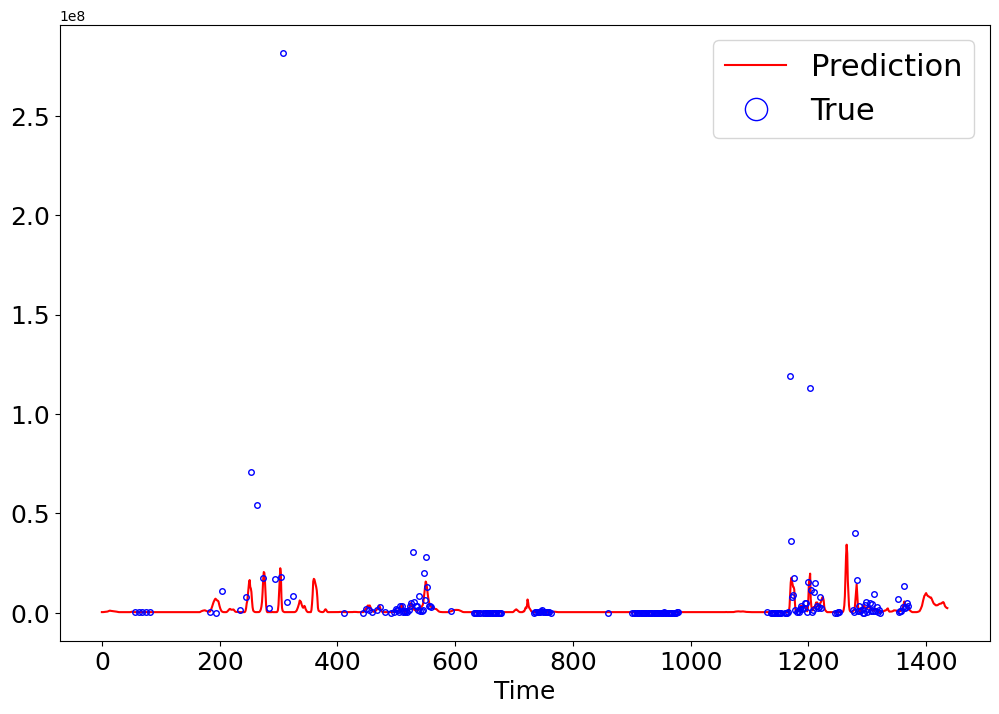

In [12]:
experiment.fit(fit_kws={'indices': 'random'})

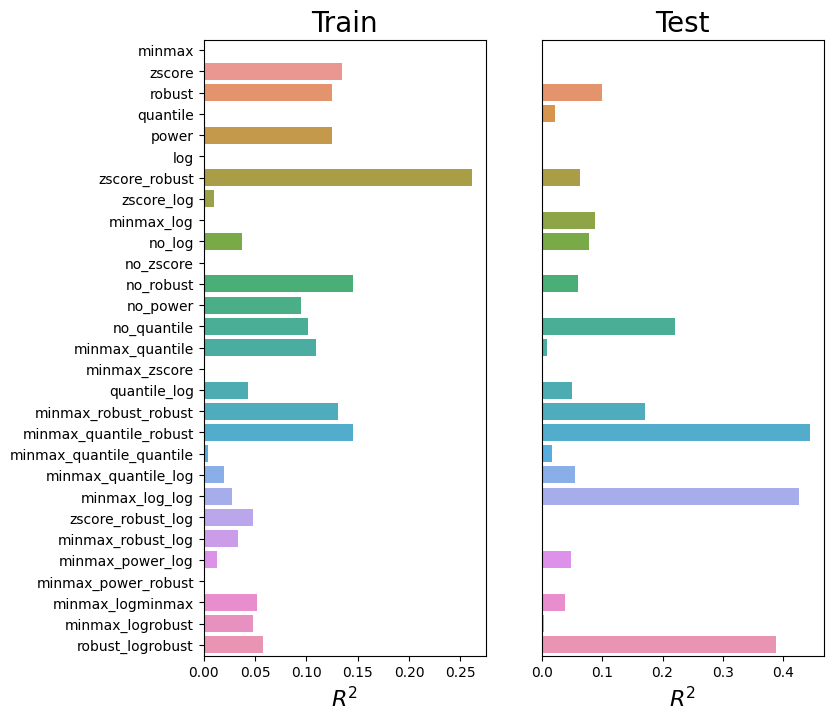

In [13]:
errs = experiment.compare_errors('r2', save=False)

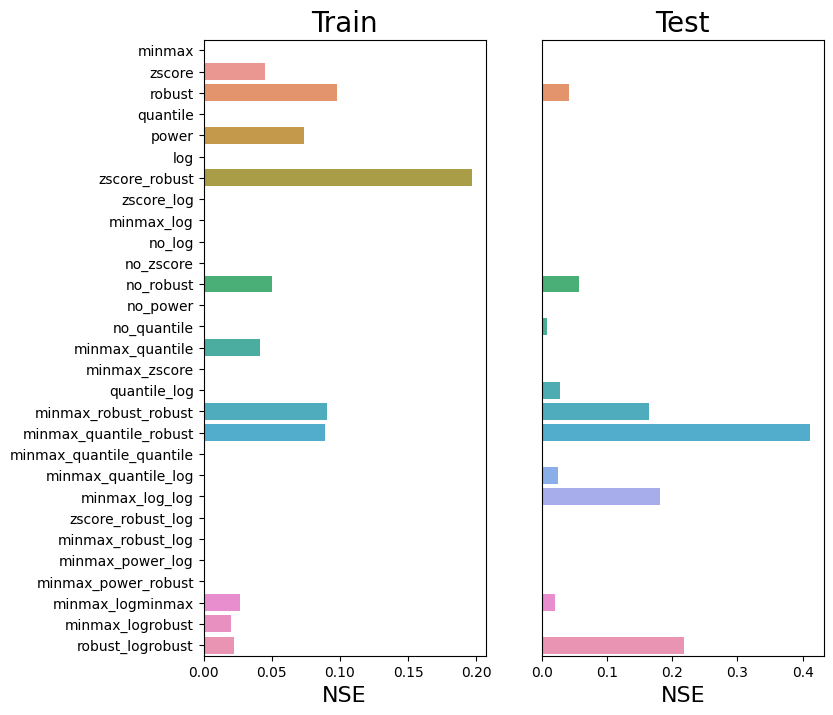

In [14]:
errs = experiment.compare_errors('nse', save=False)

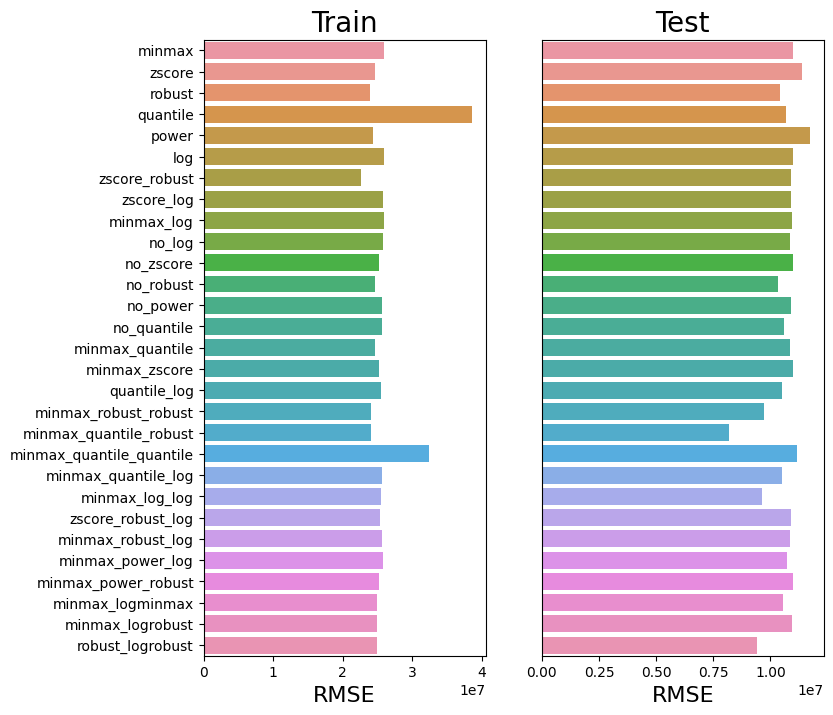

In [15]:
errs = experiment.compare_errors('rmse', save=False)

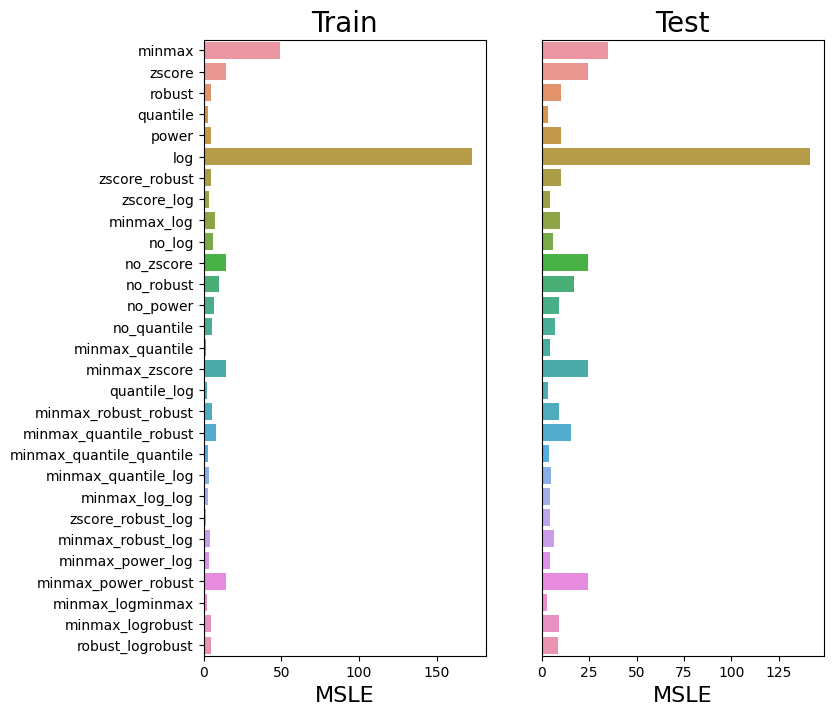

In [16]:
errs = experiment.compare_errors('msle', save=False)

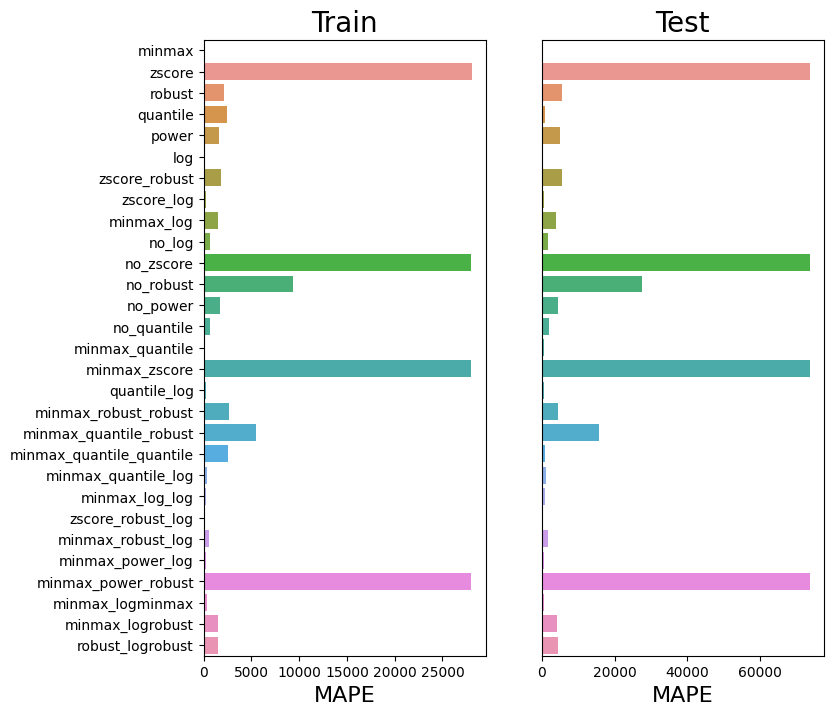

In [17]:
errs = experiment.compare_errors('mape', save=False)